In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('movies-data-exploration')
jovian.set_colab_id('1HRJFsF-Lo_Pm607h_HwqpSPOa-6bcF-P')

<a id='top'></a>
## Table of Contents
1. [Data Understanding](#du)
    1. [Dataset Description](#dataset) 
    2. [Data Cleaning](#cleaning) 
    3. [Exploratory Analysis](#ea)
    4. [Motivation and Proposal](#mp)
2. [Movie Profitability Regression](#reg)
    1. [Additional Features Engineering](#afer)
    2. [DummyRegressor](#dr)
    3. [DecisionTreeRegressor](#dtr)
    4. [MLPRegressor](#mlpr)
    5. [CNN-SVR/XGBoost](#cnn-svr)
    6. [RandomForestRegressor](#rfr)
    7. [GradientBoostingRegressor](#gbr)
    8. [AutoSklearnRegressor](#asr)
3. [Movie Profitability Classification](#clf)
    1. [Additional Features Engineering](#afec)
    2. [Handling Unbalanced Data](#hud)
    3. [DummyClassifier](#dc)
    4. [DecisionTreeClassifier](#dtc)
    5. [MLPClassifier](#mlpc)
    6. [CNN-SVC/XGBoost](#cnn-svc)
    7. [RandomForestClassifier](#rfc)
    8. [GradientBoostingClassifier](#gbc)
    9. [AutoSklearnClassifier](#asc)

<a id='du'></a>
# 1. Data Understanding ([to top](#top))

<a id='dataset'></a>
## A. Dataset description ([to top](#top))

**Dataset description from Kaggle :**

These files contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages.

This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.

**Content :**

This dataset consists of the following files:

**movies_metadata.csv**: The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.

**keywords.csv**: Contains the movie plot keywords for our MovieLens movies. Available in the form of a stringified JSON Object.

**credits.csv**: Consists of Cast and Crew Information for all our movies. Available in the form of a stringified JSON Object.

**links.csv**: The file that contains the TMDB and IMDB IDs of all the movies featured in the Full MovieLens dataset.

**links_small.csv**: Contains the TMDB and IMDB IDs of a small subset of 9,000 movies of the Full Dataset.

**ratings_small.csv**: The subset of 100,000 ratings from 700 users on 9,000 movies.

The Full MovieLens Dataset consisting of 26 million ratings and 750,000 tag applications from 270,000 users on all the 45,000 movies in this dataset can be accessed here: *https://grouplens.org/datasets/movielens/latest/*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline
import re
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
import warnings
import math
import matplotlib.ticker as plticker
warnings.filterwarnings("ignore")

### movies_metadata dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BDA/input/movies_metadata.csv')
df.head().transpose()

0  ...                                                  4
adult                                                              False  ...                                              False
belongs_to_collection  {'id': 10194, 'name': 'Toy Story Collection', ...  ...  {'id': 96871, 'name': 'Father of the Bride Col...
budget                                                          30000000  ...                                                  0
genres                 [{'id': 16, 'name': 'Animation'}, {'id': 35, '...  ...                     [{'id': 35, 'name': 'Comedy'}]
homepage                            http://toystory.disney.com/toy-story  ...                                                NaN
id                                                                   862  ...                                              11862
imdb_id                                                        tt0114709  ...                                          tt0113041
original_language                                                     en  ...                                                 en
original_title                                                 Toy Story  ...                        Father of the Bride Part II
overview               Led by Woody, Andy's toys live happily in his ...  ...  Just when George Banks has recovered from his ...
popularity                                                       21.9469  ...                                            8.38752
poster_path                             /rhIRbceoE9lR4veEXuwCC2wARtG.jpg  ...                   /e64sOI48hQXyru7naBFyssKFxVd.jpg
production_companies      [{'name': 'Pixar Animation Studios', 'id': 3}]  ...  [{'name': 'Sandollar Productions', 'id': 5842}...
production_countries   [{'iso_3166_1': 'US', 'name': 'United States o...  ...  [{'iso_3166_1': 'US', 'name': 'United States o...
release_date                                                  1995-10-30  ...                                         1995-02-10
revenue                                                      3.73554e+08  ...                                        7.65789e+07
runtime                                                               81  ...                                                106
spoken_languages                [{'iso_639_1': 'en', 'name': 'English'}]  ...           [{'iso_639_1': 'en', 'name': 'English'}]
status                                                          Released  ...                                           Released
tagline                                                              NaN  ...  Just When His World Is Back To Normal... He's ...
title                                                          Toy Story  ...                        Father of the Bride Part II
video                                                              False  ...                                              False
vote_average                                                         7.7  ...                                                5.7
vote_count                                                          5415  ...                                                173

[24 rows x 5 columns]

In [ ]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

**Features:**

* **adult**: Indicates if the movie is X-Rated or Adult.
* **belongs_to_collection**: A stringified dictionary that gives information on the movie series the particular film belongs to.
* **budget**: The budget of the movie in dollars.
* **genres**: A stringified list of dictionaries that list out all the genres associated with the movie.
* **homepage**: The Official Homepage of the movie.
* **id**: The ID of the movie.
* **imdb_id**: The IMDB ID of the movie.
* **original_language**: The language in which the movie was originally shot in.
* **original_title**: The original title of the movie.
* **overview**: A brief description of the movie.
* **popularity**: The Popularity Score assigned by TMDB.
* **poster_path**: The URL of the poster image.
* **production_companies**: A stringified list of production companies involved with the making of the movie.
* **production_countries**: A stringified list of countries where the movie was shot/produced in.
* **release_date**: Theatrical Release Date of the movie.
* **revenue**: The total revenue of the movie in dollars.
* **runtime**: The runtime of the movie in minutes.
* **spoken_languages**: A stringified list of spoken languages in the film.
* **status**: The status of the movie (Released, To Be Released, Announced, etc.)
* **tagline**: The tagline of the movie.
* **title**: The Official Title of the movie.
* **video**: Indicates if there is a video present of the movie with TMDB.
* **vote_average**: The average rating of the movie.
* **vote_count**: The number of votes by users, as counted by TMDB.

In [ ]:
df.shape

(45466, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

There are a total of **45,466 movies** with **24 features**. Most of the features have very few NaN values (apart from ***homepage*** and ***tagline***).



---



The other two related dateset: **credits** dataset and **keywords** dataset.

### credits dataset

In [ ]:
credits_df = pd.read_csv('/content/drive/MyDrive/BDA/input/credits.csv')
credits_df.head()

cast  ...     id
0  [{'cast_id': 14, 'character': 'Woody (voice)',...  ...    862
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...  ...   8844
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...  ...  15602
3  [{'cast_id': 1, 'character': "Savannah 'Vannah...  ...  31357
4  [{'cast_id': 1, 'character': 'George Banks', '...  ...  11862

[5 rows x 3 columns]

**Features:**
* **cast:** A stringified list of dictionaries consisting of cast names and the corresponding characters they played.
* **crew:** A stringified list of dictionaries consisting of crew names and the function they performed.
* **id:** The TMDB ID of movie.

In [ ]:
credits_df.shape

(45476, 3)

In [ ]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


### keywords dataset

In [ ]:
keywords_df = pd.read_csv('/content/drive/MyDrive/BDA/input/keywords.csv')
keywords_df.head()

id                                           keywords
0    862  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1   8844  [{'id': 10090, 'name': 'board game'}, {'id': 1...
2  15602  [{'id': 1495, 'name': 'fishing'}, {'id': 12392...
3  31357  [{'id': 818, 'name': 'based on novel'}, {'id':...
4  11862  [{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...

In [ ]:
keywords_df.shape

(46419, 2)

In [ ]:
keywords_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB




---



To handle the massive number of missing values and complement our TMDB voting system, we seek another movie dataset.

### IMDb movies dataset
IMDb movies extensive dataset

https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset

* The movies dataset includes 85,855 movies with attributes such as movie description, average rating, number of votes, genre, etc.

* The ratings dataset includes 85,855 rating details from demographic perspective.

* The names dataset includes 297,705 cast members with personal attributes such as birth details, death details, height, spouses, children, etc.

* The title principals dataset includes 835,513 cast members roles in movies with attributes such as IMDb title id, IMDb name id, order of importance in the movie, role, and characters played.

The IMDB extensive dataset serves as an excellent auxiliary dataset to fill in the missing values in the TMDB dataset since it includes a more significant number of movies. In addition, it also incorporates some attributes regarding the audience's rating.

In [ ]:
imdb_movies_df = pd.read_csv('/content/drive/MyDrive/BDA/input/IMDb movies.csv')
imdb_movies_df.head().transpose()

0  ...                                                  4
imdb_title_id                                                  tt0000009  ...                                          tt0002130
title                                                         Miss Jerry  ...                                          L'Inferno
original_title                                                Miss Jerry  ...                                          L'Inferno
year                                                                1894  ...                                               1911
date_published                                                1894-10-09  ...                                         1911-03-06
genre                                                            Romance  ...                          Adventure, Drama, Fantasy
duration                                                              45  ...                                                 68
country                                                              USA  ...                                              Italy
language                                                            None  ...                                            Italian
director                                                 Alexander Black  ...                Francesco Bertolini, Adolfo Padovan
writer                                                   Alexander Black  ...                                    Dante Alighieri
production_company                            Alexander Black Photoplays  ...                                        Milano Film
actors                 Blanche Bayliss, William Courtenay, Chauncey D...  ...  Salvatore Papa, Arturo Pirovano, Giuseppe de L...
description            The adventures of a female reporter in the 1890s.  ...  Loosely adapted from Dante's Divine Comedy and...
avg_vote                                                             5.9  ...                                                  7
votes                                                                154  ...                                               2237
budget                                                               NaN  ...                                                NaN
usa_gross_income                                                     NaN  ...                                                NaN
worlwide_gross_income                                                NaN  ...                                                NaN
metascore                                                            NaN  ...                                                NaN
reviews_from_users                                                     1  ...                                                 31
reviews_from_critics                                                   2  ...                                                 14

[22 rows x 5 columns]

In [ ]:
imdb_movies_df.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

We can see the related feature between IMDB and TMDB:
* '**imdb_title_id**' : title ID on IMDb, corresponding to the feature 'imdb_id' in TMDB.
* '**title**' : title name, corresponding to the feature 'title' in TMDB.
* '**original_title**' : original title name, corresponding to the feature 'original_title' in TMDB.
* '**year**' : year of release, related to the feature 'release_date' in TMDB.
* '**date_published**' : date of release, corresponding to the feature 'release_date' in TMDB.
* '**genre**' : movie genre, corresponding to the feature 'genres' in TMDB.
* '**duration**' : duration (in minutes), corresponding to the feature 'runtime' in TMDB.
* '**country**' : movie country, corresponding to the feature 'production_countries' in TMDB.
* '**language**' : movie language, corresponding to the feature 'spoken_languages' in TMDB.
* '**director**' : director name, related to the feature 'crew' in credits datset.
* '**writer**' : writer name
* '**production_company**' : production company, corresponding to the feature 'production_companies' in TMDB.
* '**actors**' : actor names, related to the feature 'cast' in credits datset.
* '**description**' : plot descrption, related to the feature 'overview' in credits datset.
* '**avg_vote**' : average vote
* '**votes**' : number of votes received
* '**budget**' : budget, corresponding to the feature 'budget' in TMDB.
* '**usa_gross_income**' : USA gross income
* '**worlwide_gross_income**' : worldwide gross income, corresponding to the feature 'revenue' in TMDB.
* '**metascore**' : metascore rating
* '**reviews_from_users**' : number of reviews from users
* '**reviews_from_critics**' : number of reviews from critics

In [ ]:
df.shape, imdb_movies_df.shape

((45466, 24), (85855, 22))

In [ ]:
imdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

Features *usa_gross_income* and *metascore* have only very few non-null values and are not related to the TMDB dataset, so we don't need them; *year* is included in *date_published*, therefore,  it is not helpful here; *reviews_from_users* and *reviews_from_critics* are highly related to *votes*, thus they are redundant as well.

Before joining the two datasets, we first drop the duplicated records.

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(45453, 24)

In [ ]:
df = pd.merge(df, imdb_movies_df[imdb_movies_df.columns.difference(['usa_gross_income', 'metascore', 'year','reviews_from_users','reviews_from_critics'])], left_on="imdb_id", right_on="imdb_title_id", suffixes=('_tmdb', '_imdb'), how="left")

In [ ]:
df.shape

(45453, 41)

After merging the imdb dataset, we can drop *imdb_id* and *imdb_title_id*.

In [ ]:
df = df.drop(["imdb_id", "imdb_title_id"], axis=1)

<a id='cleaning'></a>
## B. Data Cleaning ([to top](#top))
In this stage, we will address the missing values of the TMDB dataset by filling in with corresponding values from the IMDB dataset.

In [ ]:
df.isnull().sum()

adult                        0
belongs_to_collection    40959
budget_tmdb                  0
genres                       0
homepage                 37673
id                           0
original_language           11
original_title_tmdb          0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25045
title_tmdb                   6
video                        6
vote_average                 6
vote_count                   6
actors                   11378
avg_vote                 11367
budget_imdb              31740
country                  11371
date_published           11367
description              11592
director                 11370
duration                 11367
genre                    11367
language

We can see an enormous number of missing values in the features *belongs_to_collection*, *homepage*, *tagline*, and *writer*, so let's first handle these missing values.

##### **belongs_to_collection:**


In [ ]:
df['belongs_to_collection'].isnull().sum()

40959

Considering the significant number of missing values in *belongs_to_collection*,  instead of dropping the nulls, we turned this feature into a Boolean variable, with **1** indicating a movie belongs to a collection.  Before that, we keep all the non-null values in a new data frame for future exploration.

In [ ]:
df_fran = df[df['belongs_to_collection'].notnull()]
df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x: 0 if pd.isna(x) else 1)

##### **tagline:**

In [ ]:
df['tagline'].isnull().sum()

25045

In [ ]:
df["tagline"] = df['tagline'].fillna('')

##### **writer:**

In [ ]:
df['writer'].isnull().sum()

11550

Drop nan:

In [ ]:
df.dropna(subset=['writer'], inplace=True)

In [ ]:
df['writer'] =  df['writer'].astype(str).apply(lambda x: x.replace(", ",",").split(",")).tolist()

In [ ]:
df['writer'].head(5)

0                  [John Lasseter, Pete Docter]
1             [Jonathan Hensleigh, Greg Taylor]
2    [Mark Steven Johnson, Mark Steven Johnson]
3              [Terry McMillan, Terry McMillan]
4            [Albert Hackett, Frances Goodrich]
Name: writer, dtype: object

In [ ]:
df[df['writer'].str.len()==0]['writer']

Series([], Name: writer, dtype: object)

##### **overview:**

In [ ]:
df[['overview','description']].isnull().sum()

overview       613
description    217
dtype: int64

In [ ]:
df[['overview','description']].head()

overview                                        description
0  Led by Woody, Andy's toys live happily in his ...  A cowboy doll is profoundly threatened and jea...
1  When siblings Judy and Peter discover an encha...  When two kids find and play a magical board ga...
2  A family wedding reignites the ancient feud be...  John and Max resolve to save their beloved bai...
3  Cheated on, mistreated and stepped on, the wom...  Based on Terry McMillan's novel, this film fol...
4  Just when George Banks has recovered from his ...  George Banks must deal not only with the pregn...

Let's use the feature *description* from IMDB to fill in the missing values of the feature *overview* from TMDB, and then drop *description*. The remaining missing values in *overview* can be filled in with an empty string ''.

In [ ]:
df["overview"] = df['overview'].fillna(df['description'])
df[df['overview'].isnull()].shape

(56, 39)

In [ ]:
df = df.drop('description', axis=1)
df["overview"] = df['overview'].fillna('')

##### **budget:**

In [ ]:
df["budget_imdb"].value_counts()

$ 5000000       371
$ 10000000      343
$ 2000000       336
$ 3000000       326
$ 1000000       323
               ... 
FRF 23000000      1
$ 1499000         1
$ 2367000         1
$ 900             1
$ 197000          1
Name: budget_imdb, Length: 2787, dtype: int64

The values of *budget* in IMDB are formatted as **a currency symbol + an Integer** (e.g., \$ 100, PLN 100 ),  and most of them are in dollars.

Whereas values of *budget* in TMDB  are integers, meaning dollars.  So we extract the *budget* value starting with \$ and discard the others from this perspective.

In [ ]:
df["budget_imdb"].str.startswith('$',na = "NaN").value_counts()

NaN      20219
True     10940
False     2744
Name: budget_imdb, dtype: int64

In [ ]:
# Function to clean the budget_imdb
# Search for budget_imdb that not start with '$', fill with pd.NA
def Clean_budget_imdb(budget_imdb):
    if re.search('\$ \d+', budget_imdb):
        return budget_imdb
  
    else:
        return pd.NA
          
# Updated the budget_imdb columns
df['budget_imdb'] = df['budget_imdb'].astype(str).apply(Clean_budget_imdb)

In [ ]:
df.replace(df[df["budget_imdb"].str.startswith('^$')==True]["budget_imdb"], pd.NA, inplace=True)

In [ ]:
df["budget_imdb"].str.startswith('$',na = "NaN").value_counts()

NaN     22963
True    10940
Name: budget_imdb, dtype: int64

Then, we remove the '$'.

In [ ]:
df["budget_imdb"] = df["budget_imdb"].str.extract('(\d+)', expand=False)

Before handling the missing values in the *budget*, we transform the budget values into numeric values and convert 0 into NULLs, suggesting they are actually missing values.

In [ ]:
df['budget_tmdb'] = pd.to_numeric(df['budget_tmdb'], errors='coerce')
df['budget_imdb'] = pd.to_numeric(df['budget_imdb'], errors='coerce')
df['budget_tmdb'] = df['budget_tmdb'].replace(0, np.nan)
df['budget_imdb'] = df['budget_imdb'].replace(0, np.nan)
df[df['budget_tmdb'].isnull()].shape

(25820, 38)

We got a huge number of missing values in budget_tmdb. 
 Let's use the budget values from IMDB to fill them in.

In [ ]:
df["budget_tmdb"] = df['budget_tmdb'].fillna(df['budget_imdb'])
df[df['budget_tmdb'].isnull()].shape

(21543, 38)

After filling in the NULL value in *budget_tmdb*, we can drop *budget_imdb*,  as well as the rest missing values.

In [ ]:
df = df.drop('budget_imdb', axis=1)
df.dropna(subset=['budget_tmdb'], inplace=True)

##### **revenue:**

In [ ]:
df['revenue'].isnull().sum()

0

We noticed that *revenue* in TMDB does not have NULL values, but it could be **0** values.

In [ ]:
df[df['revenue'] == 0].shape

(6710, 37)

We see that the majority of movies have a recorded revenue of **0**. This indicates that we do not have information about the total revenue for these movies. Let's convert the **0** values in revenue into NULLs and use the *worlwide_gross_income* values from IMDB to fill them in.

In [ ]:
df['revenue'] = df['revenue'].replace(0, np.nan)

In [ ]:
df[['revenue', 'worlwide_gross_income']].head()

revenue worlwide_gross_income
0  373554033.0           $ 404265438
1  262797249.0           $ 262821940
2          NaN            $ 71518503
3   81452156.0            $ 81452156
4   76578911.0            $ 76594107

We can cope with the feature *revenue*  and fill in the related missing values by following the same logic of the feature *budget*. 

In [ ]:
df["worlwide_gross_income"].str.startswith('$',na = "NaN").value_counts()

True     8590
NaN      3765
False       5
Name: worlwide_gross_income, dtype: int64

In [ ]:
# Function to clean the worlwide_gross_income
# Search for worlwide_gross_income that not start with '$', fill with pd.NA
def Clean_worlwide_gross_income(worlwide_gross_income):
    if re.search('\$ \d+', worlwide_gross_income):
        return worlwide_gross_income
  
    else:
        return pd.NA
          
# Updated the budget_imdb columns
df['worlwide_gross_income'] = df['worlwide_gross_income'].astype(str).apply(Clean_worlwide_gross_income)

In [ ]:
df.replace(df[df["worlwide_gross_income"].str.startswith('^$')==True]["worlwide_gross_income"], pd.NA, inplace=True)

In [ ]:
df["worlwide_gross_income"].str.startswith('$',na = "NaN").value_counts()

True    8590
NaN     3770
Name: worlwide_gross_income, dtype: int64

In [ ]:
df["worlwide_gross_income"] = df["worlwide_gross_income"].str.extract('(\d+)', expand=False)

In [ ]:
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['worlwide_gross_income'] = pd.to_numeric(df['worlwide_gross_income'], errors='coerce')
df['revenue'] = df['revenue'].replace(0, np.nan)
df['worlwide_gross_income'] = df['worlwide_gross_income'].replace(0, np.nan)

In [ ]:
df["revenue"] = df['revenue'].fillna(df['worlwide_gross_income'])
df[df['revenue'].isnull()].shape

(3436, 37)

In [ ]:
df = df.drop('worlwide_gross_income', axis=1)
df.dropna(subset=['revenue'], inplace=True)

##### **vote_average and avg_vote:**

In [ ]:
df[['vote_average','avg_vote']].isnull().sum()

vote_average    0
avg_vote        0
dtype: int64

In [ ]:
df[df['vote_average'] == 0].shape

(44, 36)

In [ ]:
df[df['avg_vote'] == 0].shape

(0, 36)

Let's turn the **0** value into NULL, and then drop the NULL.

In [ ]:
df['vote_average'] = df['vote_average'].replace(0, np.nan)
df.dropna(subset=['vote_average','avg_vote'], inplace=True)

##### **vote_count and votes:**

In [ ]:
df[['vote_count','votes']].isnull().sum()

vote_count    0
votes         0
dtype: int64

In [ ]:
df[df['vote_count'] == 0].shape

(0, 36)

In [ ]:
df[df['votes'] == 0].shape

(0, 36)

There are no missing values and **0** values in *vote_count*.

##### **runtime:**

In [ ]:
df[['runtime','duration']].isnull().sum()

runtime     3
duration    0
dtype: int64

In [ ]:
df[df['runtime'] == 0].shape, df[df['duration'] == 0].shape

((53, 36), (0, 36))

Before exploiting the duration values to fill in the missing values in runtime, we need to transform the  **0** value of runtime into NULLs.

In [ ]:
df['runtime'] = df['runtime'].replace(0, np.nan)

In [ ]:
df[['runtime','duration']].isnull().sum()

runtime     56
duration     0
dtype: int64

In [ ]:
df["runtime"] = df['runtime'].fillna(df['duration'])

In [ ]:
df[['runtime','duration']].isnull().sum()

runtime     0
duration    0
dtype: int64

After all the missing values in *runtime* have been filled in, we can drop the *duration* feature.

In [ ]:
df = df.drop('duration', axis=1)

##### **popularity:**

In [ ]:
df['popularity'].isnull().sum()

0

In [ ]:
df[df['popularity'] == 0].shape

(0, 35)

There are no missing values in *popularity*.

We convert the values into float numbers.

In [ ]:
df['popularity'] = df['popularity'].astype('float')

##### **id:**

We convert the *id* feature into an integer value and use it as a key for joining the **credit dataset** and the **keyword dataset**.

In [ ]:
df['id'].isnull().sum()

0

There are no missing values in *id*.

In [ ]:
df['id'] = df['id'].astype('int')

##### **release_date:**


In [ ]:
df[['release_date','date_published']].isnull().sum()

release_date      0
date_published    0
dtype: int64

There is no missing values in release_date, we can simply drop *data_published* feature.

In [ ]:
df = df.drop('date_published', axis=1)

##### **title:**

In [ ]:
df[['title_tmdb','title_imdb']].isnull().sum()

title_tmdb    0
title_imdb    0
dtype: int64

There are no missing values in the feature *title_tmdb*, so we also drop it.

In [ ]:
df = df.drop('title_imdb', axis=1)

##### **original_title:**

In [ ]:
df[['original_title_tmdb','original_title_imdb']].isnull().sum()

original_title_tmdb    0
original_title_imdb    0
dtype: int64

No need for the *original_title* from IMDB anymore, so we can safely drop it.

In [ ]:
df = df.drop("original_title_imdb", axis=1)

In [ ]:
df[df['original_title_tmdb'] != df['title_tmdb']][['title_tmdb', 'original_title_tmdb']].head()

title_tmdb         original_title_tmdb
28   The City of Lost Children  La Cité des Enfants Perdus
57                 The Postman                  Il postino
79           The White Balloon                 بادکنک سفید
81              Antonia's Line                     Antonia
110        Rumble in the Bronx                         紅番區

The *original title* refers to the movie's title in the native language in which the movie was shot. As such, I will prefer using the translated, Anglicized name in this analysis and hence, will drop the original titles altogether. We will be able to deduce if the movie is a foreign language film by looking at the **original_language** feature , so no tangible information is lost in doing so.

In [ ]:
df = df.drop('original_title_tmdb', axis=1)

##### **adult:**

In [ ]:
df['adult'].value_counts()

False    8880
Name: adult, dtype: int64

There are **0 adult movies** in this dataset. The *adult* feature therefore is useless to us and can be safely dropped.

In [ ]:
df = df.drop('adult', axis=1)

##### **status:**

In [ ]:
df['status'].value_counts()

Released           8860
Post Production       9
Rumored               6
Name: status, dtype: int64

Almost every movie is released. So we can simply drop this feature.

In [ ]:
df = df.drop('status', axis=1)

##### **video:**

In [ ]:
df['video'].value_counts()

False    8878
True        2
Name: video, dtype: int64

Almost all the movies do not have a video on IMDB,  so we drop this feature too.

In [ ]:
df = df.drop('video', axis=1)

##### **homepage:**


In [ ]:
df['homepage'].isnull().sum()

6362

Useless feature, drop it.

In [ ]:
df = df.drop('homepage', axis=1)

##### **poster_path:**
Useless feature, drop it.

In [ ]:
df = df.drop('poster_path', axis=1)

##### **genres:**


In [ ]:
df['genres'].head(5)

0    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2    [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                       [{'id': 35, 'name': 'Comedy'}]
Name: genres, dtype: object

In [ ]:
df[['genres','genre']].isnull().sum()

genres    0
genre     0
dtype: int64

It seems that *genre* in TMDB does not have NULL values, but what if the *genre* is empty? Let's first extract the content of genres.

In [ ]:
df['genres'] = df['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [ ]:
df[df['genres'].str.len()==0]['genres']

401      []
839      []
2301     []
3782     []
4517     []
6616     []
9762     []
9971     []
14063    []
18042    []
21145    []
21606    []
21830    []
22733    []
26911    []
29200    []
29431    []
29934    []
30190    []
31022    []
31112    []
33377    []
33848    []
34009    []
35088    []
35542    []
36484    []
37298    []
40051    []
40392    []
40735    []
42267    []
43472    []
43520    []
44054    []
44139    []
44400    []
Name: genres, dtype: object

We can see cases in which the genre is empty. Now, let us turn them into NULL values and try to use the associated values from IMDB to fill them in.

In [ ]:
df['genres'] = df['genres'].apply(lambda x: np.nan if len(x)==0 else x)

In [ ]:
df[['genres','genre']].head()

genres                         genre
0   [Animation, Comedy, Family]  Animation, Adventure, Comedy
1  [Adventure, Fantasy, Family]     Adventure, Comedy, Family
2             [Romance, Comedy]               Comedy, Romance
3      [Comedy, Drama, Romance]        Comedy, Drama, Romance
4                      [Comedy]       Comedy, Family, Romance

We noticed that the genre values from TMDB and IMDB have a different format, so let's fix this issue by converting the IMDB *genre* feature into a list.

In [ ]:
df['genre'] =  df['genre'].astype(str).apply(lambda x: x.replace(", ",",").split(",")).tolist()

In [ ]:
df['genres'] = df['genres'].fillna(df['genre'])

In [ ]:
df[df['genres'].str.len()==0]['genres']

Series([], Name: genres, dtype: object)

After these missing genres in TMDB were filled, now we can drop *genre* from the IMDB dataset.

In [ ]:
df = df.drop('genre', axis=1)

##### **production_companies:**

In [ ]:
df[['production_companies','production_company']].isnull().sum()

production_companies     0
production_company      40
dtype: int64

We can see that *production_companies* in TMDB does not have any NULL values, but what if their values are empty lists.  Let's first extract the names of *production_companies*.

In [ ]:
df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)
df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [ ]:
df[df['production_companies'].str.len()==0]['production_companies']

57       []
240      []
357      []
386      []
401      []
         ..
44842    []
45021    []
45359    []
45396    []
45409    []
Name: production_companies, Length: 652, dtype: object

We can see there are some empty lists indeed.  Let's turn them into NULL values and fill them in with the *production_company* values from IMDB.

In [ ]:
df['production_companies'] = df['production_companies'].apply(lambda x: np.nan if len(x)==0 else x)

In [ ]:
df[['production_companies','production_company']].head()

production_companies       production_company
0                          [Pixar Animation Studios]  Pixar Animation Studios
1  [TriStar Pictures, Teitler Film, Interscope Co...         TriStar Pictures
2                     [Warner Bros., Lancaster Gate]           Lancaster Gate
3           [Twentieth Century Fox Film Corporation]    Twentieth Century Fox
4       [Sandollar Productions, Touchstone Pictures]    Sandollar Productions

We noticed that the production_companies from TMDB and IMDB have a different format, so let's fix this issue by converting IMDB *production_company* feature into a list, analogous to what we did with the *genres*.

In [ ]:
df['production_company'] =  df['production_company'].astype(str).apply(lambda x: x.replace(", ",",").split(",")).tolist()

In [ ]:
# Carefully deal with the 'nan'
df['production_company'] = df['production_company'].apply(lambda x: [] if x==['nan'] else x)

In [ ]:
df['production_companies'] = df['production_companies'].fillna(df['production_company'])

In [ ]:
df['production_companies'] = df['production_companies'].apply(lambda x: list(map(lambda y: y if y != "Columbia Pictures Corporation" else "Columbia Pictures", x)) if "Columbia Pictures Corporation" in x else x)

In [ ]:
df[df['production_companies'].str.len()==0]['production_companies']

2061     []
7284     []
10207    []
12474    []
12482    []
18621    []
20326    []
29484    []
29934    []
32524    []
33848    []
34269    []
34462    []
35703    []
39417    []
40390    []
40391    []
40392    []
43181    []
44106    []
Name: production_companies, dtype: object

After tackling missing values in *production_companies*, we can drop this feature with no harm.

In [ ]:
df = df.drop('production_company', axis=1)
df = df[df['production_companies'].str.len()!=0]

##### **production_countries:**
Likewise, we can apply the same strategy to deal with the feature  *production_countries*.

In [ ]:
df[['production_countries','country']].isnull().sum()

production_countries    0
country                 0
dtype: int64

In [ ]:
s = df.apply(lambda x: pd.Series(x['country']).astype(str),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'country_list'

In [ ]:
set(i for i in s if len(i)<4)

{'UK', 'USA'}

we need to replace the "USA" and "UK" with "United States of America" and "United Kingdom".

In [ ]:
df['production_countries'] = df['production_countries'].fillna('[]').apply(ast.literal_eval)
df['production_countries'] = df['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [ ]:
df[df['production_countries'].str.len()==0]['production_countries']

152      []
207      []
240      []
244      []
254      []
         ..
43867    []
44400    []
44582    []
45359    []
45396    []
Name: production_countries, Length: 248, dtype: object

In [ ]:
df['production_countries'] = df['production_countries'].apply(lambda x: np.nan if len(x)==0 else x)

In [ ]:
df['country'] =  df['country'].astype(str).apply(lambda x: x.replace("USA","United States of America").replace("UK","United Kingdom").replace(", ",",").split(",")).tolist()

In [ ]:
df['production_countries'] = df['production_countries'].fillna(df['country'])

In [ ]:
df[df['production_countries'].str.len()==0]['production_countries']

Series([], Name: production_countries, dtype: object)

In [ ]:
df = df.drop('country', axis=1)

##### **spoken_languages:**

In [ ]:
df[['spoken_languages', 'language']].isnull().sum()

spoken_languages     0
language            12
dtype: int64

In the following, we extract the content of *spoken_language* in a similar vein as we did for *production_companies*

In [ ]:
df['spoken_languages'] = df['spoken_languages'].fillna('[]').apply(ast.literal_eval)
df['spoken_languages'] = df['spoken_languages'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [ ]:
df[df['spoken_languages'].str.len()==0]['spoken_languages']

401      []
606      []
1442     []
1486     []
2191     []
         ..
42970    []
43072    []
43472    []
43834    []
43867    []
Name: spoken_languages, Length: 104, dtype: object

In [ ]:
df['spoken_languages'] = df['spoken_languages'].apply(lambda x: np.nan if len(x)==0 else x)

In [ ]:
df[['spoken_languages', 'language']].head()

spoken_languages                  language
0            [English]                   English
1  [English, Français]           English, French
2            [English]  English, Italian, German
3            [English]                   English
4            [English]                   English

In [ ]:
df['language'] =  df['language'].astype(str).apply(lambda x: x.replace(", ",",").split(",")).tolist()

In [ ]:
# Carefully deal with the 'nan'
df['language'] = df['language'].apply(lambda x: [] if x==['nan'] else x)

In [ ]:
df['spoken_languages'] = df['spoken_languages'].fillna(df['language'])

In [ ]:
df[df['spoken_languages'].str.len()==0]['spoken_languages']

8307     []
14978    []
16775    []
31363    []
Name: spoken_languages, dtype: object

In [ ]:
df = df.drop('language', axis=1)
df = df[df['spoken_languages'].str.len()!=0]

##### **actors and director:**
We need to perform a left join of our original movies metadata data frame with the credits data frame on the TMDB Movie ID.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8856 entries, 0 to 45422
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  8856 non-null   int64  
 1   budget_tmdb            8856 non-null   float64
 2   genres                 8856 non-null   object 
 3   id                     8856 non-null   int64  
 4   original_language      8856 non-null   object 
 5   overview               8856 non-null   object 
 6   popularity             8856 non-null   float64
 7   production_companies   8856 non-null   object 
 8   production_countries   8856 non-null   object 
 9   release_date           8856 non-null   object 
 10  revenue                8856 non-null   float64
 11  runtime                8856 non-null   float64
 12  spoken_languages       8856 non-null   object 
 13  tagline                8856 non-null   object 
 14  title_tmdb             8856 non-null   object 
 15  vot

In [ ]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


Before joining them, we first drop the duplications in the credits dataset.

In [ ]:
credits_df.drop_duplicates(inplace=True)

In [ ]:
df = df.merge(credits_df, on='id')

In [ ]:
df['cast'] = df['cast'].apply(ast.literal_eval)
df['crew'] = df['crew'].apply(ast.literal_eval)

Let's extract the list of actors name from cast:

In [ ]:
df['actors_tmdb'] = df['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

Check the empty list:

In [ ]:
df[df['actors_tmdb'].str.len()==0][['actors_tmdb','actors']]

actors_tmdb                                             actors
146           []  Dal McKennon, Art Clokey, Gloria Clokey, Manny...
929           []  Alan Fawcett, Jane Wheeler, Kyla Pratt, Diana ...
2723          []  Aasif Mandvi, Albert Laveau, Jimi Mistry, Sanj...
3069          []  Alejandro Ferretis, Magdalena Flores, Yolanda ...
3251          []  Jacqueline Aguirre, Susan Brecht, Molly Bryant...
3602          []  David Beard, Jim Seward, Stefan Avalos, Lance ...
3706          []  Terry O'Quinn, Lacey Chabert, Nick Cornish, Ki...
3725          []  Gregory Abbey, Sebastian Arcelus, Ben Baron, A...
4054          []  Tim Gouran, Angie Louise, Jeffrey Gilbert, Tod...
4092          []  Dan McComas, Francine Lobis, George Casden, Ma...
4251          []  Antti Tarvainen, Joonas Saartamo, Johanna Rönn...
5082          []  Pedro Castaneda, Veronica Loren, Abel Becerra,...
5357          []  Vesa-Matti Loiri, Mikko Leppilampi, Helena Vie...
5489          []  Peter Franzén, Sanna-Kaisa Palo, Samuel Vauram...
5949          []                                                NaN
6723          []  Tetsuya Bessho, Motoko Gollent, Yoshihiro Tats...
7429          []  Samuli Niittymäki, Elina Knihtilä, Eero Aho, A...
7549          []  Inna Churikova, Viktor Mikhaylov, Aleksandr Su...
7822          []  Ikue Ôtani, Caitlin Glass, Sarah Natochenny, H...
8115          []  Edda Arnljótsdóttir, Reine Brynolfsson, Ágústa...
8776          []  Lyubava Aristarkhova, Nazar As-Samarray, Maksi...
8791          []  Aleksandr Boyarskiy, Dmitriy Bykovskiy-Romasho...

Let's convert the empty lists into NULLs, and use the actors from IMDB to fill in the missing values.

In [ ]:
df['actors_tmdb'] = df['actors_tmdb'].apply(lambda x: np.nan if len(x)==0 else x)

In [ ]:
df[['actors_tmdb','actors']].isnull().sum()

actors_tmdb    22
actors          1
dtype: int64

In [ ]:
df[['actors_tmdb','actors']].head()

actors_tmdb                                             actors
0  [Tom Hanks, Tim Allen, Don Rickles, Jim Varney...  Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...
1  [Robin Williams, Jonathan Hyde, Kirsten Dunst,...  Robin Williams, Jonathan Hyde, Kirsten Dunst, ...
2  [Walter Matthau, Jack Lemmon, Ann-Margret, Sop...  Walter Matthau, Jack Lemmon, Sophia Loren, Ann...
3  [Whitney Houston, Angela Bassett, Loretta Devi...  Whitney Houston, Angela Bassett, Loretta Devin...
4  [Steve Martin, Diane Keaton, Martin Short, Kim...  Steve Martin, Diane Keaton, Martin Short, Kimb...

We noticed that the *actors* from TMDB and IMDB have a different format, so let's fix this issue by converting the IMDB *actors* feature into a list.

In [ ]:
df['actors'] =  df['actors'].astype(str).apply(lambda x: x.replace(", ",",").split(",")).tolist()

In [ ]:
# Carefully deal with 'nan'
df['actors'] = df['actors'].apply(lambda x: [] if x==['nan'] else x)

In [ ]:
df['actors_tmdb'] = df['actors_tmdb'].fillna(df['actors'])

In [ ]:
df[df['actors_tmdb'].str.len()==0]['actors_tmdb']

5949    []
Name: actors_tmdb, dtype: object

In [ ]:
df['actors_tmdb'].count()

8861

After filling in these missing values, we can drop the IMDB actors feature.

In [ ]:
df = df.drop('actors', axis=1)

Let's extract the director name from *crew*:

In [ ]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [ ]:
df['director_tmdb'] = df['crew'].apply(get_director)

In [ ]:
df[['director_tmdb','director']].isnull().sum()

director_tmdb    19
director          0
dtype: int64

We noticed some missing values in director_tmdb; let's try to use the directory information from IMDB to fill them in.

In [ ]:
df[['director_tmdb','director']].head()

director_tmdb         director
0    John Lasseter    John Lasseter
1     Joe Johnston     Joe Johnston
2    Howard Deutch    Howard Deutch
3  Forest Whitaker  Forest Whitaker
4    Charles Shyer    Charles Shyer

In [ ]:
df['director_tmdb'] = df['director_tmdb'].fillna(df['director'])

In [ ]:
df[['director_tmdb','director']].isnull().sum()

director_tmdb    0
director         0
dtype: int64

Now there are no missing values in *director_tmdb* anymore, so we can drop the IMDB *director* feature, as well as *cast* and *crew* features

In [ ]:
df = df.drop(['director','cast','crew'], axis=1)

##### **keywords:**

In [ ]:
keywords_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


Before joining the keywords dataset, let's first drop the duplications.

In [ ]:
keywords_df.drop_duplicates(inplace=True)

In [ ]:
keywords_df.shape, df.shape

((45432, 2), (8861, 22))

In [ ]:
df = df.merge(keywords_df, on='id')

Let's extract the name of the keywords.

In [ ]:
df['keywords'] = df['keywords'].apply(ast.literal_eval)

In [ ]:
df['keywords'] = df['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [ ]:
df['keywords'].head()

0    [jealousy, toy, boy, friendship, friends, riva...
1    [board game, disappearance, based on children'...
2    [fishing, best friend, duringcreditsstinger, o...
3    [based on novel, interracial relationship, sin...
4    [baby, midlife crisis, confidence, aging, daug...
Name: keywords, dtype: object

Check the empty list:

In [ ]:
df[df['keywords'].str.len()==0]['keywords']

75      []
93      []
122     []
146     []
147     []
        ..
8856    []
8857    []
8858    []
8859    []
8860    []
Name: keywords, Length: 1114, dtype: object

##### **Top 3:**
Return top 3 elements of a list.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8861 entries, 0 to 8860
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  8861 non-null   int64  
 1   budget_tmdb            8861 non-null   float64
 2   genres                 8861 non-null   object 
 3   id                     8861 non-null   int64  
 4   original_language      8861 non-null   object 
 5   overview               8861 non-null   object 
 6   popularity             8861 non-null   float64
 7   production_companies   8861 non-null   object 
 8   production_countries   8861 non-null   object 
 9   release_date           8861 non-null   object 
 10  revenue                8861 non-null   float64
 11  runtime                8861 non-null   float64
 12  spoken_languages       8861 non-null   object 
 13  tagline                8861 non-null   object 
 14  title_tmdb             8861 non-null   object 
 15  vote

In [ ]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_top3(x):
    #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
    if isinstance(x, list):
      if len(x) > 3:
          x = x[:3]
      return x

      #Return empty list in case of missing/malformed data
      return []

In [ ]:
features = ['genres', 'production_companies', 'production_countries', 'keywords', 'actors_tmdb', 'writer']
for feature in features:
    df[feature] = df[feature].apply(get_top3)

In [ ]:
df.head().T

0  ...                                                  4
belongs_to_collection                                                  1  ...                                                  1
budget_tmdb                                                        3e+07  ...                                              3e+07
genres                                       [Animation, Comedy, Family]  ...                                           [Comedy]
id                                                                   862  ...                                              11862
original_language                                                     en  ...                                                 en
overview               Led by Woody, Andy's toys live happily in his ...  ...  Just when George Banks has recovered from his ...
popularity                                                       21.9469  ...                                            8.38752
production_companies                           [Pixar Animation Studios]  ...       [Sandollar Productions, Touchstone Pictures]
production_countries                          [United States of America]  ...                         [United States of America]
release_date                                                  1995-10-30  ...                                         1995-02-10
revenue                                                      3.73554e+08  ...                                        7.65789e+07
runtime                                                               81  ...                                                106
spoken_languages                                               [English]  ...                                          [English]
tagline                                                                   ...  Just When His World Is Back To Normal... He's ...
title_tmdb                                                     Toy Story  ...                        Father of the Bride Part II
vote_average                                                         7.7  ...                                                5.7
vote_count                                                          5415  ...                                                173
avg_vote                                                             8.3  ...                                                6.1
votes                                                             864461  ...                                              33587
writer                                      [John Lasseter, Pete Docter]  ...                 [Albert Hackett, Frances Goodrich]
actors_tmdb                          [Tom Hanks, Tim Allen, Don Rickles]  ...         [Steve Martin, Diane Keaton, Martin Short]
director_tmdb                                              John Lasseter  ...                                      Charles Shyer
keywords                                            [jealousy, toy, boy]  ...                 [baby, midlife crisis, confidence]

[23 rows x 5 columns]

Drop duplications:

In [ ]:
df.shape

(8861, 23)

In [ ]:
df = df[~df.astype(str).duplicated()]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8856 entries, 0 to 8860
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  8856 non-null   int64  
 1   budget_tmdb            8856 non-null   float64
 2   genres                 8856 non-null   object 
 3   id                     8856 non-null   int64  
 4   original_language      8856 non-null   object 
 5   overview               8856 non-null   object 
 6   popularity             8856 non-null   float64
 7   production_companies   8856 non-null   object 
 8   production_countries   8856 non-null   object 
 9   release_date           8856 non-null   object 
 10  revenue                8856 non-null   float64
 11  runtime                8856 non-null   float64
 12  spoken_languages       8856 non-null   object 
 13  tagline                8856 non-null   object 
 14  title_tmdb             8856 non-null   object 
 15  vote

Save the cleaned dataset for further usage.

In [ ]:
df.to_csv('/content/drive/MyDrive/BDA/input/clean_df.csv', index=False)

<a id='ea'></a>
## C. Exploratory Analysis ([to top](#top))
Now that our data is cleaned, we will explore our data with descriptive and graphical statistics to describe and summarize our variables. To better illustrate information hidden in the original data, we also engineer some new features here.

In [ ]:
clean_df = pd.read_csv('/content/drive/MyDrive/BDA/input/clean_df.csv', keep_default_na=False)

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8856 entries, 0 to 8855
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  8856 non-null   int64  
 1   budget_tmdb            8856 non-null   float64
 2   genres                 8856 non-null   object 
 3   id                     8856 non-null   int64  
 4   original_language      8856 non-null   object 
 5   overview               8856 non-null   object 
 6   popularity             8856 non-null   float64
 7   production_companies   8856 non-null   object 
 8   production_countries   8856 non-null   object 
 9   release_date           8856 non-null   object 
 10  revenue                8856 non-null   float64
 11  runtime                8856 non-null   float64
 12  spoken_languages       8856 non-null   object 
 13  tagline                8856 non-null   object 
 14  title_tmdb             8856 non-null   object 
 15  vote

* Continuous variable(float) : *budget_tmdb*, *popularity*, *revenue*, *runtime*, *vote_average*, *vote_count*, *avg_vote*, *votes*.

* Discrete variable(boolean) : *belongs_to_collection*, *homepage*

* Discrete variable(list of strings) : *genres*, *production_companies*, *production_countries*, *spoken_languages*, *actors_tmdb*, *keywords*

* Discrete variable(string) : *original_language*, *overview*, *tagline*, *title_tmdb*, *writer*, *director_tmdb*

* Discrete variable(datetime) : *release_date*


##### **release_date:**

As we are tying to answer certain question, we will have to construct several useful features. For now, we extract the information about *year*, *month*, *day* from *release_date*, indicating the year, month, weekday in which the movie was released.

In [ ]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [ ]:
def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

In [ ]:
def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))    
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

In [ ]:
clean_df['year'] = pd.to_datetime(clean_df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
clean_df['day'] = clean_df['release_date'].apply(get_day)
clean_df['month'] = clean_df['release_date'].apply(get_month)
clean_df = clean_df.drop('release_date', axis=1)

In [ ]:
clean_df[['day','month','year']].head()

day month  year
0  Mon   Oct  1995
1  Fri   Dec  1995
2  Fri   Dec  1995
3  Fri   Dec  1995
4  Fri   Feb  1995

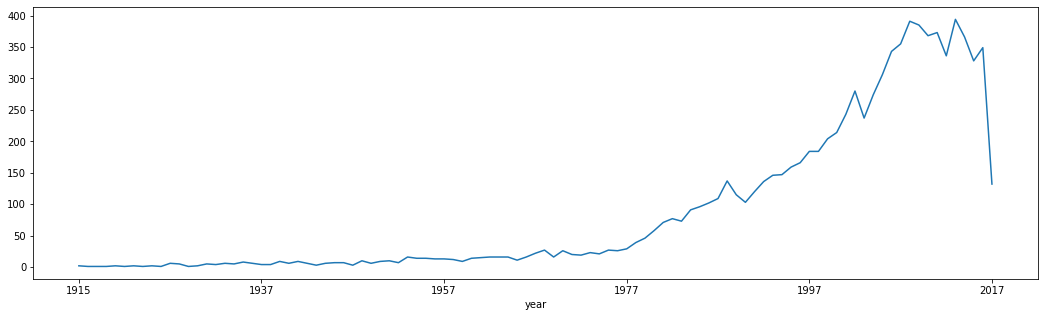

In [ ]:
plt.figure(figsize=(18,5))
clean_df.groupby('year')['title_tmdb'].count().plot()

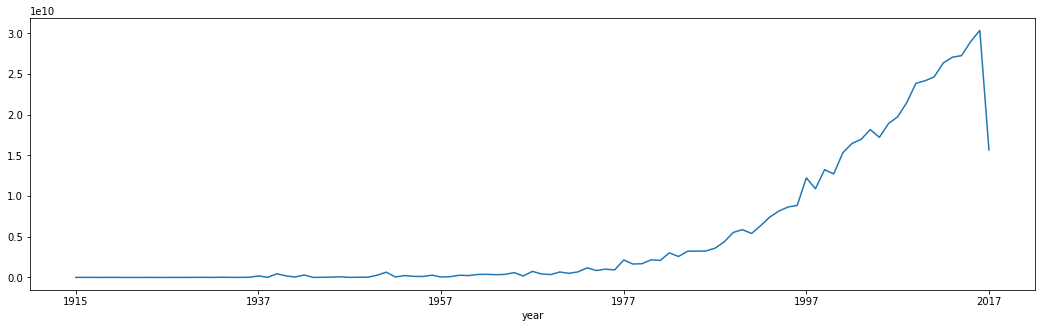

In [ ]:
plt.figure(figsize=(18,5))
clean_df.groupby('year')['revenue'].sum().plot()

We notice that there is a sharp rise in the number of movies as well as revenue **starting the 1990s decade**. 
Meanwhile, we also see a dramatic decrease around the year 2017. However, we will not look too much into this, as it is entirely possible that movies were oversampled for more recent years, but undersampled for years around 2017 in this dataset.

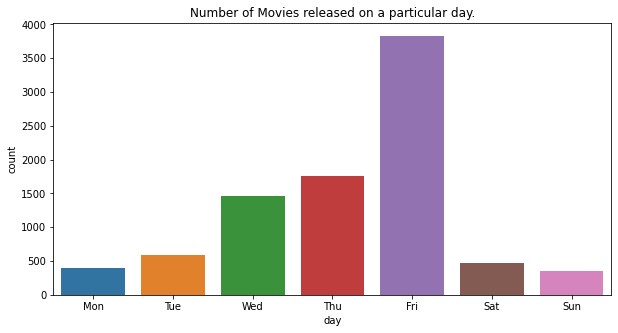

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Number of Movies released on a particular day.")
sns.countplot(x='day', data=clean_df, order=day_order)

Obviously, **Friday** is the most popular day for releasing movies. This is understandable, considering Friday is close to the weekend. Attributed to the same reason, **Sunday** and **Monday** are the least popular days.

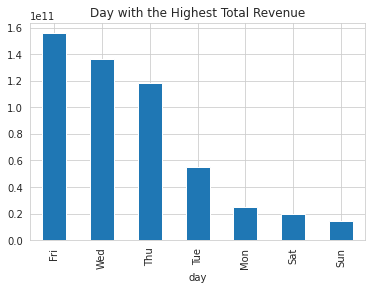

In [ ]:
sns.set_style('whitegrid')
plt.title('Day with the Highest Total Revenue')
clean_df.groupby('day')['revenue'].sum().sort_values(ascending=False).plot(kind='bar')
plt.show()

As we can expect, people are more inclined to go to cinemas more often on **Friday**, making it embracing the highest revenue.

Therefore, we can see that if a movie is released on Friday could be an essential feature for our future work, so we convert the feature *day* into a binary feature *Is_Friday* to indicate if this film was released on a Friday.

In [ ]:
clean_df['is_Friday'] = clean_df['day'].apply(lambda x: 1 if x=='Fri' else 0)

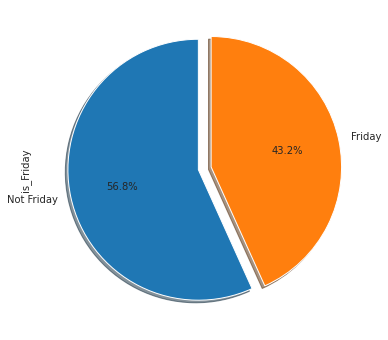

In [ ]:
clean_df['is_Friday'].value_counts().plot(kind='pie',labels=['Not Friday','Friday'],startangle=90,shadow=True,
            figsize=(6,6),autopct="%1.1f%%", explode=(0,0.1))

In [ ]:
clean_df = clean_df.drop('day', axis=1)

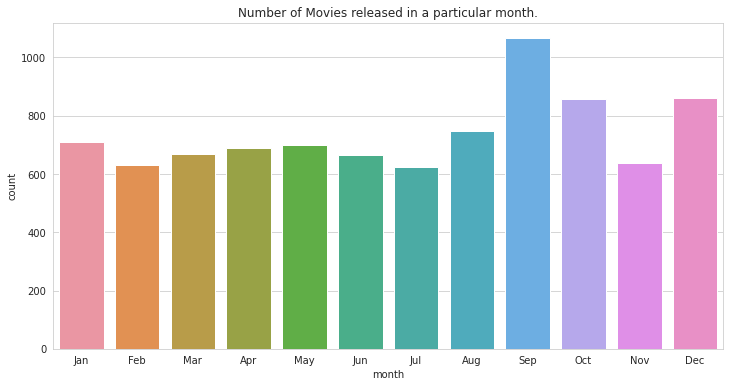

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Number of Movies released in a particular month.")
sns.countplot(x='month', data=clean_df, order=month_order)

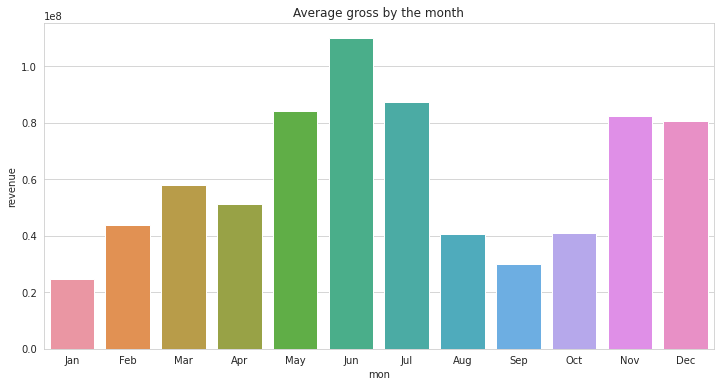

In [ ]:
month_mean = pd.DataFrame(clean_df.groupby('month')['revenue'].mean())
month_mean['mon'] = month_mean.index
plt.figure(figsize=(12,6))
plt.title("Average gross by the month")
sns.barplot(x='mon', y='revenue', data=month_mean, order=month_order)

It appears that September is the most popular month for releasing movies.  However, it is one of the least successful months throughout the whole year. It can be explained by the fact that September is the end of the summer holiday, and the starting of the new school semester.  As anticipated, June and July are the most successful months, and the audience is more likely to spend their disposable money on Entertainment. Also, blockbuster movies are usually released in this period.

##### **belongs_to_collection:**

Let us now have a brief look at Franchise movies:

In [ ]:
df_fran['belongs_to_collection'] = df_fran['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)
df_fran = df_fran[df_fran['belongs_to_collection'].notnull() & df_fran['revenue']!=0]

In [ ]:
fran_pivot = df_fran.pivot_table(index='belongs_to_collection', values='revenue', aggfunc={'revenue': ['mean', 'sum', 'count']}).reset_index()

Highest Grossing Movie Franchises:

In [ ]:
fran_pivot.sort_values('sum', ascending=False).head(10)

belongs_to_collection  count          mean           sum
260              Harry Potter Collection      8  9.634209e+08  7.707367e+09
505                 Star Wars Collection      8  9.293118e+08  7.434495e+09
303                James Bond Collection     26  2.733450e+08  7.106970e+09
575  The Fast and the Furious Collection      8  6.406373e+08  5.125099e+09
413  Pirates of the Caribbean Collection      5  9.043154e+08  4.521577e+09
692              Transformers Collection      5  8.732202e+08  4.366101e+09
166             Despicable Me Collection      4  9.227676e+08  3.691070e+09
667              The Twilight Collection      5  6.684215e+08  3.342107e+09
291                   Ice Age Collection      5  6.433417e+08  3.216709e+09
313             Jurassic Park Collection      4  7.578710e+08  3.031484e+09

The **Harry Potter** Franchise is the most successful movie franchise raking in more than 7.707 billion dollars from 8 movies. The **Star Wars** Movies come in a close second with a 7.403 billion dollars from 8 movies too. **James Bond** is third but the franchise has significantly more movies compared to the others in the list and therefore, a much smaller average gross.

**Most Successful Movie Franchises (by Average Gross):**

We will use the average gross per movie to gauge the success of a movie franchise. However, this is not a very potent metric as the revenues in this dataset have not been adjusted for inflation. Therefore, revenue statistics will tend to strongly favor franchises in the recent times.

In [ ]:
fran_pivot.sort_values('mean', ascending=False).head(10)

belongs_to_collection  count          mean           sum
61                     Avatar Collection      1  2.787965e+09  2.787965e+09
546              The Avengers Collection      2  1.462481e+09  2.924962e+09
232                    Frozen Collection      1  1.274219e+09  1.274219e+09
219              Finding Nemo Collection      2  9.844532e+08  1.968906e+09
591                The Hobbit Collection      3  9.785078e+08  2.935523e+09
615     The Lord of the Rings Collection      3  9.721816e+08  2.916545e+09
260              Harry Potter Collection      8  9.634209e+08  7.707367e+09
505                 Star Wars Collection      8  9.293118e+08  7.434495e+09
166             Despicable Me Collection      4  9.227676e+08  3.691070e+09
413  Pirates of the Caribbean Collection      5  9.043154e+08  4.521577e+09

The Avatar Collection, although just consisting of one movie at the moment, is the most successful franchise of all time with the sole movie raking in close to 3 billion dollars. The Harry Potter franchise is still the most successful franchise with at least 5 movies.

**Longest Running Franchises:**

Finally, in this subsection, let us take a look at the franchises which have stood the test of time and have managed to deliver the largest number of movies under a single banner. This metric is potent in the way that it isn't affected by inflation. However, this does not imply that successful movie franchises tend to have more movies. Some franchises, such as Harry Potter, have a predefined storyline and it wouldn't make sense to produce more movies despite its enormous success.

In [ ]:
fran_pivot.sort_values('count', ascending=False).head(10)

belongs_to_collection  count          mean           sum
303                   James Bond Collection     26  2.733450e+08  7.106970e+09
228              Friday the 13th Collection     12  3.874155e+07  4.648985e+08
419                      Pokémon Collection     11  6.348189e+07  6.983008e+08
636  The Pink Panther (Original) Collection      8  2.055978e+07  1.644782e+08
260                 Harry Potter Collection      8  9.634209e+08  7.707367e+09
575     The Fast and the Furious Collection      8  6.406373e+08  5.125099e+09
19     A Nightmare on Elm Street Collection      8  4.544894e+07  3.635916e+08
254                    Halloween Collection      8  3.089601e+07  2.471681e+08
505                    Star Wars Collection      8  9.293118e+08  7.434495e+09
462                          Saw Collection      7  1.254725e+08  8.783078e+08

The James Bond Movies is the largest franchise ever with over 26 movies released under the banner. Friday the 13th and Pokemon come in at a distant second and third with 12 and 11 movies respectively.

##### **budget and revenue:**

In [ ]:
clean_df[['budget_tmdb','revenue']].describe()

budget_tmdb       revenue
count  8.856000e+03  8.856000e+03
mean   2.325074e+07  5.926473e+07
std    3.392022e+07  1.359144e+08
min    1.000000e+00  1.000000e+00
25%    3.700000e+06  1.501280e+06
50%    1.100000e+07  1.237659e+07
75%    2.800000e+07  5.213014e+07
max    3.800000e+08  2.787965e+09

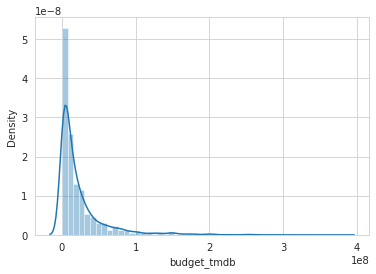

In [ ]:
sns.distplot(clean_df['budget_tmdb'])

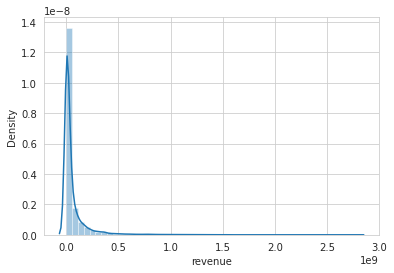

In [ ]:
sns.distplot(clean_df['revenue'])

we have the revenue, the same situation of skewness of budget.

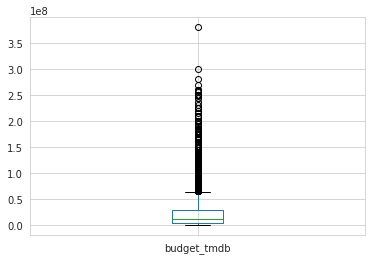

In [ ]:
bud_box = clean_df.boxplot(['budget_tmdb'], showfliers=True)

We noticed that all the movies with more than 50 bilions are considered as outliers. On one hand because not all the film are 'Blockbuster'. On the other hand, there can be many outliers near to zero.

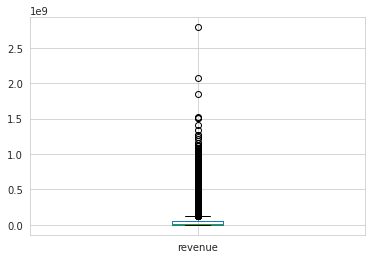

In [ ]:
bud_box = clean_df.boxplot(['revenue'], showfliers=True)

In [ ]:
clean_df[['title_tmdb', 'budget_tmdb', 'revenue', 'year']].sort_values('budget_tmdb', ascending=False).head(10)

title_tmdb  ...  year
5958  Pirates of the Caribbean: On Stranger Tides  ...  2011
4678     Pirates of the Caribbean: At World's End  ...  2007
7365                      Avengers: Age of Ultron  ...  2015
4411                             Superman Returns  ...  2006
6254                                  John Carter  ...  2012
8804                Transformers: The Last Knight  ...  2017
5797                                      Tangled  ...  2010
4662                                 Spider-Man 3  ...  2007
6669                              The Lone Ranger  ...  2013
6814          The Hobbit: The Desolation of Smaug  ...  2013

[10 rows x 4 columns]

Two Pirates of the Carribean films occupy the top positions in this list with a budget of over 300 million dollars. Despite the fact that we are facing particularly expensive productions, The Lone Ranger earned only 35% of its investment, taking 90 million dollars on a 255 million dollar budget. A loss of 165.710.090 dollars that seems incredible among these blockbusters, to show once again that no data can be underestimated (actually treated as an outlier).

In [ ]:
clean_df[['title_tmdb', 'budget_tmdb', 'year']].sort_values('budget_tmdb', ascending=False).tail(10)

title_tmdb  budget_tmdb  year
1194                        Slam          1.0  1998
1813                Modern Times          1.0  1936
6366     Love, Wedding, Marriage          1.0  2011
5745                   Tere Naam          1.0  2003
7994                 The Letters          1.0  2015
2152              Less Than Zero          1.0  1987
501                 East of Eden          1.0  1955
8025  Secret Society of Souptown          1.0  2015
8528           The Ugly Duckling          1.0  2010
1391                Lost & Found          1.0  1999

These is the number of movies under the 25 percentile of budget

In [ ]:
clean_df['budget_tmdb'].quantile(q=0.25, interpolation='linear')

3700000.0

In [ ]:
(clean_df['budget_tmdb']<=3.7e+06).sum()

2225

but we focused on the 1 percentile

In [ ]:
clean_df['budget_tmdb'].quantile(q=0.01, interpolation='linear'), clean_df['revenue'].quantile(q=0.01, interpolation='linear')

(402.2999999999997, 744.2)

In [ ]:
(clean_df['budget_tmdb']<=402.3).sum(), (clean_df['revenue']<=744.2).sum()

(89, 89)

There are 89 movies that cost less than 402.3 dollars

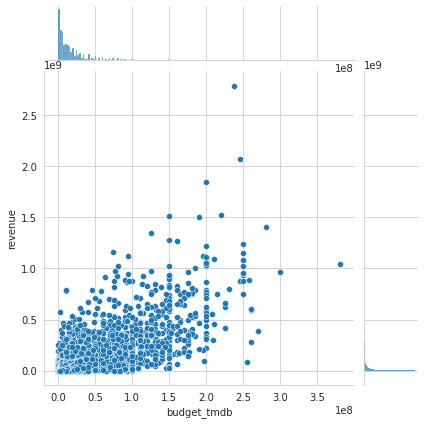

In [ ]:
sns.jointplot(x='budget_tmdb',y='revenue',data=clean_df)

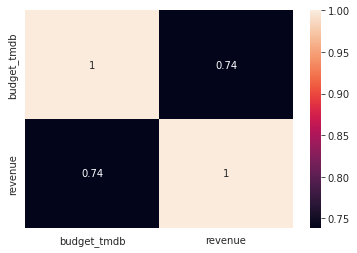

In [ ]:
sns.heatmap(clean_df[['budget_tmdb','revenue']].corr(), annot = True)

From the figure above, we can see there exist a high correlation between budget and revenue. Therefore, we  defined another feature *return* as the ration of *revenue* to *budget*. This features is very insightful in the sense that It gives us an accurate picture of how financially successful a movie is. Particularly, we cannot say a movie that earned \$ 100 million with a \$ 50 million performed better than a movie which made  \$ 50 million, taking a budget in  \$ 10 million. 

In [ ]:
clean_df['return'] = clean_df['revenue'] / clean_df['budget_tmdb']
clean_df[clean_df['return'].isnull()].shape

(0, 26)

In [ ]:
clean_df['return'].describe()

count    8.856000e+03
mean     8.536456e+03
std      2.757399e+05
min      2.000000e-07
25%      2.956744e-01
50%      1.237990e+00
75%      3.143386e+00
max      1.492500e+07
Name: return, dtype: float64

In [ ]:
clean_df['return_log'] = clean_df['return'].apply(math.log)

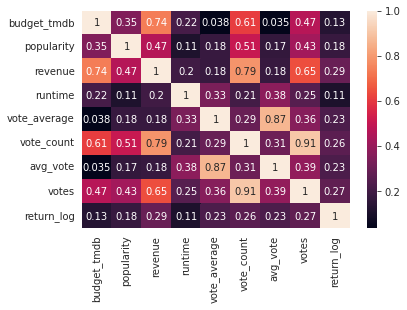

In [ ]:
sns.heatmap(clean_df[['budget_tmdb','popularity','revenue','runtime','vote_average','vote_count','avg_vote','votes','return_log']].corr(), annot = True)

##### **popularity and runtime:**

In [ ]:
clean_df['popularity'].describe()

count    8856.000000
mean        7.767887
std        11.376927
min         0.000001
25%         2.943790
50%         6.676155
75%        10.255789
max       547.488298
Name: popularity, dtype: float64

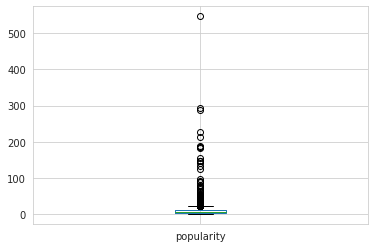

In [ ]:
clean_df.boxplot(['popularity'], showfliers=True)

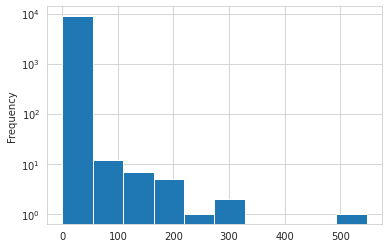

In [ ]:
clean_df['popularity'].plot(logy=True, kind='hist')

Box plot and Log Popularity shows that there is a lot of difference between the mean (almost 8) and the maxium value of 547. So we will show the most popular movies and the least popular movies

In [ ]:
clean_df[['title_tmdb', 'popularity','budget_tmdb', 'revenue', 'year']].sort_values('popularity', ascending=False).head(5)

title_tmdb  popularity  budget_tmdb       revenue  year
7675               Minions  547.488298   74000000.0  1.156731e+09  2015
7871          Wonder Woman  294.337037  149000000.0  8.205804e+08  2017
8576  Beauty and the Beast  287.253654  160000000.0  1.262886e+09  2017
8704           Baby Driver  228.032744   34000000.0  2.245113e+08  2017
7159            Big Hero 6  213.849907  165000000.0  6.521054e+08  2014

In [ ]:
clean_df[['title_tmdb', 'popularity','budget_tmdb', 'revenue', 'year']].sort_values('popularity', ascending=False).tail(5)

title_tmdb  popularity  budget_tmdb    revenue  year
1061                 Cheetah    0.011574    5000000.0  8153677.0  1989
2865  Grave of the Fireflies    0.010902    3700000.0   516962.0  1988
2159  Million Dollar Mystery    0.005351   10000000.0   989033.0  1987
4699                   Swoon    0.003013     250000.0   340147.0  1992
7573      Falling From Grace    0.000001          3.0      232.0  1992

It is reasonable to expect that there are movies more famous than others. In this datset there are very expensive productions and films for less than 10000 dollars

In [ ]:
clean_df['runtime'].describe()

count    8856.000000
mean      107.432475
std        20.415558
min        49.000000
25%        94.000000
50%       103.000000
75%       117.000000
max       422.000000
Name: runtime, dtype: float64

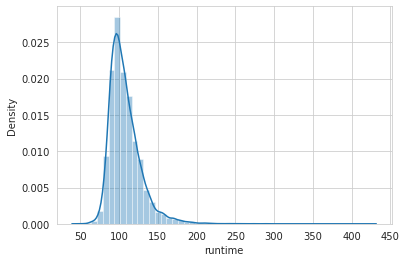

In [ ]:
sns.distplot(clean_df['runtime'])

As we can expect the most frequent duration is 100 minutes.

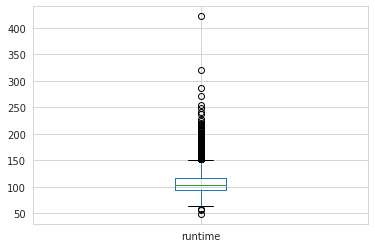

In [ ]:
clean_df.boxplot(['runtime'], showfliers=True)

The Longest Movies:

In [ ]:
clean_df[['runtime', 'title_tmdb', 'year']].sort_values('runtime',ascending=False).head(5)

runtime                  title_tmdb  year
3829    422.0               War and Peace  1966
6441    320.0          Gangs of Wasseypur  2012
682     287.0  Until the End of the World  1991
6024    272.0         Mysteries of Lisbon  2010
2120    254.0                  Gettysburg  1993

The Shortest Movies:

In [ ]:
clean_df[['runtime', 'title_tmdb', 'year']].sort_values('runtime',ascending=False).tail(5)

runtime                       title_tmdb  year
3804     63.0                      The Unknown  1927
5159     63.0         5 Centimeters per Second  2007
3803     59.0                        The Cheat  1915
8325     57.0               Lights of New York  1928
6889     49.0  Yu-Gi-Oh! 3D: Bonds Beyond Time  2010

Obviously, we can not consider movie out of the interquarile range as outlier because movies can have very different durations.

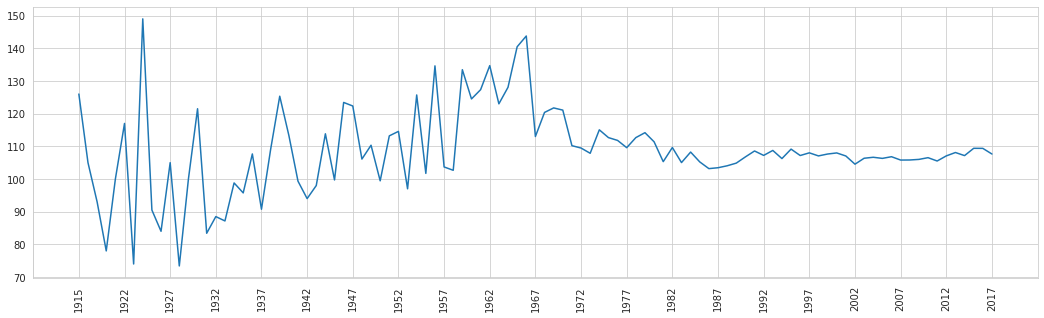

In [ ]:
#plt.figure(figsize=(18,5))
fig, ax = plt.subplots(figsize=(18,5))
year_runtime = clean_df.groupby('year')['runtime'].mean()
plt.plot(year_runtime.index, year_runtime)
plt.xticks(rotation='vertical')
#plt.show()
loc = plticker.MultipleLocator(base=5.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.show()

Since 1915 the films seem to have no fixed duration, but with an ascending trend starting from 1932 until it stabilized. Starting 1967, films started having 110 minutes duration and has remained more or less constant ever since.

##### **production_companies and production_countries:**

In [ ]:
clean_df['production_companies'] = clean_df['production_companies'].apply(ast.literal_eval).values.tolist()
s = clean_df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'

In [ ]:
com_df = clean_df.drop('production_companies', axis=1).join(s)

In [ ]:
com_sum = pd.DataFrame(com_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']
com_mean = pd.DataFrame(com_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
com_count = pd.DataFrame(com_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number']

com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)

Highest Earning Production Companies :

In [ ]:
com_pivot.sort_values('Total', ascending=False).head(10)

Total       Average  Number
Universal Pictures                      5.666042e+10  1.124215e+08     504
Warner Bros.                            5.224246e+10  1.102162e+08     474
Paramount Pictures                      5.010671e+10  1.111014e+08     451
Twentieth Century Fox Film Corporation  4.767337e+10  1.313316e+08     363
Columbia Pictures                       4.554177e+10  1.054208e+08     432
Walt Disney Pictures                    4.170095e+10  2.622701e+08     159
New Line Cinema                         2.278181e+10  1.030851e+08     221
Amblin Entertainment                    1.629705e+10  2.546414e+08      64
DreamWorks SKG                          1.601241e+10  1.759606e+08      91
Village Roadshow Pictures               1.524850e+10  1.509752e+08     101

Most Succesful Production Companies

In [ ]:
com_pivot[com_pivot['Number'] >= 15].sort_values('Average', ascending=False).head(10)

Total       Average  Number
Marvel Studios           1.167954e+10  7.786357e+08      15
Pixar Animation Studios  1.118853e+10  6.215852e+08      18
Lucasfilm                9.904470e+09  4.502032e+08      22
DreamWorks Animation     1.370752e+10  4.031622e+08      34
Jerry Bruckheimer Films  9.134308e+09  3.513195e+08      26
Legendary Pictures       1.328340e+10  3.406001e+08      39
1492 Pictures            5.657217e+09  3.142898e+08      18
Ingenious Film Partners  8.114513e+09  3.005375e+08      27
Atlas Entertainment      4.795004e+09  2.820591e+08      17
DC Comics                4.759076e+09  2.799456e+08      17

In [ ]:
clean_df['production_countries'] = clean_df['production_countries'].apply(ast.literal_eval).values.tolist()
s = clean_df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'

In [ ]:
con_df = clean_df.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(10)

num_movies                   country
0        6531  United States of America
1         982            United Kingdom
2         689                    France
3         528                   Germany
4         401                    Canada
5         237                     India
6         190                    Russia
7         189                     Italy
8         178                 Australia
9         160                     Spain

##### **genres:**

In order to investigate on different genres we created a new dataset of genres to show the occurences of each one.

In [ ]:
# Inorder to count genre
clean_df['genres'] = clean_df['genres'].apply(ast.literal_eval).values.tolist()
s = clean_df.apply(lambda x: pd.Series(x['genres']).astype(str),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre_list'

In [ ]:
gen_df = clean_df.drop('genres', axis=1).join(s)

In [ ]:
genres_train = gen_df['genre_list'].drop_duplicates()

In [ ]:
for genre in genres_train:
  print(genre)

Animation
Comedy
Family
Adventure
Fantasy
Romance
Drama
Action
Crime
Thriller
Horror
History
Science Fiction
Mystery
Music
Foreign
Western
War
Documentary
Musical
TV Movie
Biography
Sport


In [ ]:
pop_gen = pd.DataFrame(gen_df['genre_list'].value_counts()).reset_index()
pop_gen.columns = ['genre_list', 'movies']
pop_gen.head(10)

genre_list  movies
0            Drama    4522
1           Comedy    3136
2           Action    2061
3         Thriller    1902
4          Romance    1501
5        Adventure    1217
6            Crime    1210
7           Horror     935
8  Science Fiction     654
9           Family     607

In [ ]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre_list', y='movies', data=pop_gen.head(15))
plt.show()

**Drama** is the most commonly occurring genre with almost half the movies identifying itself as a drama film. **Comedy** comes in at a distant second with 25% of the movies having adequate doses of humor. Other major genres represented in the top 10 are Action, Thriller, Romance, Adventure and Crime.

In [ ]:
top_genres = ['Drama', 'Comedy', 'Action',  'Thriller','Romance','Adventure', 'Crime','Horror', 'Science Fiction', 'Fantasy']
top_movies = gen_df[(gen_df['genre_list'].isin(top_genres))]

Then we focused on popularity based on these top genres

<Figure size 1296x576 with 0 Axes>

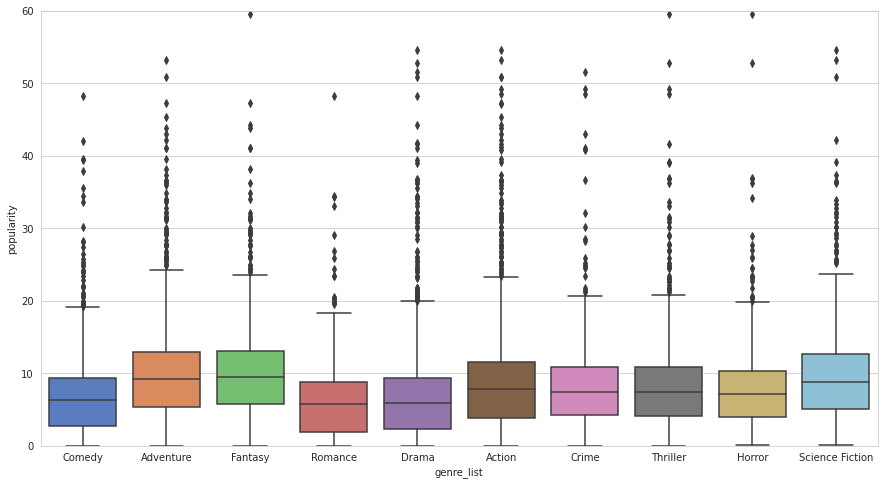

In [ ]:
plt.figure(figsize=(18,8))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='genre_list', y='popularity', data=top_movies, palette="muted", ax =ax)
ax.set_ylim([0, 60]) #not considering too high values (like 300)
plt.show()

We noted that although **drama** and **comedy** are the most frequent movies, they do not have the same popularity as genres like **fantasy** or **adventure**. All this reasoning is done in the average, not considering possibly films with very high poplarity values.

In [ ]:
pop_avg=pop_gen #create a df of genre popularity avg
pop_avg['popularity_avg']=[0]*23
pop_avg.index = pop_avg["genre_list"]

In [ ]:
for _, row in gen_df.iterrows():
    pop_avg['popularity_avg'].loc[row['genre_list']]+=row['popularity'] #store total popularity per genre

In [ ]:
pop_gen.head()

genre_list  movies  popularity_avg
genre_list                                   
Drama           Drama    4522    30489.516707
Comedy         Comedy    3136    21147.708423
Action         Action    2061    19939.166882
Thriller     Thriller    1902    16194.181312
Romance       Romance    1501     9482.792659

In [ ]:
pop_gen['popularity_avg']=pop_gen['popularity_avg']/pop_gen['movies']

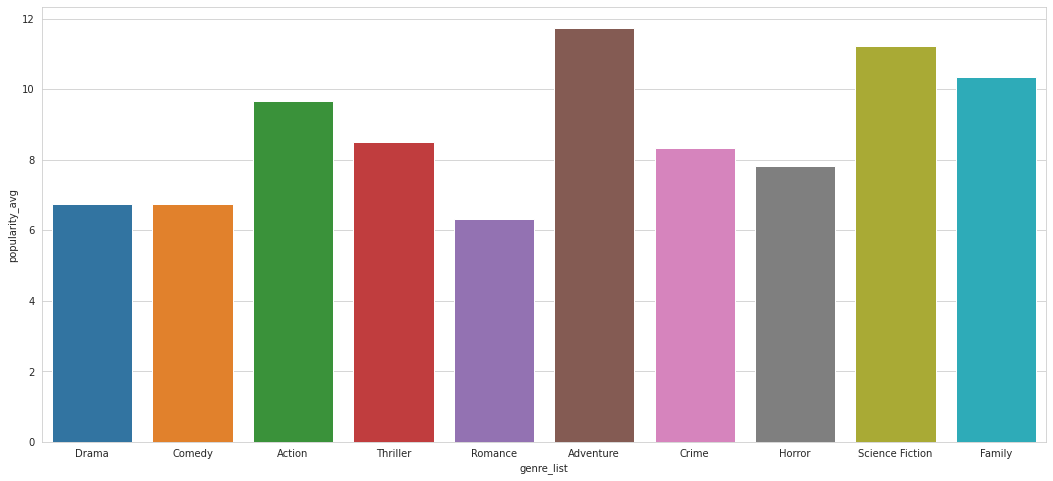

In [ ]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre_list', y='popularity_avg', data=pop_gen.head(10))
plt.show()

Even using all the movies, the popularity of the films in the minority seems higher than those in the majority. To testify, probably, the greatest number of people who loved certain genres. Maybe adventure movies have a larger fan base than drama or comedy.

##### **spoken_language:**

In [ ]:
clean_df['spoken_languages'] = clean_df['spoken_languages'].apply(ast.literal_eval).values.tolist()

In [ ]:
clean_df['spoken_languages']

0                 [English]
1       [English, Français]
2                 [English]
3                 [English]
4                 [English]
               ...         
8851              [Pусский]
8852              [Pусский]
8853              [Pусский]
8854              [Pусский]
8855              [Pусский]
Name: spoken_languages, Length: 8856, dtype: object

In [ ]:
clean_df['N_spoken_languages'] = clean_df['spoken_languages'].apply(lambda x: len(x))

In [ ]:
clean_df['N_spoken_languages'].plot.hist()
clean_df['N_spoken_languages'].value_counts()

1    6392
2    1538
3     576
4     224
5      84
6      30
7       7
9       3
8       2
Name: N_spoken_languages, dtype: int64

Most movies speak only one language in the whole duration. 9 is the highest number of language spoken in a movie. 

Let's explore if movies with higher numbers of spoken language would somehow induce a higher return.

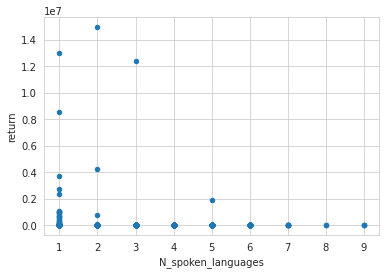

In [ ]:
clean_df.plot.scatter(x='N_spoken_languages', y='return')

The scatter plot indicates there exists no evident corelation between the number of spoken languages and return. On one hand, many high return movies speaks only one languag. On the other hand, a movie speaking more than 3 languages is more likely to fail.

In [ ]:
clean_df = clean_df.drop('spoken_languages', axis=1)

##### **vote_count and votes:**
In this section, we will work with metrics provided to us by TMDB users and IMDB users. We will try to gain a deeper understanding of the vote average and vote count features and try and deduce any relationships between them as well as other numeric features such as budget and revenue.

count     8856.000000
mean       477.426378
std       1029.802869
min          1.000000
25%         26.000000
50%        110.000000
75%        424.250000
max      14075.000000
Name: vote_count, dtype: float64

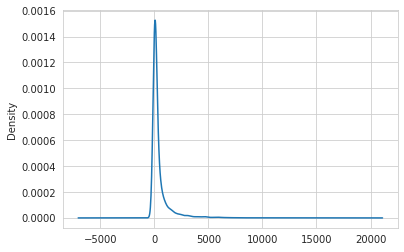

In [ ]:
clean_df['vote_count'].plot.kde()
clean_df['vote_count'].describe()

In [ ]:
clean_df['votes'].plot.kde()
clean_df['votes'].describe()

count    8.856000e+03
mean     7.264969e+04
std      1.482251e+05
min      1.000000e+02
25%      5.012500e+03
50%      2.069850e+04
75%      7.354650e+04
max      2.278845e+06
Name: votes, dtype: float64

Both distribution are extremely skewed. The median vote count from TMDB stands at only 110 votes. The most votes movie has got stands at 14,075. While the median vote count from IMDB has 20,698 votes, with maximum values reaching as high as 2.3 million. 
Theforefore, TMDB Votes are not as potent and suggestive as its IMDB counterpart. Nevertheless, let us check which the most voted on both websites.

**Most voted movies by TMDB and IMDB**

In [ ]:
plt.figure(figsize=(12,4))
plt.barh(clean_df.sort_values('vote_count', ascending=False)['title_tmdb'].head(6), 
         clean_df.sort_values('vote_count', ascending=False)['vote_count'].head(6), 
         align='center', color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Votes")
plt.title("Most voted Movies on TMDB")

Text(0.5, 1.0, 'Most voted Movies on TMDB')

**Inception**, **The Dark Knight** gain the most voted on TMDB.

In [ ]:
plt.figure(figsize=(12,4))
plt.barh(clean_df.sort_values('votes', ascending=False)['title_tmdb'].head(6),
         clean_df.sort_values('votes', ascending=False)['votes'].head(6), 
         align='center', color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Votes")
plt.title("Most voted Movies on IMDB")

Text(0.5, 1.0, 'Most voted Movies on IMDB')

**The Shawshank Redemption**, **The Dark Knight**, **Inception** figure at the top of our chart. Unsurprisingly, IMDB and IMDB share some popular movies in common, e.g., **The Dark Knight**, **Inception**. Strange enough, **The Shawshank Redemption** falls out of the top 6 voted movies on TMDB.

##### **vote_average and avg_vote:**

In [ ]:
sns.distplot(clean_df['vote_average'])
clean_df['vote_average'].describe()

count    8856.000000
mean        6.130431
std         0.966414
min         1.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

Users on TMDB are very strict with their rating. The mean rating is only a **6.1** on a scale of 10. Half of the movies have a rating lower than **6.2**.

**Hightest voted movies**

We only take into consideration of movies which have more than 5000 votes.

In [ ]:
clean_df[clean_df['vote_count']>5000][['title_tmdb', 'vote_average','vote_count', 'avg_vote','year']].sort_values('vote_average', ascending=False).head(10)

title_tmdb  vote_average  vote_count  avg_vote  year
190   The Shawshank Redemption           8.5      8358.0       9.3  1994
450              The Godfather           8.5      6024.0       9.2  1972
180               Pulp Fiction           8.3      8670.0       8.9  1994
4930           The Dark Knight           8.3     12269.0       9.0  2008
1582                Fight Club           8.3      9678.0       8.8  1999
6214          The Intouchables           8.2      5410.0       8.5  2011
214               Forrest Gump           8.2      8147.0       8.8  1994
603    The Empire Strikes Back           8.2      5998.0       8.7  1980
159                  Star Wars           8.1      6778.0       8.6  1977
36                       Se7en           8.1      5915.0       8.6  1995

 **The Shawshank Redemption** and **The Godfather** are voted as the highest movies. Interstingly, they also have a very high rating in IMDB (over 9).

count    8856.000000
mean        6.347572
std         1.039608
min         1.100000
25%         5.700000
50%         6.400000
75%         7.100000
max         9.300000
Name: avg_vote, dtype: float64

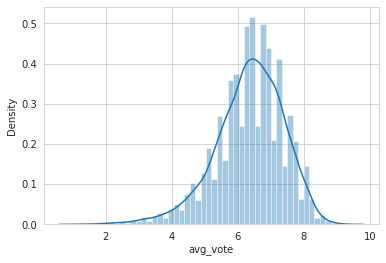

In [ ]:
sns.distplot(clean_df['avg_vote'])
clean_df['avg_vote'].describe()

Users on IMDB are very similar in their ratings to users on TMDB. The mean rating is a **6.3** on a scale of 10,  a little bit higher than the mean rating on TMDB. 

**Highest voted movies**

Similar to the previous case, we only select movies carrying more than 5000 votes.

In [ ]:
clean_df[clean_df['vote_count']>5000][['title_tmdb', 'avg_vote','votes', 'vote_average','year']].sort_values('avg_vote', ascending=False).head(10)

title_tmdb  ...  year
190                            The Shawshank Redemption  ...  1994
450                                       The Godfather  ...  1972
4930                                    The Dark Knight  ...  2008
180                                        Pulp Fiction  ...  1994
3409      The Lord of the Rings: The Return of the King  ...  2003
1582                                         Fight Club  ...  1999
5674                                          Inception  ...  2010
214                                        Forrest Gump  ...  1994
2576  The Lord of the Rings: The Fellowship of the Ring  ...  2001
603                             The Empire Strikes Back  ...  1980

[10 rows x 5 columns]

 Interstingly, **The Shawshank Redemption** and **The Godfather** are also voted as the highest movies on IMDB. 

Study correlations between votes on TMDB/IMDB(vote_average/avg_vote) and other features.

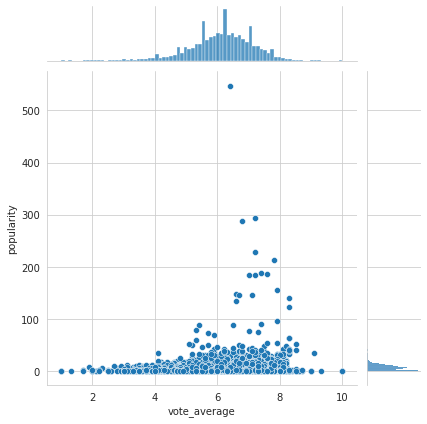

In [ ]:
sns.jointplot(x='vote_average', y='popularity', data=clean_df)

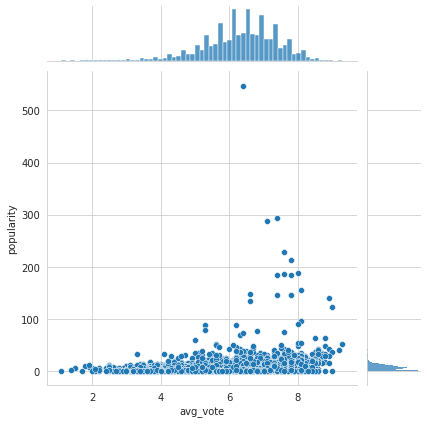

In [ ]:
sns.jointplot(x='avg_vote', y='popularity', data=clean_df)

Popularity and vote do not enjoy a tangible correlation. That is to say, a high voted movie does not necessarily imply it is popular.

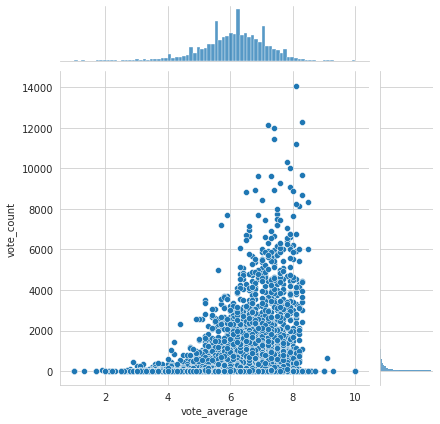

In [ ]:
sns.jointplot(x='vote_average', y='vote_count', data=clean_df)

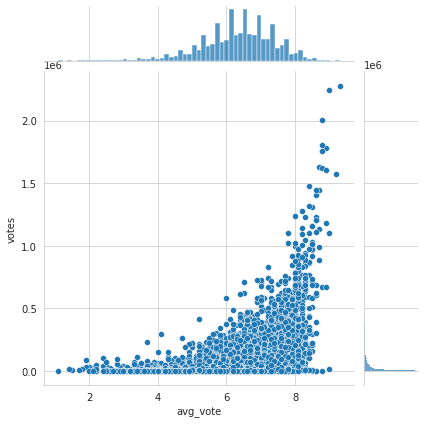

In [ ]:
sns.jointplot(x='avg_vote', y='votes', data=clean_df)

There is no strong correlation between the number of votes and ratings. Thus a more significant number of votes on a particular movie does not necessarily mean the movie is good.

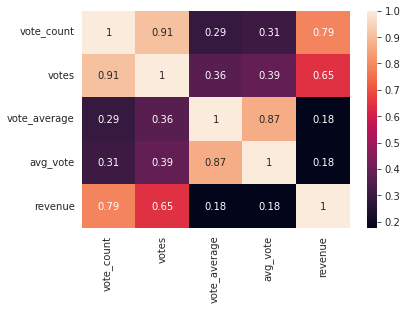

In [ ]:
sns.heatmap(clean_df[['vote_count','votes','vote_average','avg_vote','revenue']].corr(), annot = True)

As we can see, there are visible correlations between the number of votes on TMDB and IMDB, as well as between ratings on TMDB and IMDB. In other words, users on TMDB and IMDB have similar tastes in movies, or users who vote on TMDB go to vote on IMDB too. 

As expected, more votes on a movie suggest that more people watched this movie, bringing about higher revenue.  
Quite the opposite, a high rating does not guarantee a good revenue.

##### **actors, director and writer:**

Actors with the Highest Total Revenue

In [ ]:
clean_df['actors_tmdb'] = clean_df['actors_tmdb'].apply(ast.literal_eval).values.tolist()
s = clean_df['actors_tmdb'].apply(pd.Series).stack().reset_index(level=1, drop=True)
s.name = 'actor'
actor_df = clean_df.drop('actors_tmdb', axis=1).join(s)

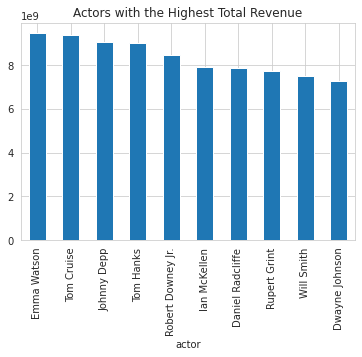

In [ ]:
sns.set_style('whitegrid')
plt.title('Actors with the Highest Total Revenue')
actor_df.groupby('actor')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

Emma Watson, Tom Cruise, and Johnny Depp take the top 3 places who earn the most total revenue.

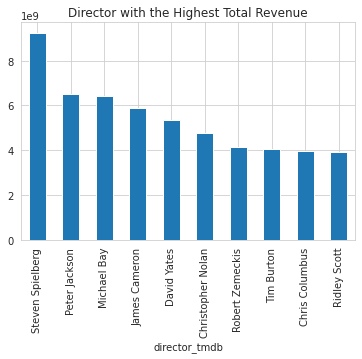

In [ ]:
sns.set_style('whitegrid')
plt.title('Director with the Highest Total Revenue')
clean_df.groupby('director_tmdb')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

Steven Spielberg earns the most revenue, far ahead of the other directors.

In [ ]:
clean_df['writer'] = clean_df['writer'].apply(ast.literal_eval).values.tolist()
s = clean_df['writer'].apply(pd.Series).stack().reset_index(level=1, drop=True)
s.name = 'writers'
writer_df = clean_df.drop('writer', axis=1).join(s)

In [ ]:
writer_df['writers'].value_counts()

Woody Allen                  41
Stephen King                 34
Luc Besson                   32
John Hughes                  25
David Koepp                  21
                             ..
Sean Hood                     1
Richard Rionda Del Castro     1
Bent Hamer                    1
William Diehl                 1
Christopher Coccio            1
Name: writers, Length: 8560, dtype: int64

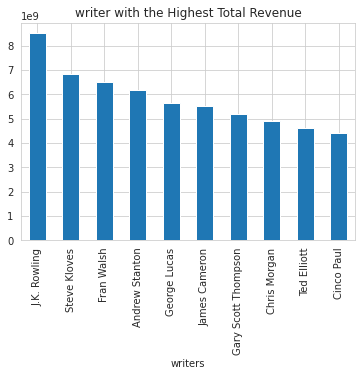

In [ ]:
sns.set_style('whitegrid')
plt.title('writer with the Highest Total Revenue')
writer_df.groupby('writers')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

J.K. Rowling occupies the first position among all the writers. Besides, James Cameron is very successful both as a director and as a writer.

##### **original_language:** 


In [ ]:
clean_df['original_language'].drop_duplicates().shape[0]

54

In [ ]:
lang_df = pd.DataFrame(clean_df['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number', 'language']
lang_df.head()

number language
en    7422       en
fr     229       fr
ru     159       ru
hi     141       hi
es     121       es

There are over 54 languages represented in our dataset. As we had expected, English language films form the overwhelmingly majority. French and Russian movies come at a very distant second and third respectively. Let us represent the most popular languages (apart from English) in the form of a bar plot.

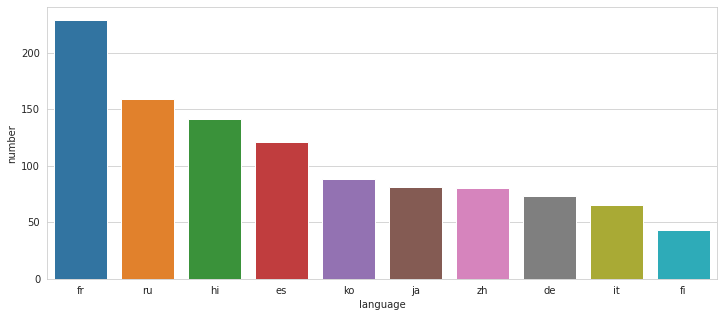

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_df.iloc[1:11])
plt.show()

As mentioned earlier, **French** and **Russian** are the most commonly occurring languages after **English**. 

original_language will be replaced by a feature called **is_English** to denote if a particular film is in English or another Language.

In [ ]:
clean_df['is_english'] = clean_df['original_language'].apply(lambda x: 1 if x=='en' else 0)
clean_df = clean_df.drop('original_language', axis=1)

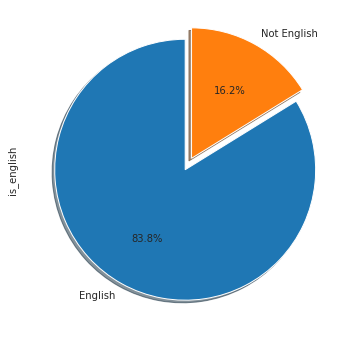

In [ ]:
clean_df['is_english'].value_counts().plot(kind='pie',labels=['English','Not English'],startangle=90,shadow=True,
            figsize=(6,6),autopct="%1.1f%%", explode=(0,0.1))

The vast majority of movies are shot in English, over 80 percent.

##### **overiew, tagline, title and keywords:**

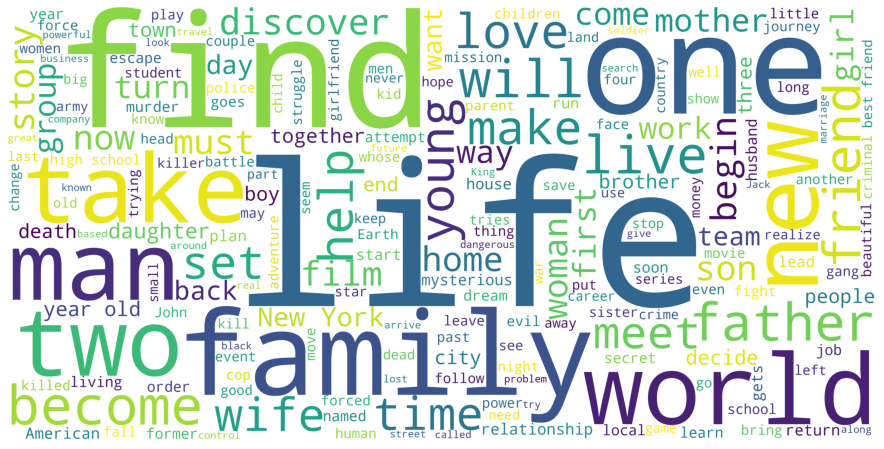

In [ ]:
plt.figure(figsize=(16,8))
plt.imshow(WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, 
                     width=4000).generate(' '.join(clean_df['overview'])))
plt.axis('off')
plt.show()

**Life** is the most commonly used word in the Description. **One** and **Find** are also popular , together with **Love**, **Man** and **Girl**, these wordclouds give us a pretty good idea of the most popular themes present in movies.

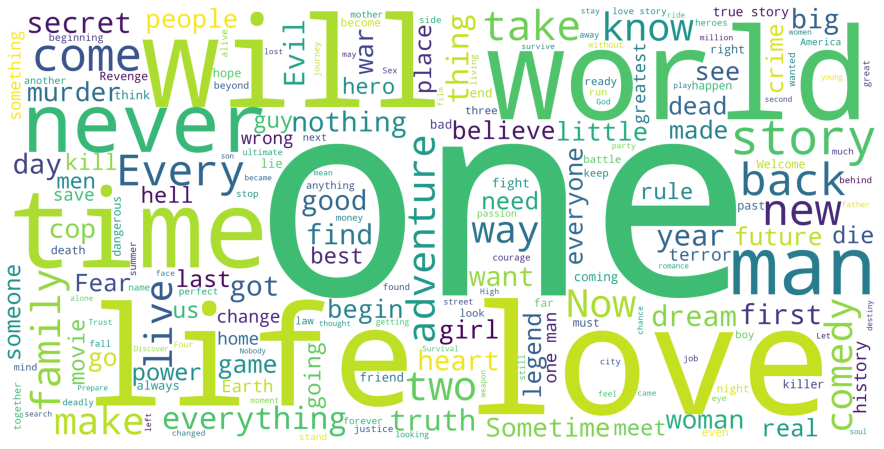

In [ ]:
plt.figure(figsize=(16,8))
plt.imshow(WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, 
                     width=4000).generate(' '.join(clean_df['tagline'])))
plt.axis('off')
plt.show()

Taglines are the movies' adversing slogan, which gives quick and catchy insight into the themes. **One** and **Love** are the most commonly used word in Movie's taglines.
Together with **life**, **world** and **time**, these wordclouds give us a pretty good idea of the most popular subject present in movies.

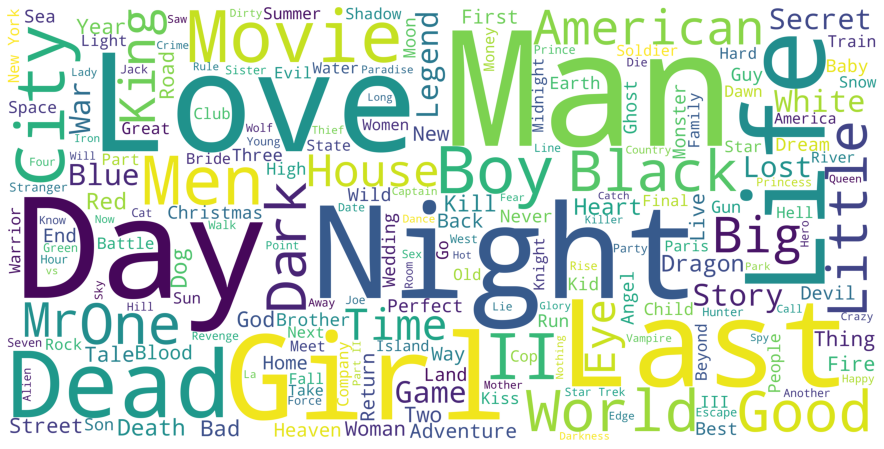

In [ ]:
plt.figure(figsize=(16,8))
plt.imshow(WordCloud(stopwords=STOPWORDS, background_color='white', 
                     height=2000, width=4000).generate(' '.join(clean_df['title_tmdb'])))
plt.axis('off')
plt.show()

**Man**, **Girl**, **Love** are the most commonly used word in Movie titles. **day** and **Night** are also hot words in Movie Blurbs. These would cloud encapsulates the idea of ubiquitious presence of romance movies.

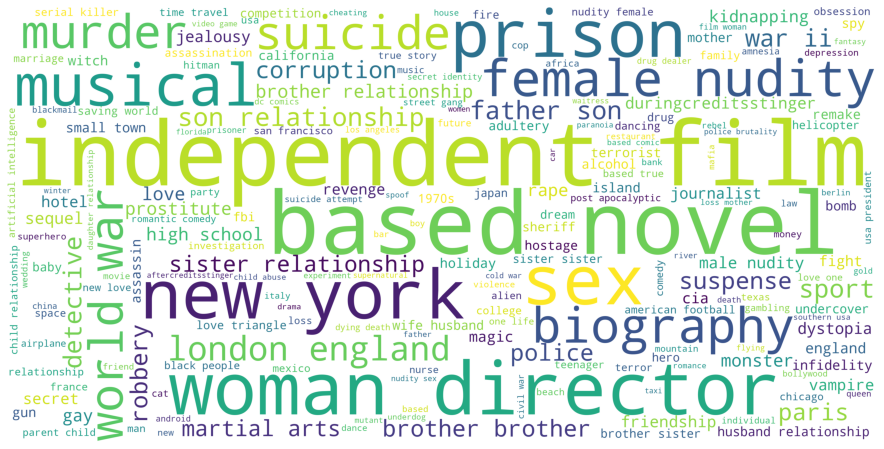

In [ ]:
clean_df['keywords'] = clean_df['keywords'].apply(ast.literal_eval).values.tolist()
plt.figure(figsize=(16,8))
plt.imshow(WordCloud(stopwords=STOPWORDS, 
                     background_color='white', 
                     height=2000, 
                     width=4000).generate(' '.join(clean_df['keywords'].apply(lambda x: ','.join(map(str, x))))))
plt.axis('off')
plt.show()

**Independent**, **film**, **woman**, **director**, **based**, **novel**, **prison**, **sex** are the hottest themes in keywords, which means movies revolved around independence, women, prison win the favor of the market.

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8856 entries, 0 to 8855
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  8856 non-null   int64  
 1   budget_tmdb            8856 non-null   float64
 2   genres                 8856 non-null   object 
 3   id                     8856 non-null   int64  
 4   overview               8856 non-null   object 
 5   popularity             8856 non-null   float64
 6   production_companies   8856 non-null   object 
 7   production_countries   8856 non-null   object 
 8   revenue                8856 non-null   float64
 9   runtime                8856 non-null   float64
 10  tagline                8856 non-null   object 
 11  title_tmdb             8856 non-null   object 
 12  vote_average           8856 non-null   float64
 13  vote_count             8856 non-null   float64
 14  avg_vote               8856 non-null   float64
 15  vote

In [ ]:
clean_df.to_csv('/content/drive/MyDrive/BDA/input/eda_df.csv', index=False)

<a id='mp'></a>
## D. Motivation and Proposal ([to top](#top))

We all know how the economic return a producer can get from a film is important. The purpose of ​​our task is to be able to predict the economic return of a movie starting from its characteristics. The idea is to use a regressor, not only stopping us at a quantitative classification (accuracy), but also trying to find the variables that most influence the success of the movie through an explainer. As we are convinced that a prediction without an explanation remains unusable. Once the prediction has been realized, we would like to dedicate ourselves to the creation of a prototype of a recommendation system based on keywords and votes (perhaps adding datasets). Obviously not trying to compete with the Netflix one, which currently seems to be state of the art, but giving a first structure to a system that in a world like today's: so full of data, it becomes necessary not to leave the user alone in navigation and allows to increase the appeal of the site.

<a id='reg'></a>
# 2. Movie Profitability Regression ([to top](#top))

<a id='afer'></a>
## A. Additional Features Engineering([to top](#top))

In [2]:
!pip3 install auto-sklearn
!pip3 install -U git+https://github.com/scikit-learn-contrib/imbalanced-learn.git

     |████████████████████████████████| 6.3 MB 4.5 MB/s 
     |████████████████████████████████| 28.5 MB 48 kB/s 
     |████████████████████████████████| 22.3 MB 1.5 MB/s 
     |████████████████████████████████| 722 kB 61.1 MB/s 
     |████████████████████████████████| 4.2 MB 43.9 MB/s 
     |████████████████████████████████| 4.0 MB 51.7 MB/s 
     |████████████████████████████████| 208 kB 50.2 MB/s 
     |████████████████████████████████| 973 kB 41.4 MB/s 
     |████████████████████████████████| 125 kB 57.0 MB/s 
     |████████████████████████████████| 45 kB 3.4 MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.14.0-py3-none-any.whl size=6585992 sha256=e896eaf33f4a7cfb4d2f8b5f6c5bd1a4013136f3fc973de1f57f6c63b75e223a
  Stored in directory: /root/.cache/pip/wheels/c5/56/cc/e33d4a8cb4ffeb040d59ea08c4715d20806945dc80d3c25384
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl size=7044 sha256=9ced492e6d4240eae7a20b518a6cf894e08236446dcd4944bc648eb49ac8ed82

**Note:** The auto-sklearn installation ask to **restart the runtime**:

In [ ]:
# Kill the current Python runtime process
import os
os.kill(os.getpid(), 9)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Handling Cyclical Features - month:
 [Feature Engineering - Handling Cyclical Features](http://blog.davidkaleko.com/feature-engineering-cyclical-features.html)

In [3]:
%matplotlib inline
import re
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, GradientBoostingRegressor, GradientBoostingClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.dummy import DummyRegressor, DummyClassifier
import warnings
import math
from time import strptime
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, KFold, RepeatedKFold, RepeatedStratifiedKFold
from sklearn.metrics import r2_score, accuracy_score, classification_report, plot_confusion_matrix, plot_roc_curve
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
import matplotlib.ticker as plticker
from numpy import mean
from numpy import std
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from keras import initializers
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn.metrics
import autosklearn.regression
import autosklearn.classification
from imblearn.over_sampling import SMOTE
import six
import sys
sys.modules['sklearn.externals.six'] = six
warnings.filterwarnings("ignore")
np.random.seed(42)

In [4]:
df = pd.read_csv('/content/drive/MyDrive/BDA/input/eda_df.csv')

In [5]:
df.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8856 entries, 0 to 8855
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   genres                8856 non-null   object
 1   overview              8852 non-null   object
 2   production_companies  8856 non-null   object
 3   production_countries  8856 non-null   object
 4   tagline               6709 non-null   object
 5   title_tmdb            8856 non-null   object
 6   writer                8856 non-null   object
 7   actors_tmdb           8856 non-null   object
 8   director_tmdb         8856 non-null   object
 9   keywords              8856 non-null   object
 10  month                 8856 non-null   object
dtypes: object(11)
memory usage: 761.2+ KB


In [6]:
df['month'] = df['month'].apply(lambda m: strptime(m,'%b').tm_mon)

In [7]:
df['month'].describe()

count    8856.000000
mean        6.785005
std         3.455103
min         1.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        12.000000
Name: month, dtype: float64

Months are numbered one through twelve.

In [8]:
df['month_sin'] = np.sin((df.month-1)*(2.*np.pi/12))
df['month_cos'] = np.cos((df.month-1)*(2.*np.pi/12))

We map the cyclical variable onto a circle such that the lowest value for that variable appears right next to the largest value. We compute the x- and y- component of that point using sin and cos trigonometric functions.

Note that when we perform this transformation for the "month" variable, we also shift the values down by one such that it extends from 0 to 11, for convenience.

The claim is that using this transform will improve the predictive performance of our models.

In [9]:
df = df.drop('month', axis=1)

### **Encoding genres**:

In [10]:
df['genres'] = df['genres'].apply(ast.literal_eval).values.tolist()
genres = set(df.apply(lambda x: pd.Series(x['genres']).astype(str),axis=1).stack().reset_index(level=1, drop=True))

In [11]:
genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Science Fiction',
 'Sport',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [12]:
for genre in genres:
  df['is_' + genre] = df['genres'].apply(
      lambda values: int(genre in values)
  )

In [13]:
df = df.drop('genres', axis=1)

### **Encoding production_countries:**

In [14]:
df['production_countries'] = df['production_countries'].apply(ast.literal_eval).values.tolist()
s = df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'

In [15]:
coun_df = df.drop('production_countries', axis=1).join(s)
coun_df = pd.DataFrame(coun_df['countries'].value_counts())

In [16]:
coun_df = df.drop('production_countries', axis=1).join(s)
coun_df = pd.DataFrame(coun_df['countries'].value_counts())
coun_df['country'] = coun_df.index
coun_df.columns = ['num_movies', 'country']
coun_df = coun_df.reset_index().drop('index', axis=1)

In [17]:
coun_df.shape

(103, 2)

In [18]:
coun_df = coun_df[coun_df['num_movies']>(len(df)*0.01)]

In [19]:
coun_df

num_movies                   country
0         6531  United States of America
1          982            United Kingdom
2          689                    France
3          528                   Germany
4          401                    Canada
5          237                     India
6          190                    Russia
7          189                     Italy
8          178                 Australia
9          160                     Spain
10         160                     Japan
11         132                     China
12         114                 Hong Kong
13         106               South Korea

In [20]:
set(coun_df['country'])

{'Australia',
 'Canada',
 'China',
 'France',
 'Germany',
 'Hong Kong',
 'India',
 'Italy',
 'Japan',
 'Russia',
 'South Korea',
 'Spain',
 'United Kingdom',
 'United States of America'}

In [21]:
for country in set(coun_df['country']):
  df[country] = df['production_countries'].apply(
      lambda values: int(country in values)
  )

In [22]:
  df['other_country'] = df['production_countries'].apply(
      lambda values: 1 if len(set(values)-set(coun_df['country'])) > 0 else 0
  )

In [23]:
df[df['other_country']==1]['production_countries']

42                    [Belgium, France, Italy]
56                                      [Iran]
58      [Netherlands, United Kingdom, Belgium]
124          [France, Belgium, United Kingdom]
131        [United Kingdom, Macedonia, France]
                         ...                  
8832                 [France, Sweden, Denmark]
8840                                  [Poland]
8841                                  [Norway]
8842                         [Belgium, France]
8847                                 [Finland]
Name: production_countries, Length: 1025, dtype: object

In [24]:
df = df.drop('production_countries', axis=1)

### **Encoding production_companies by Clustering:**

In [25]:
df['production_companies'] = df['production_companies'].apply(ast.literal_eval).values.tolist()
s = df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'

In [26]:
comp_df = df.drop('production_companies', axis=1).join(s).reset_index().drop('index', axis=1)

In [27]:
comp_df = comp_df[~comp_df['companies'].isnull()]

In [28]:
comp_df.shape, df.shape

((18465, 64), (8856, 64))

In [29]:
companies_df = comp_df[['companies']].drop_duplicates()

In [30]:
companies_df.shape

(6139, 1)

Extract RFM features from describing production_companies profile:

In [31]:
max_year = comp_df.year.max()
companies_df['Lastyear'] = comp_df.groupby('companies')['year'].transform('max').astype('int')
companies_df['Monetary'] = comp_df.groupby('companies')['budget_tmdb'].transform('mean')
companies_df['avg_count'] = comp_df.groupby('companies')['vote_count'].transform('mean')
companies_df['avg_vote'] = comp_df.groupby('companies')['vote_average'].transform('mean')
companies_df['Recency'] = pd.Series(max_year - companies_df['Lastyear'])
companies_df['Frequency'] = comp_df.groupby('companies')['id'].transform('count')
companies_df = companies_df.drop('Lastyear', axis=1)

In [32]:
companies_df.head()

companies      Monetary  ...  Recency  Frequency
0    Pixar Animation Studios  1.486667e+08  ...        0         18
1           TriStar Pictures  2.657033e+07  ...        0        136
2               Teitler Film  6.500000e+07  ...       12          2
3  Interscope Communications  2.035158e+07  ...       17         19
4               Warner Bros.  4.202192e+07  ...        0        474

[5 rows x 6 columns]

In [33]:
companies_df_copy = companies_df.copy()
companies_df_copy = companies_df_copy.drop('companies', axis=1)

Normalization by Min-Max:

In [34]:
scaler_m = MinMaxScaler()
X_m = scaler_m.fit_transform(companies_df_copy.values)
X_m[:5]

array([[0.53095238, 0.38917533, 0.68518519, 0.        , 0.03379722],
       [0.09489404, 0.0344251 , 0.5620098 , 0.        , 0.26838966],
       [0.23214285, 0.14065367, 0.61111111, 0.11764706, 0.00198807],
       [0.07268421, 0.0262399 , 0.51111111, 0.16666667, 0.03578529],
       [0.15007827, 0.07954082, 0.58907642, 0.        , 0.94035785]])

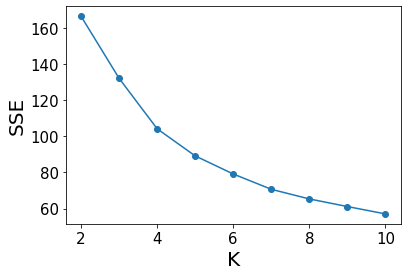

In [35]:
sse_list = list()
max_k = 10
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters = k, n_init=10, max_iter=100, random_state=0)
    kmeans.fit(X_m)
    
    sse = kmeans.inertia_
    sse_list.append(sse)
    
plt.plot(range(2, len(sse_list) + 2), sse_list,'-o')
plt.ylabel('SSE', fontsize=20)
plt.xlabel('K', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [36]:
kmeans = KMeans(n_clusters=4, n_init=10, max_iter=100, random_state=0)
kmeans.fit(X_m)

KMeans(max_iter=100, n_clusters=4, random_state=0)

In [37]:
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 3020, 1: 1735, 2: 934, 3: 450}

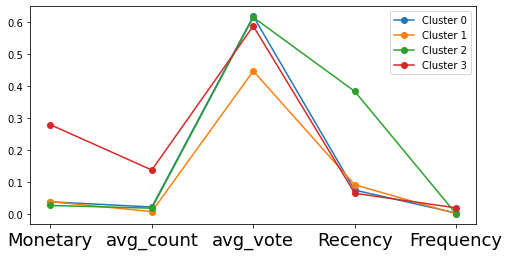

In [38]:
plt.figure(figsize=(8, 4))
for i in range(0, len(kmeans.cluster_centers_)):
    plt.plot(kmeans.cluster_centers_[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(companies_df_copy.columns)), companies_df_copy.columns, fontsize=18)
plt.legend(fontsize=10)
plt.show()

In [39]:
companies_df['K-Means_Labels'] = kmeans.labels_

In [40]:
companies_df.head()

companies      Monetary  ...  Frequency  K-Means_Labels
0    Pixar Animation Studios  1.486667e+08  ...         18               3
1           TriStar Pictures  2.657033e+07  ...        136               0
2               Teitler Film  6.500000e+07  ...          2               3
3  Interscope Communications  2.035158e+07  ...         19               1
4               Warner Bros.  4.202192e+07  ...        474               3

[5 rows x 7 columns]

In [41]:
companies_dic = companies_df[['companies','K-Means_Labels']].set_index('companies').to_dict()

In [42]:
df['labels'] = df['production_companies'].apply(lambda values: list(map(lambda x: companies_dic['K-Means_Labels'][x], values)))

In [43]:
for label in range(len(kmeans.cluster_centers_)):
  df['companies_label_'+str(label)] = df['labels'].apply(
      lambda values: int(label in values)
  )

In [44]:
df = df.drop(['labels','production_companies'],axis=1)

### **Encoding writer by Clustering:**

In [45]:
df['writer'] = df['writer'].apply(ast.literal_eval).values.tolist()
s = df.apply(lambda x: pd.Series(x['writer']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'writers'

In [46]:
writ_df = df.drop('writer', axis=1).join(s).reset_index().drop('index', axis=1)

In [47]:
writ_df = writ_df[~writ_df['writers'].isnull()]

In [48]:
writ_df.shape, df.shape

((15106, 67), (8856, 67))

In [49]:
writer_df = writ_df[['writers']].drop_duplicates()

In [50]:
writer_df.shape

(8560, 1)

Extract RFM features from describing writer profile:

In [51]:
max_year = writ_df.year.max()
writer_df['Lastyear'] = writ_df.groupby('writers')['year'].transform('max').astype('int')
writer_df['Monetary'] = writ_df.groupby('writers')['budget_tmdb'].transform('mean')
writer_df['avg_count'] = writ_df.groupby('writers')['vote_count'].transform('mean')
writer_df['avg_vote'] = writ_df.groupby('writers')['vote_average'].transform('mean')
writer_df['Recency'] = pd.Series(max_year - writer_df['Lastyear'])
writer_df['Frequency'] = writ_df.groupby('writers')['id'].transform('count')
writer_df = writer_df.drop('Lastyear', axis=1)

In [52]:
writer_df.head()

writers      Monetary    avg_count  avg_vote  Recency  Frequency
0        John Lasseter  1.157143e+08  3295.000000  6.785714        4          7
1          Pete Docter  1.275000e+08  5950.500000  7.666667        2          6
2   Jonathan Hensleigh  6.828571e+07  1312.714286  6.414286        6          7
3          Greg Taylor  3.850000e+07  1230.000000  6.300000       21          2
4  Mark Steven Johnson  4.800000e+07   640.900000  5.470000       10         10

In [53]:
writer_df_copy = writer_df.copy()
writer_df_copy = writer_df_copy.drop('writers', axis=1)

Normalization by Min-Max:

In [54]:
scaler_m = MinMaxScaler()
X_m = scaler_m.fit_transform(writer_df_copy.values)
X_m[:5]

array([[0.44505494, 0.32897234, 0.64285714, 0.03921569, 0.15      ],
       [0.49038461, 0.59417757, 0.74074074, 0.01960784, 0.125     ],
       [0.26263736, 0.13100113, 0.6015873 , 0.05882353, 0.15      ],
       [0.14807692, 0.12274044, 0.58888889, 0.20588235, 0.025     ],
       [0.18461538, 0.06390692, 0.49666667, 0.09803922, 0.225     ]])

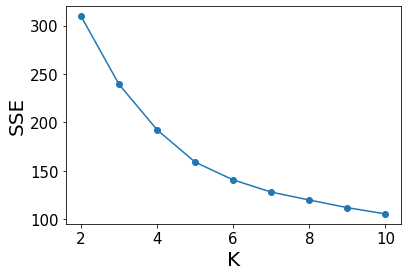

In [55]:
sse_list = list()
max_k = 10
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters = k, n_init=10, max_iter=100, random_state=0)
    kmeans.fit(X_m)
    
    sse = kmeans.inertia_
    sse_list.append(sse)
    
plt.plot(range(2, len(sse_list) + 2), sse_list,'-o')
plt.ylabel('SSE', fontsize=20)
plt.xlabel('K', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [56]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=100, random_state=0)
kmeans.fit(X_m)

KMeans(max_iter=100, n_clusters=5, random_state=0)

In [57]:
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 793, 1: 3626, 2: 451, 3: 1644, 4: 2046}

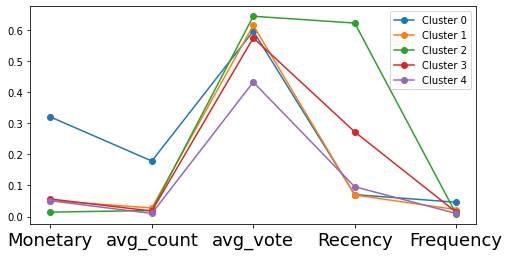

In [58]:
plt.figure(figsize=(8, 4))
for i in range(0, len(kmeans.cluster_centers_)):
    plt.plot(kmeans.cluster_centers_[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(writer_df_copy.columns)), writer_df_copy.columns, fontsize=18)
plt.legend(fontsize=10)
plt.show()

In [59]:
writer_df['K-Means_Labels'] = kmeans.labels_

In [60]:
writer_df.head()

writers      Monetary  ...  Frequency  K-Means_Labels
0        John Lasseter  1.157143e+08  ...          7               0
1          Pete Docter  1.275000e+08  ...          6               0
2   Jonathan Hensleigh  6.828571e+07  ...          7               0
3          Greg Taylor  3.850000e+07  ...          2               3
4  Mark Steven Johnson  4.800000e+07  ...         10               4

[5 rows x 7 columns]

In [61]:
writer_dic = writer_df[['writers','K-Means_Labels']].set_index('writers').to_dict()

In [62]:
df['labels'] = df['writer'].apply(lambda values: list(map(lambda x: writer_dic['K-Means_Labels'][x], values)))

In [63]:
for label in range(len(kmeans.cluster_centers_)):
  df['writer_label_'+str(label)] = df['labels'].apply(
      lambda values: int(label in values)
  )

In [64]:
df = df.drop(['labels','writer'],axis=1)

### **Encoding director by Clustering:**

In [65]:
s = df.apply(lambda x: pd.Series(x['director_tmdb']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'directors'

In [66]:
dir_df = df.drop('director_tmdb', axis=1).join(s).reset_index().drop('index', axis=1)

In [67]:
dir_df = dir_df[~dir_df['directors'].isnull()]

In [68]:
dir_df.shape, df.shape

((8856, 71), (8856, 71))

In [69]:
director_df = dir_df[['directors']].drop_duplicates()

In [70]:
director_df.shape

(4065, 1)

Extract RFM features from describing director profile:

In [71]:
max_year = dir_df.year.max()
director_df['Lastyear'] = dir_df.groupby('directors')['year'].transform('max').astype('int')
director_df['Monetary'] = dir_df.groupby('directors')['budget_tmdb'].transform('mean')
director_df['avg_count'] = dir_df.groupby('directors')['vote_count'].transform('mean')
director_df['avg_vote'] = dir_df.groupby('directors')['vote_average'].transform('mean')
director_df['Recency'] = pd.Series(max_year - director_df['Lastyear'])
director_df['Frequency'] = dir_df.groupby('directors')['id'].transform('count')
director_df = director_df.drop('Lastyear', axis=1)

In [72]:
director_df.head()

directors      Monetary    avg_count  avg_vote  Recency  Frequency
0    John Lasseter  1.120000e+08  3557.400000  6.840000        6          5
1     Joe Johnston  7.488889e+07  1559.666667  6.355556        6          9
2    Howard Deutch  2.657143e+07   183.428571  6.014286        9          7
3  Forest Whitaker  2.533333e+07    97.333333  5.766667       13          3
4    Charles Shyer  3.420000e+07   101.600000  5.500000       13          5

In [73]:
director_df_copy = director_df.copy()
director_df_copy = director_df_copy.drop('directors', axis=1)

Normalization by Min-Max:

In [74]:
scaler_m = MinMaxScaler()
X_m = scaler_m.fit_transform(director_df_copy.values)
X_m[:5]

array([[0.54634146, 0.31079262, 0.64888889, 0.05882353, 0.1       ],
       [0.36531165, 0.13621137, 0.59506173, 0.05882353, 0.2       ],
       [0.12961672, 0.01594237, 0.55714286, 0.08823529, 0.15      ],
       [0.12357723, 0.00841854, 0.52962963, 0.12745098, 0.05      ],
       [0.16682926, 0.0087914 , 0.5       , 0.12745098, 0.1       ]])

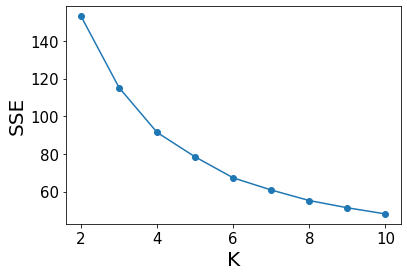

In [75]:
sse_list = list()
max_k = 10
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters = k, n_init=10, max_iter=100, random_state=0)
    kmeans.fit(X_m)
    
    sse = kmeans.inertia_
    sse_list.append(sse)
    
plt.plot(range(2, len(sse_list) + 2), sse_list,'-o')
plt.ylabel('SSE', fontsize=20)
plt.xlabel('K', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [76]:
kmeans = KMeans(n_clusters=4, n_init=10, max_iter=100, random_state=0)
kmeans.fit(X_m)

KMeans(max_iter=100, n_clusters=4, random_state=0)

In [77]:
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 1270, 1: 399, 2: 2067, 3: 329}

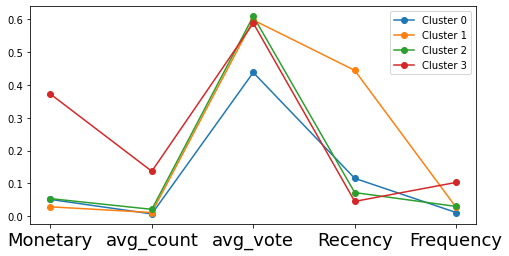

In [78]:
plt.figure(figsize=(8, 4))
for i in range(0, len(kmeans.cluster_centers_)):
    plt.plot(kmeans.cluster_centers_[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(director_df_copy.columns)), director_df_copy.columns, fontsize=18)
plt.legend(fontsize=10)
plt.show()

In [79]:
director_df['K-Means_Labels'] = kmeans.labels_

In [80]:
director_df.head()

directors      Monetary  ...  Frequency  K-Means_Labels
0    John Lasseter  1.120000e+08  ...          5               3
1     Joe Johnston  7.488889e+07  ...          9               3
2    Howard Deutch  2.657143e+07  ...          7               2
3  Forest Whitaker  2.533333e+07  ...          3               2
4    Charles Shyer  3.420000e+07  ...          5               0

[5 rows x 7 columns]

In [81]:
director_dic = director_df[['directors','K-Means_Labels']].set_index('directors').to_dict()

In [82]:
df['labels'] = df['director_tmdb'].apply(lambda value: director_dic['K-Means_Labels'][value])

In [83]:
for label in range(len(kmeans.cluster_centers_)):
  df['director_label_'+str(label)] = df['labels'].apply(
      lambda value: int(label == value)
  )

In [84]:
#df['director_freq'] = df['director_tmdb'].apply(lambda x: director_df[director_df['directors']==x]['Frequency'].values).astype('int')
#df['director_budget'] = df['director_tmdb'].apply(lambda x: director_df[director_df['directors']==x]['Monetary'].values).astype('float')
#df['director_recency'] = df['director_tmdb'].apply(lambda x: director_df[director_df['directors']==x]['Recency'].values).astype('int')

In [85]:
df = df.drop(['labels','director_tmdb'],axis=1)

### **Encoding actors by Clustering:**

In [86]:
df['actors_tmdb'] = df['actors_tmdb'].apply(ast.literal_eval).values.tolist()
s = df.apply(lambda x: pd.Series(x['actors_tmdb']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'actors'

In [87]:
act_df = df.drop('actors_tmdb', axis=1).join(s).reset_index().drop('index', axis=1)

In [88]:
act_df = act_df[~act_df['actors'].isnull()]

In [89]:
act_df.shape, df.shape

((26531, 74), (8856, 74))

In [90]:
actor_df = act_df[['actors']].drop_duplicates()

In [91]:
actor_df.shape

(9963, 1)

Extract RFM features from describing actor profile:

In [92]:
max_year = act_df.year.max()
actor_df['Lastyear'] = act_df.groupby('actors')['year'].transform('max').astype('int')
actor_df['Monetary'] = act_df.groupby('actors')['budget_tmdb'].transform('mean')
actor_df['avg_count'] = act_df.groupby('actors')['vote_count'].transform('mean')
actor_df['avg_vote'] = act_df.groupby('actors')['vote_average'].transform('mean')
actor_df['Recency'] = pd.Series(max_year - actor_df['Lastyear'])
actor_df['Frequency'] = act_df.groupby('actors')['id'].transform('count')
actor_df = actor_df.drop('Lastyear', axis=1)

In [93]:
actor_df.head()

actors      Monetary    avg_count  avg_vote  Recency  Frequency
0       Tom Hanks  5.352381e+07  1738.785714  6.652381        0         42
1       Tim Allen  4.535294e+07   980.647059  5.888235        4         17
2     Don Rickles  1.700000e+07  2803.000000  7.450000       22          2
3  Robin Williams  3.845854e+07   667.951220  6.219512        4         41
4   Jonathan Hyde  6.500000e+07  2413.000000  6.900000       22          1

In [94]:
actor_df_copy = actor_df.copy()
actor_df_copy = actor_df_copy.drop('actors', axis=1)

Normalization by Min-Max:

In [95]:
scaler_m = MinMaxScaler()
X_m = scaler_m.fit_transform(actor_df_copy.values)
X_m[:5]

array([[0.2058608 , 0.15186452, 0.62804233, 0.        , 0.66129032],
       [0.17443439, 0.08561103, 0.54313725, 0.03921569, 0.25806452],
       [0.06538461, 0.24486586, 0.71666667, 0.21568627, 0.01612903],
       [0.14791745, 0.05828465, 0.5799458 , 0.03921569, 0.64516129],
       [0.25      , 0.21078389, 0.65555556, 0.21568627, 0.        ]])

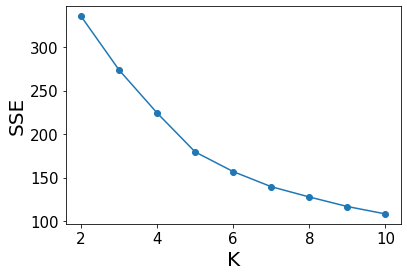

In [96]:
sse_list = list()
max_k = 10
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters = k, n_init=10, max_iter=100, random_state=0)
    kmeans.fit(X_m)
    
    sse = kmeans.inertia_
    sse_list.append(sse)
    
plt.plot(range(2, len(sse_list) + 2), sse_list,'-o')
plt.ylabel('SSE', fontsize=20)
plt.xlabel('K', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [97]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=100, random_state=0)
kmeans.fit(X_m)

KMeans(max_iter=100, n_clusters=5, random_state=0)

In [98]:
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 4065, 1: 2576, 2: 934, 3: 593, 4: 1795}

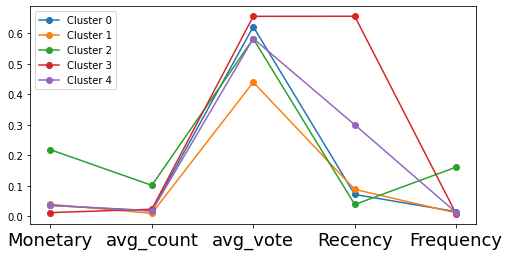

In [99]:
plt.figure(figsize=(8, 4))
for i in range(0, len(kmeans.cluster_centers_)):
    plt.plot(kmeans.cluster_centers_[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(actor_df_copy.columns)), actor_df_copy.columns, fontsize=18)
plt.legend(fontsize=10)
plt.show()

In [100]:
actor_df['K-Means_Labels'] = kmeans.labels_

In [101]:
actor_df.head()

actors      Monetary  ...  Frequency  K-Means_Labels
0       Tom Hanks  5.352381e+07  ...         42               2
1       Tim Allen  4.535294e+07  ...         17               2
2     Don Rickles  1.700000e+07  ...          2               4
3  Robin Williams  3.845854e+07  ...         41               2
4   Jonathan Hyde  6.500000e+07  ...          1               2

[5 rows x 7 columns]

In [102]:
actor_dic = actor_df[['actors','K-Means_Labels']].set_index('actors').to_dict()

In [103]:
df['labels'] = df['actors_tmdb'].apply(lambda values: list(map(lambda x: actor_dic['K-Means_Labels'][x], values)))

In [104]:
for label in range(len(kmeans.cluster_centers_)):
  df['actor_label_'+str(label)] = df['labels'].apply(
      lambda values: int(label in values)
  )

In [105]:
df = df.drop(['labels','actors_tmdb'],axis=1)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8856 entries, 0 to 8855
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   belongs_to_collection     8856 non-null   int64  
 1   budget_tmdb               8856 non-null   float64
 2   id                        8856 non-null   int64  
 3   overview                  8852 non-null   object 
 4   popularity                8856 non-null   float64
 5   revenue                   8856 non-null   float64
 6   runtime                   8856 non-null   float64
 7   tagline                   6709 non-null   object 
 8   title_tmdb                8856 non-null   object 
 9   vote_average              8856 non-null   float64
 10  vote_count                8856 non-null   float64
 11  avg_vote                  8856 non-null   float64
 12  votes                     8856 non-null   float64
 13  keywords                  8856 non-null   object 
 14  year    

<a id='dr'></a>
## B. DummyRegressor ([to top](#top))

In [107]:
df.to_csv('/content/drive/MyDrive/BDA/input/df.csv', index=False)

In [108]:
df = pd.read_csv('/content/drive/MyDrive/BDA/input/df.csv', keep_default_na=False)

In [109]:
return_df = df[df.columns.difference(['overview', 'tagline', 'title_tmdb','keywords', 'id', 'avg_vote', 'votes'])]

In [110]:
return_df.to_csv('/content/drive/MyDrive/BDA/input/return_df.csv', index=False)

In [111]:
return_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8856 entries, 0 to 8855
Data columns (total 71 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Australia                 8856 non-null   int64  
 1   Canada                    8856 non-null   int64  
 2   China                     8856 non-null   int64  
 3   France                    8856 non-null   int64  
 4   Germany                   8856 non-null   int64  
 5   Hong Kong                 8856 non-null   int64  
 6   India                     8856 non-null   int64  
 7   Italy                     8856 non-null   int64  
 8   Japan                     8856 non-null   int64  
 9   N_spoken_languages        8856 non-null   int64  
 10  Russia                    8856 non-null   int64  
 11  South Korea               8856 non-null   int64  
 12  Spain                     8856 non-null   int64  
 13  United Kingdom            8856 non-null   int64  
 14  United S

In [112]:
X, y = return_df.drop(['revenue', 'return', 'return_log'], axis=1), return_df['return_log']

In [113]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.2, test_size=0.8, random_state=0)

In [114]:
dummy = DummyRegressor(strategy='mean')
dummy.fit(train_X, train_y)
scores = dummy.score(test_X, test_y)
print('r2_score for DummyRegressor: %.3f (%.3f)' % (mean(scores), std(scores)))

r2_score for DummyRegressor: -0.000 (0.000)


In [115]:
dummy = DummyRegressor(strategy='median')
dummy.fit(train_X, train_y)
scores = dummy.score(test_X, test_y)
print('r2_score for DummyRegressor: %.3f (%.3f)' % (mean(scores), std(scores)))

r2_score for DummyRegressor: -0.030 (0.000)


<a id='dtr'></a>
## C. DecisionTreeRegressor ([to top](#top))

In [ ]:
X, y = return_df.drop(['revenue', 'return', 'return_log'], axis=1), return_df['return_log']

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.2, test_size=0.8, random_state=0)

In [ ]:
X.shape, train_X.shape

((8856, 68), (1771, 68))

In [ ]:
# get a list of models to evaluate
def get_models():
 models = dict()
 for i in range(2, train_X.shape[1], 4):
  rfe = RFE(estimator=DecisionTreeRegressor(random_state = 0), n_features_to_select=i)
  model = DecisionTreeRegressor(random_state = 0)
  models[str(i)] = Pipeline(steps=[('s', rfe), ('m', model)])
 return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
 scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
 return scores

2 -0.338 (0.238)
6 -0.234 (0.266)
10 -0.230 (0.165)
14 -0.240 (0.186)
18 -0.240 (0.184)
22 -0.237 (0.194)
26 -0.258 (0.168)
30 -0.249 (0.167)
34 -0.260 (0.225)
38 -0.235 (0.187)
42 -0.262 (0.203)
46 -0.224 (0.186)
50 -0.229 (0.199)
54 -0.312 (0.246)
58 -0.258 (0.196)
62 -0.282 (0.239)
66 -0.261 (0.194)


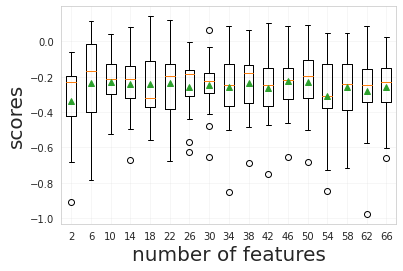

In [ ]:
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, train_X, train_y)
 results.append(scores)
 names.append(name)
 print('%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.xlabel('number of features', fontsize=20)
plt.ylabel('scores', fontsize=20)
plt.grid(alpha=0.2)
plt.show()

In [ ]:
# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(random_state = 0), n_features_to_select=46)
# let's create a pipeline
model = DecisionTreeRegressor(random_state = 0)
# create a pipeline
pipeline = Pipeline(steps=[('s', rfe), ('m', model)])

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=0)
# evaluate model
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
n_scores = cross_val_score(model, train_X, train_y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('r2_score for cv: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

r2_score for cv: -0.209 (0.093)


In [ ]:
pipeline.fit(train_X, train_y)
scores = pipeline.score(test_X, test_y)
# report performance
print('r2_score for testset: %.3f (%.3f)' % (mean(scores), std(scores)))

r2_score for testset: -0.089 (0.000)


In [ ]:
# summarize all features
for i in range(train_X.shape[1]):
 print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 11.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 15.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 9.000
Column: 8, Selected False, Rank: 16.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected False, Rank: 18.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected True, Rank: 1.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected True, Rank: 1.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected True, Rank: 1.000
Column: 23, Selected True, Rank: 1.000
Column: 24, Selected False, Rank: 4.000
Column: 25, Selected True

In [ ]:
train_X, test_X = train_X.loc[:, rfe.support_], test_X.loc[:, rfe.support_]

In [ ]:
params = {'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
          'splitter' : ['best', 'random'],
          'max_depth' : [2, 5, 10, 15, 20, 25, None],
          'min_samples_split' : [100, 150, 200],
          'min_samples_leaf': [2, 5, 10, 15, 20, 25]}

grid_search_cv = GridSearchCV(DecisionTreeRegressor(random_state=0),params,verbose=1,cv=5,scoring='r2',n_jobs=-1)
grid_search_cv.fit(train_X,train_y)

Fitting 5 folds for each of 1008 candidates, totalling 5040 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 5, 10, 15, 20, 25, None],
                         'min_samples_leaf': [2, 5, 10, 15, 20, 25],
                         'min_samples_split': [100, 150, 200],
                         'splitter': ['best', 'random']},
             scoring='r2', verbose=1)

In [ ]:
grid_search_cv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 15,
 'min_samples_leaf': 10,
 'min_samples_split': 150,
 'splitter': 'best'}

In [ ]:
grid_search_cv.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=15,
                      min_samples_leaf=10, min_samples_split=150,
                      random_state=0)

In [ ]:
print("Train RMSE : {:.4f}".format(np.sqrt(mean_squared_error(train_y, grid_search_cv.best_estimator_.predict(train_X)))))
print("Train MAE : {:.4f}".format(mean_absolute_error(train_y, grid_search_cv.best_estimator_.predict(train_X))))
print("Train R2 score:", grid_search_cv.best_estimator_.score(train_X, train_y))
print("Test RMSE : {:.4f}".format(np.sqrt(mean_squared_error(test_y, grid_search_cv.best_estimator_.predict(test_X)))))
print("Test MAE : {:.4f}".format(mean_absolute_error(test_y, grid_search_cv.best_estimator_.predict(test_X))))
print("Test R2 score:", grid_search_cv.best_estimator_.score(test_X, test_y))

Train RMSE : 1.8264
Train MAE : 1.2265
Train R2 score: 0.42678871910784744
Test RMSE : 1.9908
Test MAE : 1.3494
Test R2 score: 0.3725415089227174


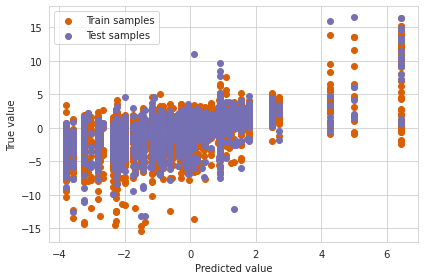

In [ ]:
train_predictions = grid_search_cv.best_estimator_.predict(train_X)
test_predictions = grid_search_cv.best_estimator_.predict(test_X)
plt.scatter(train_predictions, train_y, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, test_y, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.tight_layout()
plt.show()

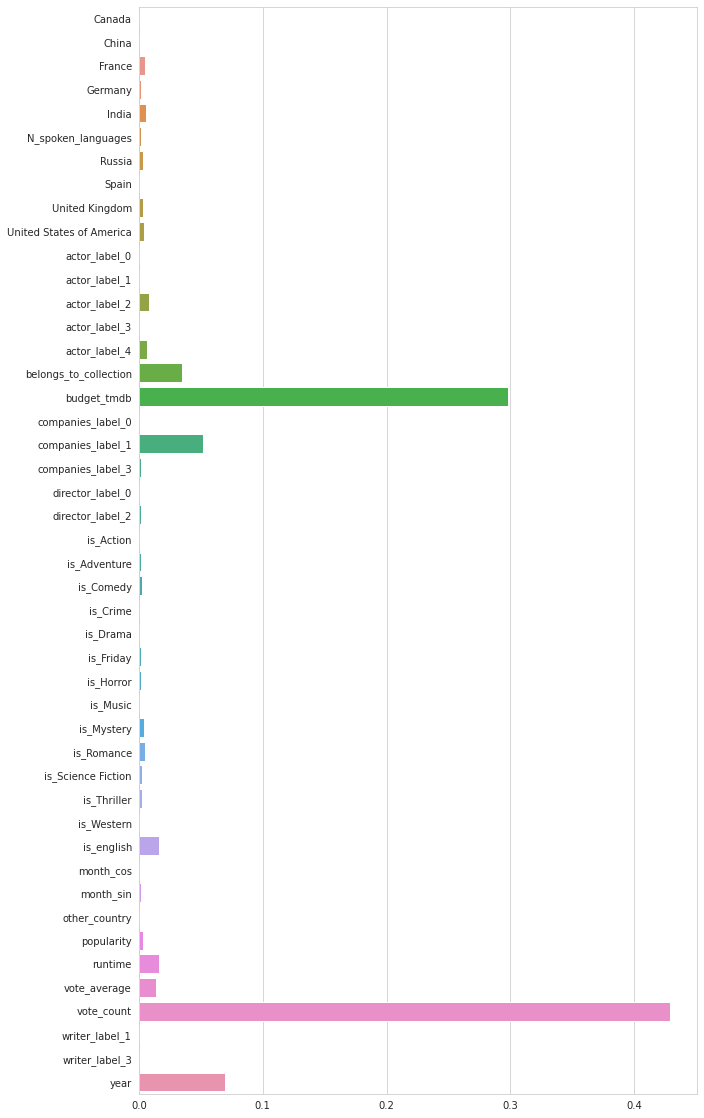

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,20))
sns.barplot(x=grid_search_cv.best_estimator_.feature_importances_, y=train_X.columns)

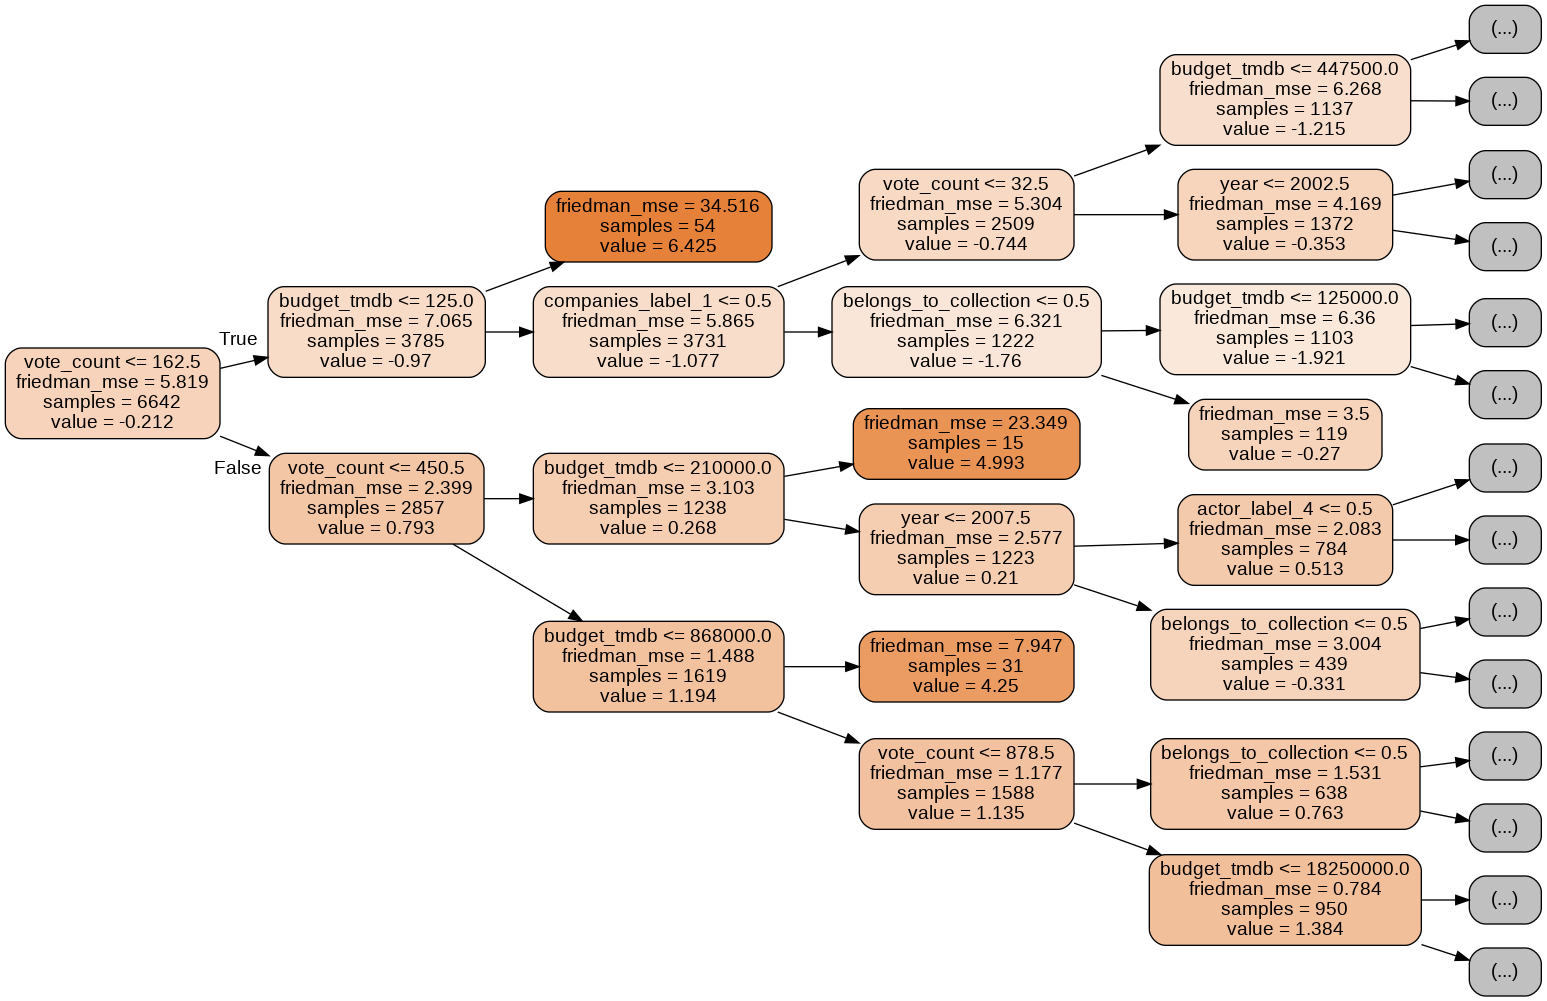

In [ ]:
# visualize the actual decision tree obtained 
dot_data = export_graphviz(grid_search_cv.best_estimator_,
               out_file=None,
               max_depth=4, 
               feature_names=list(train_X.columns),  
               filled=True,
               rotate=True,
               rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

<a id='mlpr'></a>
## D. MLPRegressor ([to top](#top))

In [ ]:
X, y = return_df.drop(['revenue', 'return', 'return_log'], axis=1), return_df['return_log']
data = X
data.insert(len(data.columns), 'return_log', y)
data.columns, data.shape

(Index(['Australia', 'Canada', 'China', 'France', 'Germany', 'Hong Kong',
        'India', 'Italy', 'Japan', 'N_spoken_languages', 'Russia',
        'South Korea', 'Spain', 'United Kingdom', 'United States of America',
        'actor_label_0', 'actor_label_1', 'actor_label_2', 'actor_label_3',
        'actor_label_4', 'belongs_to_collection', 'budget_tmdb',
        'companies_label_0', 'companies_label_1', 'companies_label_2',
        'companies_label_3', 'director_label_0', 'director_label_1',
        'director_label_2', 'director_label_3', 'is_Action', 'is_Adventure',
        'is_Animation', 'is_Biography', 'is_Comedy', 'is_Crime',
        'is_Documentary', 'is_Drama', 'is_Family', 'is_Fantasy', 'is_Foreign',
        'is_Friday', 'is_History', 'is_Horror', 'is_Music', 'is_Musical',
        'is_Mystery', 'is_Romance', 'is_Science Fiction', 'is_Sport',
        'is_TV Movie', 'is_Thriller', 'is_War', 'is_Western', 'is_english',
        'month_cos', 'month_sin', 'other_country', 'popular

In [ ]:
scaler_m = MinMaxScaler()
data_m = scaler_m.fit_transform(data.values)
X_m = data_m[:, 0:len(data.columns)-1]
y_m = data_m[:,len(data.columns)-1]

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X_m, y_m, train_size=0.75, test_size=0.25, random_state=0)
model = MLPRegressor(random_state = 0, early_stopping=True, max_iter=1000)

In [ ]:
# evaluate model
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
n_scores = cross_val_score(model, train_X, train_y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('r2_score for cv: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

r2_score for cv: -0.010 (0.036)


In [ ]:
model.fit(train_X, train_y)
scores = model.score(test_X, test_y)
# report performance
print('r2_score for testset: %.3f (%.3f)' % (mean(scores), std(scores)))

r2_score for testset: -0.029 (0.000)


In [ ]:
params = {"hidden_layer_sizes": [(1,),(2,),(3,)],
          "activation": ["identity", "logistic", "tanh", "relu"],
          "solver": ["lbfgs", "sgd", "adam"],
          "alpha": [0.001,0.005,0.01]}

grid_search_cv = GridSearchCV(model,params,verbose=1,cv=5,scoring='r2',n_jobs=-1)
grid_search_cv.fit(train_X,train_y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=MLPRegressor(early_stopping=True, max_iter=1000,
                                    random_state=0),
             n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.001, 0.005, 0.01],
                         'hidden_layer_sizes': [(1,), (2,), (3,)],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='r2', verbose=1)

In [ ]:
grid_search_cv.best_params_

{'activation': 'tanh',
 'alpha': 0.001,
 'hidden_layer_sizes': (3,),
 'solver': 'adam'}

In [ ]:
grid_search_cv.best_estimator_

MLPRegressor(activation='tanh', alpha=0.001, early_stopping=True,
             hidden_layer_sizes=(3,), max_iter=1000, random_state=0)

In [ ]:
np.column_stack([train_X, train_y])[:,-1]

array([0.40782467, 0.4958304 , 0.46781753, ..., 0.53466118, 0.28325069,
       0.4428017 ])

In [ ]:
train_y

array([0.40782467, 0.4958304 , 0.46781753, ..., 0.53466118, 0.28325069,
       0.4428017 ])

In [ ]:
print("Train RMSE : {:.4f}".format(np.sqrt(mean_squared_error(scaler_m.inverse_transform(np.column_stack([train_X, train_y]))[:,-1],
                                           scaler_m.inverse_transform(np.column_stack([train_X,grid_search_cv.best_estimator_.predict(train_X)]))[:,-1]))))
print("Train MAE : {:.4f}".format(mean_absolute_error(scaler_m.inverse_transform(np.column_stack([train_X, train_y]))[:,-1],
                                                      scaler_m.inverse_transform(np.column_stack([train_X,grid_search_cv.best_estimator_.predict(train_X)]))[:,-1])))
print("Train R2 score:", grid_search_cv.best_estimator_.score(train_X, train_y))
print("Test RMSE : {:.4f}".format(np.sqrt(mean_squared_error(scaler_m.inverse_transform(np.column_stack([test_X, test_y]))[:,-1],
                                           scaler_m.inverse_transform(np.column_stack([test_X,grid_search_cv.best_estimator_.predict(test_X)]))[:,-1]))))
print("Test MAE : {:.4f}".format(mean_absolute_error(scaler_m.inverse_transform(np.column_stack([test_X, test_y]))[:,-1],
                                                      scaler_m.inverse_transform(np.column_stack([test_X,grid_search_cv.best_estimator_.predict(test_X)]))[:,-1])))
print("Test R2 score:", grid_search_cv.best_estimator_.score(test_X, test_y))

Train RMSE : 2.1109
Train MAE : 1.4155
Train R2 score: 0.2342896492271762
Test RMSE : 2.2880
Test MAE : 1.4836
Test R2 score: 0.17119145902606325


In [ ]:
train_predictions = scaler_m.inverse_transform(np.column_stack([train_X,grid_search_cv.best_estimator_.predict(train_X)]))[:,-1]
test_predictions = scaler_m.inverse_transform(np.column_stack([test_X,grid_search_cv.best_estimator_.predict(test_X)]))[:,-1]
plt.scatter(train_predictions, train_y, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, test_y, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.tight_layout()
plt.show()

<a id='cnn-svr'></a>
## E. CNN-SVR/XGBoost ([to top](#top))

In [ ]:
X, y = return_df.drop(['revenue', 'return', 'return_log'], axis=1), return_df['return_log']

In [ ]:
data = X
data.insert(len(data.columns), 'return_log', y)
data.columns, data.shape

(Index(['Australia', 'Canada', 'China', 'France', 'Germany', 'Hong Kong',
        'India', 'Italy', 'Japan', 'N_spoken_languages', 'Russia',
        'South Korea', 'Spain', 'United Kingdom', 'United States of America',
        'actor_label_0', 'actor_label_1', 'actor_label_2', 'actor_label_3',
        'actor_label_4', 'belongs_to_collection', 'budget_tmdb',
        'companies_label_0', 'companies_label_1', 'companies_label_2',
        'companies_label_3', 'director_label_0', 'director_label_1',
        'director_label_2', 'director_label_3', 'is_Action', 'is_Adventure',
        'is_Animation', 'is_Biography', 'is_Comedy', 'is_Crime',
        'is_Documentary', 'is_Drama', 'is_Family', 'is_Fantasy', 'is_Foreign',
        'is_Friday', 'is_History', 'is_Horror', 'is_Music', 'is_Musical',
        'is_Mystery', 'is_Romance', 'is_Science Fiction', 'is_Sport',
        'is_TV Movie', 'is_Thriller', 'is_War', 'is_Western', 'is_english',
        'month_cos', 'month_sin', 'other_country', 'popular

In [ ]:
scaler_m = MinMaxScaler()
data_m = scaler_m.fit_transform(data.values)
X_m = data_m[:, 0:len(data.columns)-1]
y_m = data_m[:,len(data.columns)-1]

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X_m, y_m, train_size=0.75, test_size=0.25, random_state=0)
train_X.shape, test_X.shape

((6642, 68), (2214, 68))

In [ ]:
x_train = np.expand_dims(train_X, axis=2)
x_test = np.expand_dims(test_X, axis=2)
x_train.shape, x_test.shape

((6642, 68, 1), (2214, 68, 1))

In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, BatchNormalization, MaxPooling1D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import model_from_json
from tensorflow.keras import backend as K
tf.random.set_seed(42)

def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

model = Sequential()
model.add(Conv1D(128, (5), dilation_rate=3, input_shape=(train_X.shape[1],1), activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64, activation='relu', name='output_2'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear', name='output_1'))

model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=[r2_keras])

model.summary()

history = model.fit(x_train, train_y,
          batch_size=32,
          epochs=200,
          verbose=2,
          validation_split=0.1)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 56, 128)           768       
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 28, 128)           0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 28, 128)           0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 28, 128)           512       
_________________________________________________________________
flatten_9 (Flatten)          (None, 3584)              0         
_________________________________________________________________
output_2 (Dense)             (None, 64)                229440    
_________________________________________________________________
dropout_19 (Dropout)         (None, 64)               

In [ ]:
train_predictions = scaler_m.inverse_transform(np.column_stack([train_X,np.squeeze(model.predict(x_train))]))[:,-1]
test_predictions = scaler_m.inverse_transform(np.column_stack([test_X,np.squeeze(model.predict(x_test))]))[:,-1]
print("Train RMSE : {:.4f}".format(np.sqrt(mean_squared_error(train_y, train_predictions))))
print("Train MAE : {:.4f}".format(mean_absolute_error(train_y, train_predictions)))
print("Train R2 score : {:.4f}".format(model.evaluate(x_train, train_y, verbose=0)[1]))
print("Test RMSE : {:.4f}".format(np.sqrt(mean_squared_error(test_y, test_predictions))))
print("Test MAE : {:.4f}".format(mean_absolute_error(test_y, test_predictions)))
print("Test R2 score : {:.4f}".format(model.evaluate(x_test, test_y, verbose=0)[1]))

Train RMSE : 1.4894
Train MAE : 1.0878
Train R2 score : 0.5464
Test RMSE : 1.3930
Test MAE : 1.0722
Test R2 score : 0.2322


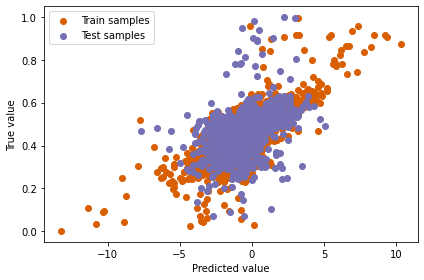

In [ ]:
plt.scatter(train_predictions, train_y, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, test_y, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import Model

m1 = Model(inputs=model.input, outputs=model.get_layer('output_1').output)
m2 = Model(inputs=model.input, outputs=model.get_layer('output_2').output)

In [ ]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(m2.predict(x_train), train_y)
scores = svr.score(m2.predict(x_test),test_y)
print('R2 score for CNN-SVC-2: %.3f (%.3f)' % (mean(scores), std(scores)))

R2 score for CNN-SVC-2: 0.136 (0.000)


In [ ]:
svr = SVR()
svr.fit(m1.predict(x_train), train_y)
scores = svr.score(m1.predict(x_test),test_y)
print('R2 score for CNN-SVC-1: %.3f (%.3f)' % (mean(scores), std(scores)))

R2 score for CNN-SVC-1: 0.154 (0.000)


In [ ]:
xb = xgb.XGBRegressor(random_state=0)
xb.fit(m1.predict(x_train), train_y)
scores = xb.score(m1.predict(x_test),test_y)
print('R2 score for CNN-XGBoost-1: %.3f (%.3f)' % (mean(scores), std(scores)))

[15:14:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score for CNN-XGBoost-1: 0.210 (0.000)


In [ ]:
import xgboost as xgb

xb = xgb.XGBRegressor(random_state=0)
xb.fit(m2.predict(x_train), train_y)
scores = xb.score(m2.predict(x_test),test_y)
print('R2 score for CNN-XGBoost-2: %.3f (%.3f)' % (mean(scores), std(scores)))

[15:14:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score for CNN-XGBoost-2: 0.241 (0.000)


**CNN-XGBoost-2 :**

In [ ]:
train_predictions = scaler_m.inverse_transform(np.column_stack([train_X,xb.predict(m2.predict(x_train))]))[:,-1]
test_predictions = scaler_m.inverse_transform(np.column_stack([test_X,xb.predict(m2.predict(x_test))]))[:,-1]
print("Train RMSE : {:.4f}".format(np.sqrt(mean_squared_error(train_y, train_predictions))))
print("Train MAE : {:.4f}".format(mean_absolute_error(train_y, train_predictions)))
print("Train R2 score : {:.4f}".format(xb.score(m2.predict(x_train), train_y)))
print("Test RMSE : {:.4f}".format(np.sqrt(mean_squared_error(test_y, test_predictions))))
print("Test MAE : {:.4f}".format(mean_absolute_error(test_y, test_predictions)))
print("Test R2 score : {:.4f}".format(xb.score(m2.predict(x_test), test_y)))

Train RMSE : 1.8935
Train MAE : 1.3323
Train R2 score : 0.6529
Test RMSE : 1.7276
Test MAE : 1.2938
Test R2 score : 0.2413


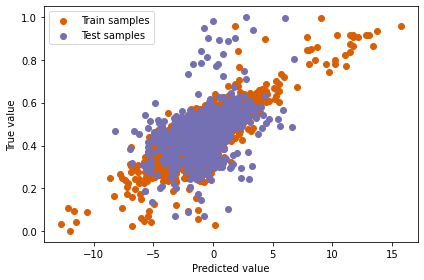

In [ ]:
plt.scatter(train_predictions, train_y, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, test_y, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.tight_layout()
plt.show()

<a id='rfr'></a>
## F. RandomForestRegressor ([to top](#top))

In [ ]:
X, y = return_df.drop(['revenue', 'return', 'return_log'], axis=1), return_df['return_log']

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.2, test_size=0.8, random_state=0)

In [ ]:
X.shape, train_X.shape

((8856, 68), (1771, 68))

In [ ]:
# get a list of models to evaluate
def get_models():
 models = dict()
 for i in range(2, train_X.shape[1], 4):
  rfe = RFE(estimator=RandomForestRegressor(random_state = 0), n_features_to_select=i)
  model = RandomForestRegressor(random_state = 0)
  models[str(i)] = Pipeline(steps=[('s', rfe), ('m', model)])
 return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
 scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
 return scores

2 0.180 (0.091)
6 0.330 (0.061)
10 0.330 (0.066)
14 0.343 (0.064)
18 0.350 (0.067)
22 0.354 (0.067)
26 0.359 (0.070)
30 0.362 (0.069)
34 0.366 (0.069)
38 0.365 (0.066)
42 0.363 (0.067)
46 0.362 (0.066)
50 0.364 (0.065)
54 0.367 (0.063)
58 0.367 (0.063)
62 0.367 (0.067)
66 0.369 (0.065)


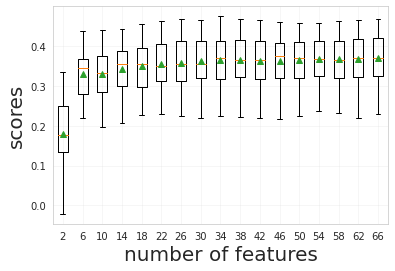

In [ ]:
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, train_X, train_y)
 results.append(scores)
 names.append(name)
 print('%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.xlabel('number of features', fontsize=20)
plt.ylabel('scores', fontsize=20)
plt.grid(alpha=0.2)
plt.show()

In [ ]:
# create pipeline
rfe = RFE(estimator=RandomForestRegressor(random_state = 0), n_features_to_select=34)
# let's create a pipeline
model = RandomForestRegressor(random_state = 0)
# create a pipeline
pipeline = Pipeline(steps=[('s', rfe), ('m', model)])

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=0)
# evaluate model
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
n_scores = cross_val_score(model, train_X, train_y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('r2_score for cv: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

r2_score for cv: 0.408 (0.024)


In [ ]:
pipeline.fit(train_X, train_y)
scores = pipeline.score(test_X, test_y)
# report performance
print('r2_score for testset: %.3f (%.3f)' % (mean(scores), std(scores)))

r2_score for testset: 0.479 (0.000)


In [ ]:
# summarize all features
for i in range(train_X.shape[1]):
 print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 17.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected False, Rank: 29.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 30.000
Column: 6, Selected False, Rank: 18.000
Column: 7, Selected False, Rank: 22.000
Column: 8, Selected False, Rank: 27.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected False, Rank: 7.000
Column: 11, Selected False, Rank: 12.000
Column: 12, Selected False, Rank: 25.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected False, Rank: 16.000
Column: 19, Selected False, Rank: 5.000
Column: 20, Selected True, Rank: 1.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected True, Rank: 1.000
Column: 23, Selected True, Rank: 1.000
Column: 24, Selected False, Rank: 19.000
Column: 25, S

In [ ]:
train_X, test_X = train_X.loc[:, rfe.support_], test_X.loc[:, rfe.support_]

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 400, stop = 600, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5]
#define the model
reg = RandomForestRegressor(random_state = 0)
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
#define the grid search
grid_search_cv = RandomizedSearchCV(estimator = reg, 
                                    param_distributions = random_grid, 
                                    n_iter = 50, 
                                    cv = 5, 
                                    verbose=2, 
                                    random_state=0, 
                                    n_jobs = -1)
#run the grid search
grid_search_cv.fit(train_X, train_y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [400, 500, 600]},
                   random_state=0, verbose=2)

In [ ]:
grid_search_cv.best_params_

{'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 500}

In [ ]:
grid_search_cv.best_estimator_

RandomForestRegressor(min_samples_leaf=5, n_estimators=500, random_state=0)

In [ ]:
print("Train RMSE : {:.4f}".format(np.sqrt(mean_squared_error(train_y, grid_search_cv.best_estimator_.predict(train_X)))))
print("Train MAE : {:.4f}".format(mean_absolute_error(train_y, grid_search_cv.best_estimator_.predict(train_X))))
print("Train R2 score:", grid_search_cv.best_estimator_.score(train_X, train_y))
print("Test RMSE : {:.4f}".format(np.sqrt(mean_squared_error(test_y, grid_search_cv.best_estimator_.predict(test_X)))))
print("Test MAE : {:.4f}".format(mean_absolute_error(test_y, grid_search_cv.best_estimator_.predict(test_X))))
print("Test R2 score:", grid_search_cv.best_estimator_.score(test_X, test_y))

Train RMSE : 1.2460
Train MAE : 0.7790
Train R2 score: 0.7332312226242721
Test RMSE : 1.8107
Test MAE : 1.2238
Test R2 score: 0.480888975718046


In [ ]:
train_predictions = grid_search_cv.best_estimator_.predict(train_X)
test_predictions = grid_search_cv.best_estimator_.predict(test_X)
plt.scatter(train_predictions, train_y, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, test_y, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.tight_layout()
plt.show()

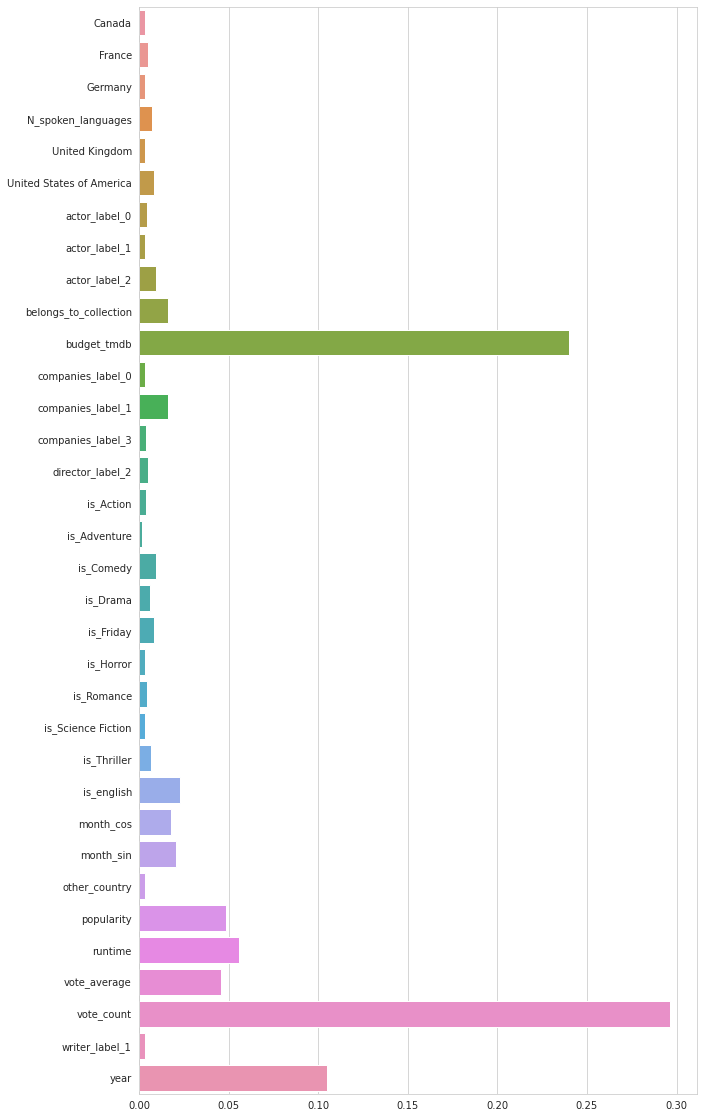

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,20))
sns.barplot(x=grid_search_cv.best_estimator_.feature_importances_, y=train_X.columns)

In [ ]:
# visualize the actual decision tree obtained 
dot_data = export_graphviz(grid_search_cv.best_estimator_.estimators_[0],
               out_file=None,
               max_depth=4, 
               feature_names=list(train_X.columns),  
               filled=True,
               rotate=True,
               rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

<a id='gbr'></a>
## G. GradientBoostingRegressor ([to top](#top))

In [ ]:
X, y = return_df.drop(['revenue', 'return', 'return_log'], axis=1), return_df['return_log']

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.2, test_size=0.8, random_state=0)

In [ ]:
X.shape, train_X.shape

((8856, 68), (1771, 68))

In [ ]:
# get a list of models to evaluate
def get_models():
 models = dict()
 for i in range(2, train_X.shape[1], 4):
  rfe = RFE(estimator=GradientBoostingRegressor(random_state = 0), n_features_to_select=i)
  model = GradientBoostingRegressor(random_state = 0)
  models[str(i)] = Pipeline(steps=[('s', rfe), ('m', model)])
 return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
 scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
 return scores

2 0.269 (0.068)
6 0.276 (0.056)
10 0.301 (0.060)
14 0.328 (0.060)
18 0.328 (0.064)
22 0.327 (0.062)
26 0.327 (0.058)
30 0.335 (0.057)
34 0.334 (0.059)
38 0.332 (0.059)
42 0.330 (0.059)
46 0.331 (0.061)
50 0.330 (0.063)
54 0.331 (0.062)
58 0.334 (0.065)
62 0.333 (0.061)
66 0.332 (0.059)


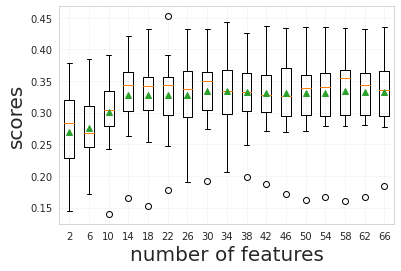

In [ ]:
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, train_X, train_y)
 results.append(scores)
 names.append(name)
 print('%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.xlabel('number of features', fontsize=20)
plt.ylabel('scores', fontsize=20)
plt.grid(alpha=0.2)
plt.show()

In [ ]:
# create pipeline
rfe = RFE(estimator=GradientBoostingRegressor(random_state = 0), n_features_to_select=30)
# let's create a pipeline
model = GradientBoostingRegressor(random_state = 0)
# create a pipeline
pipeline = Pipeline(steps=[('s', rfe), ('m', model)])

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=0)
# evaluate model
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
n_scores = cross_val_score(model, train_X, train_y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('r2_score for cv: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

r2_score for cv: 0.407 (0.026)


In [ ]:
pipeline.fit(train_X, train_y)
scores = pipeline.score(test_X, test_y)
# report performance
print('r2_score for testset: %.3f (%.3f)' % (mean(scores), std(scores)))

r2_score for testset: 0.469 (0.000)


In [ ]:
# summarize all features
for i in range(train_X.shape[1]):
 print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 39.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected False, Rank: 15.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 4.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 13.000
Column: 8, Selected False, Rank: 23.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected False, Rank: 10.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected False, Rank: 5.000
Column: 16, Selected False, Rank: 7.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected False, Rank: 22.000
Column: 19, Selected False, Rank: 25.000
Column: 20, Selected True, Rank: 1.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected False, Rank: 31.000
Column: 23, Selected True, Rank: 1.000
Column: 24, Selected False, Rank: 20.000
Column: 25, Se

In [ ]:
train_X, test_X = train_X.loc[:, rfe.support_], test_X.loc[:, rfe.support_]

In [ ]:
params = {'learning_rate': [0.01,0.001],
          'subsample'    : [0.9, 0.5],
          'n_estimators' : [500, 1000],
          'max_depth'    : [4,6,8]}

grid_search_cv = GridSearchCV(GradientBoostingRegressor(random_state=0),params,verbose=1,cv=5,scoring='r2',n_jobs=-1)
grid_search_cv.fit(train_X,train_y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.001], 'max_depth': [4, 6, 8],
                         'n_estimators': [500, 1000], 'subsample': [0.9, 0.5]},
             scoring='r2', verbose=1)

In [ ]:
grid_search_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.5}

In [ ]:
grid_search_cv.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=500,
                          random_state=0, subsample=0.5)

In [ ]:
print("Train RMSE : {:.4f}".format(np.sqrt(mean_squared_error(train_y, grid_search_cv.best_estimator_.predict(train_X)))))
print("Train MAE : {:.4f}".format(mean_absolute_error(train_y, grid_search_cv.best_estimator_.predict(train_X))))
print("Train R2 score:", grid_search_cv.best_estimator_.score(train_X, train_y))
print("Test RMSE : {:.4f}".format(np.sqrt(mean_squared_error(test_y, grid_search_cv.best_estimator_.predict(test_X)))))
print("Test MAE : {:.4f}".format(mean_absolute_error(test_y, grid_search_cv.best_estimator_.predict(test_X))))
print("Test R2 score:", grid_search_cv.best_estimator_.score(test_X, test_y))

Train RMSE : 1.4037
Train MAE : 0.9790
Train R2 score: 0.6614105101067757
Test RMSE : 1.8106
Test MAE : 1.2204
Test R2 score: 0.48093841855084074


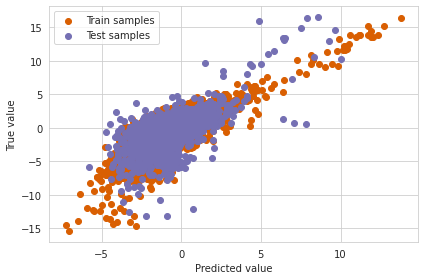

In [ ]:
train_predictions = grid_search_cv.best_estimator_.predict(train_X)
test_predictions = grid_search_cv.best_estimator_.predict(test_X)
plt.scatter(train_predictions, train_y, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, test_y, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.tight_layout()
plt.show()

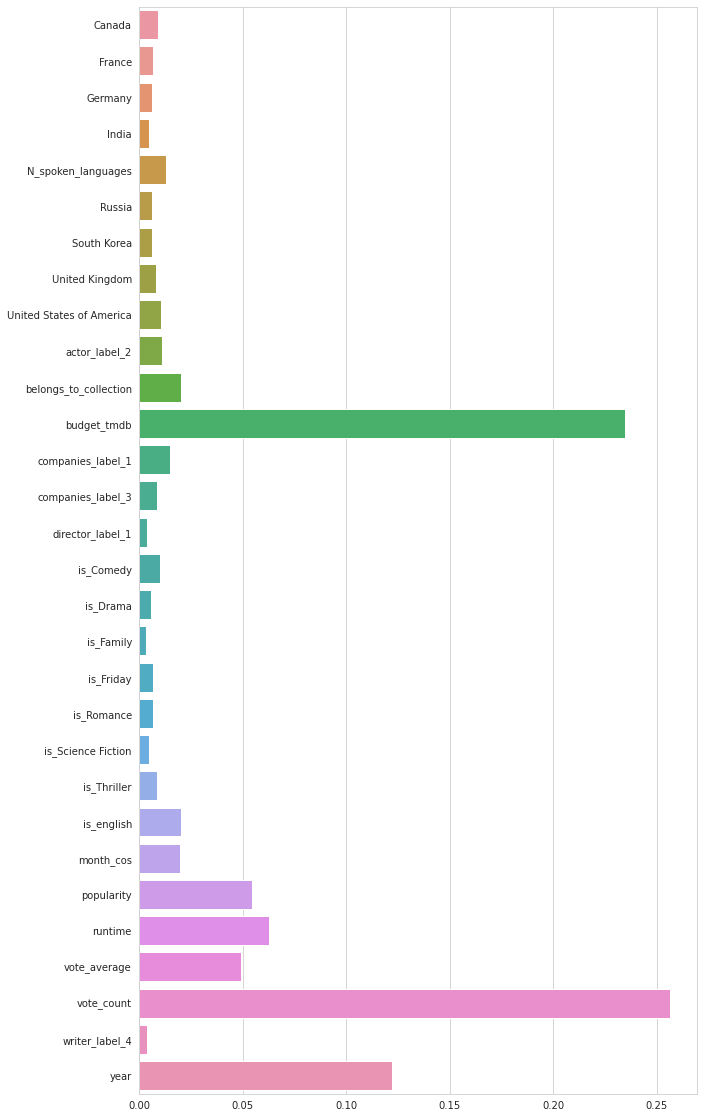

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,20))
sns.barplot(x=grid_search_cv.best_estimator_.feature_importances_, y=train_X.columns)

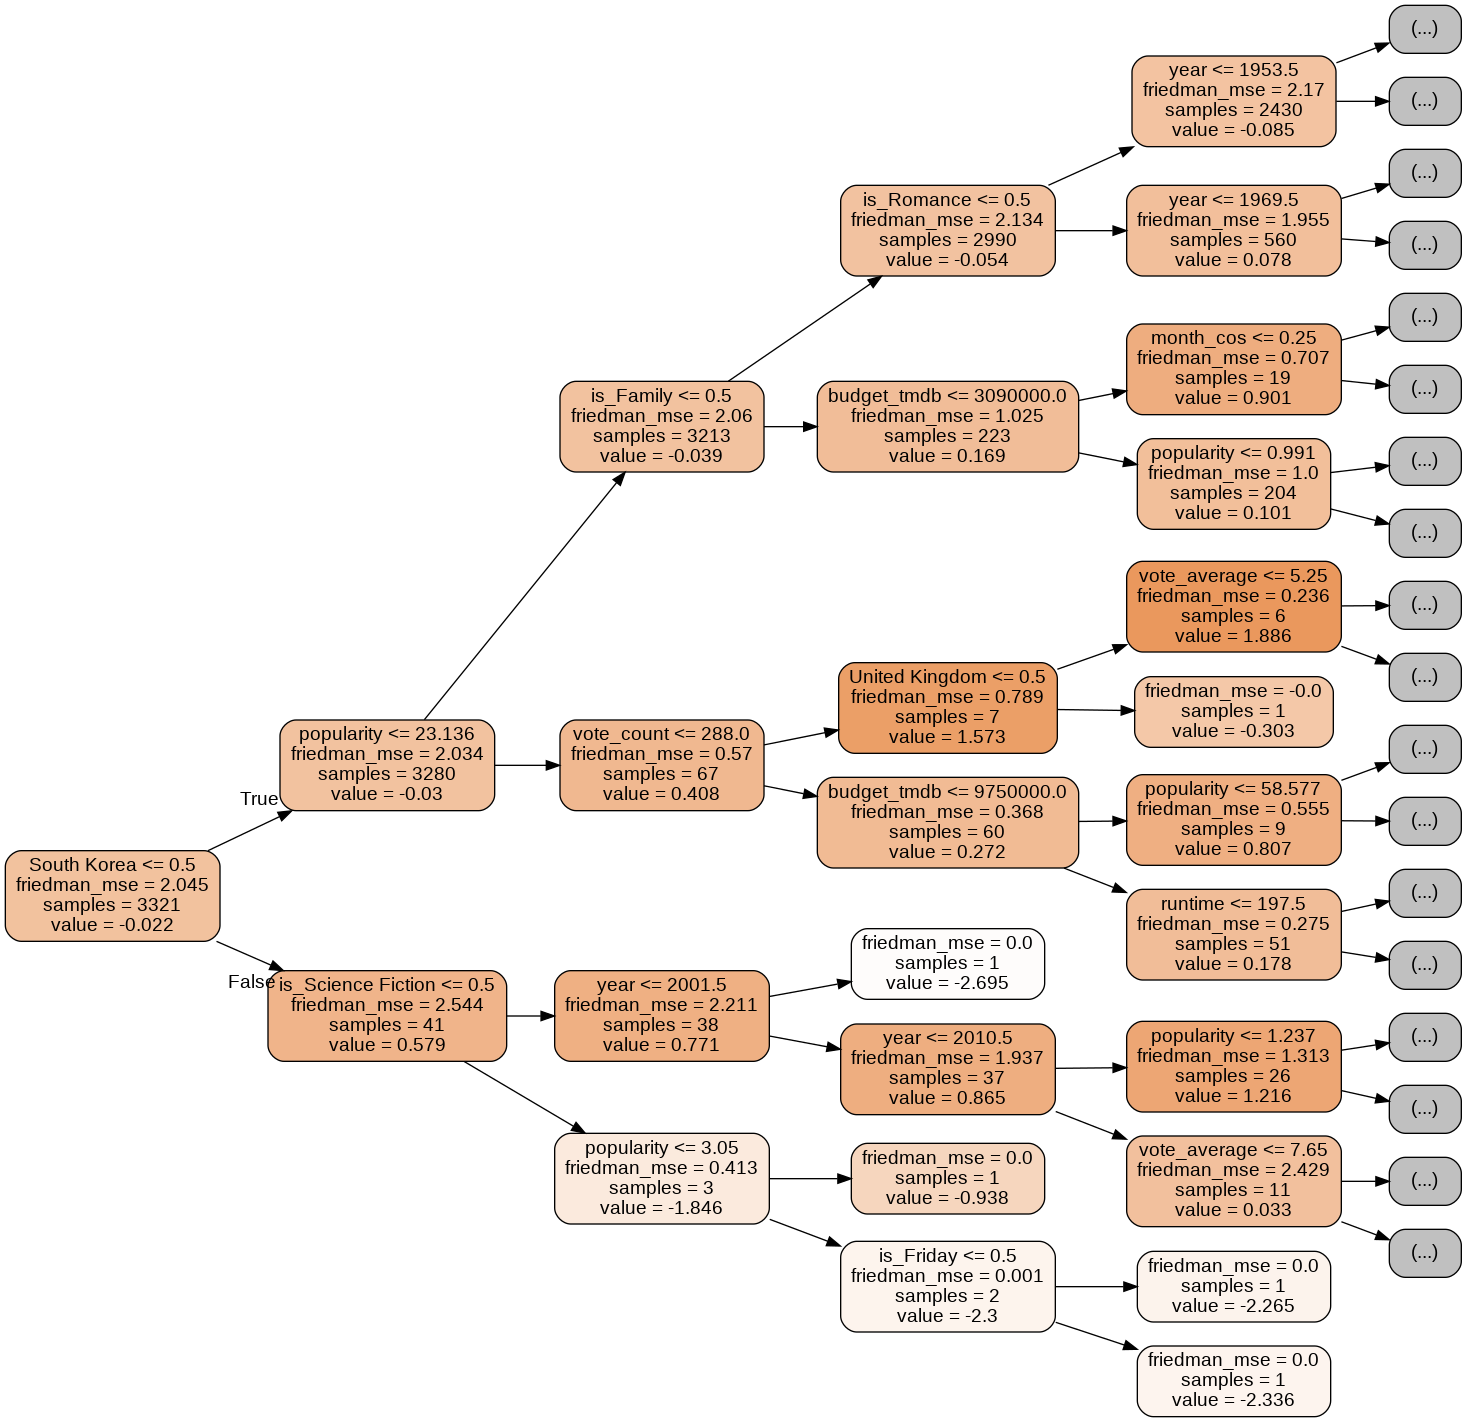

In [ ]:
# visualize the actual decision tree obtained 
dot_data = export_graphviz(grid_search_cv.best_estimator_[-1][0],
               out_file=None,
               max_depth=4, 
               feature_names=list(train_X.columns),  
               filled=True,
               rotate=True,
               rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

<a id='asr'></a>
## H. AutoSklearnRegressor ([to top](#top))

In [ ]:
X, y = return_df.drop(['revenue', 'return', 'return_log'], axis=1), return_df['return_log']
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=0)

automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=1000,
    per_run_time_limit=100,
    ensemble_size = 1000,
    ensemble_nbest = 1000,
    seed = 42,
    tmp_folder='/tmp/autosklearn_regression_example_tmp5'
)
automl.fit(train_X, train_y, dataset_name='Movies')

AutoSklearnRegressor(ensemble_nbest=1000, ensemble_size=1000,
                     per_run_time_limit=100, seed=42,
                     time_left_for_this_task=1000,
                     tmp_folder='/tmp/autosklearn_regression_example_tmp5')

In [ ]:
print(automl.leaderboard())

          rank  ensemble_weight               type      cost   duration
model_id                                                               
11           1            0.520  gradient_boosting  0.573199   3.008824
15           2            0.168  gradient_boosting  0.603687   4.995367
35           3            0.125  gradient_boosting  0.623017   5.815455
3            4            0.025        extra_trees  0.646273   7.841389
29           5            0.095      liblinear_svr  0.689739   2.513319
4            6            0.067                mlp  0.921230  12.526017


In [ ]:
automl.get_models_with_weights()[0][1]

SimpleRegressionPipeline({'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'no_preprocessing', 'regressor:__choice__': 'gradient_boosting', 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'standardize', 'regressor:gradient_boosting:early_stop': 'train', 'regressor:gradient_boosting:l2_regularization': 0.005746611563553693, 'regressor:gradient_boosting:learning_rate': 0.0913971028976721, 'regressor:gradient_boosting:loss': 'least_squares', 'regressor:gradient_boosting:max_bins': 255, 'regressor:gradient_boosting:max_depth': 'None', 'regressor:gradient_boosting:max_leaf_nodes': 9, 'regressor:gradient_boosting:min_samples_leaf

In [ ]:
print(automl.show_models())

[(0.520000, SimpleRegressionPipeline({'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'no_preprocessing', 'regressor:__choice__': 'gradient_boosting', 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'standardize', 'regressor:gradient_boosting:early_stop': 'train', 'regressor:gradient_boosting:l2_regularization': 0.005746611563553693, 'regressor:gradient_boosting:learning_rate': 0.0913971028976721, 'regressor:gradient_boosting:loss': 'least_squares', 'regressor:gradient_boosting:max_bins': 255, 'regressor:gradient_boosting:max_depth': 'None', 'regressor:gradient_boosting:max_leaf_nodes': 9, 'regressor:gradient_boosting:min_

In [ ]:
train_predictions = automl.predict(train_X)
print("Train RMSE : {:.4f}".format(np.sqrt(mean_squared_error(train_y, train_predictions))))
print("Train MAE : {:.4f}".format(mean_absolute_error(train_y, train_predictions)))
print("Train R2 score:", sklearn.metrics.r2_score(train_y, train_predictions))
test_predictions = automl.predict(test_X)
print("Test RMSE : {:.4f}".format(np.sqrt(mean_squared_error(test_y, test_predictions))))
print("Test MAE : {:.4f}".format(mean_absolute_error(test_y, test_predictions)))
print("Test R2 score:", sklearn.metrics.r2_score(test_y, test_predictions))

Train RMSE : 1.2842
Train MAE : 0.8253
Train R2 score: 0.7166226094180108
Test RMSE : 1.8352
Test MAE : 1.2141
Test R2 score: 0.4667791196192448


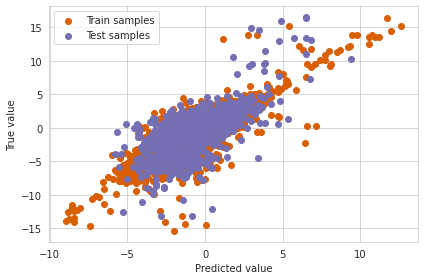

In [ ]:
plt.scatter(train_predictions, train_y, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, test_y, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.tight_layout()
plt.show()

<a id='clf'></a>
# 3. Movie Profitability Classification ([to top](#top))

<a id='afec'></a>
## A. Additional Features Engineering ([to top](#top))

Let us convert our **return_log** feature into a binary variable that will serve as our classes: 0 indicating a flop and 1 indicating a hit.

In [116]:
return_df['profitability'] = return_df['return_log'].apply(lambda x: 1 if x >=0 else 0)

In [117]:
X, y = return_df.drop(['revenue', 'return', 'return_log','profitability'], axis=1), return_df['profitability']

<a id='hud'></a>
## B. Handling Unbalanced Data ([to top](#top))

In [118]:
y.value_counts()

1    4892
0    3964
Name: profitability, dtype: int64

In [119]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=0)

In [120]:
test_X_no_sm, test_y_no_sm = test_X, test_y

In [121]:
train_X.shape, train_y.shape

((6642, 68), (6642,))

In [122]:
# Apply SMOTE to balance the dataset
sm = SMOTE(random_state=42)
train_X_sm, train_y_sm = sm.fit_resample(train_X, train_y)
train_X_sm.shape, train_y_sm.shape

((7334, 68), (7334,))

In [123]:
train_y_sm.value_counts()

1    3667
0    3667
Name: profitability, dtype: int64

<a id='dc'></a>
## C. DummyClassifier ([to top](#top))

In [124]:
# "stratified", "most_frequent", "prior", "uniform", "constant"
dummy = DummyClassifier()
dummy.fit(train_X, train_y)
scores = dummy.score(test_X, test_y)
print('Accuracy for DummyRegressor: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy for DummyRegressor: 0.553 (0.000)


In [125]:
# "stratified", "most_frequent", "prior", "uniform", "constant"
dummy = DummyClassifier(strategy="stratified")
dummy.fit(train_X_sm, train_y_sm)
scores = dummy.score(test_X, test_y)
print('Accuracy for DummyRegressor: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy for DummyRegressor: 0.497 (0.000)


In [126]:
# "stratified", "most_frequent", "prior", "uniform", "constant"
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(train_X_sm, train_y_sm)
scores = dummy.score(test_X, test_y)
print('Accuracy for DummyRegressor: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy for DummyRegressor: 0.447 (0.000)


In [127]:
# "stratified", "most_frequent", "prior", "uniform", "constant"
dummy = DummyClassifier(strategy="prior")
dummy.fit(train_X_sm, train_y_sm)
scores = dummy.score(test_X, test_y)
print('Accuracy for DummyRegressor: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy for DummyRegressor: 0.447 (0.000)


In [128]:
# "stratified", "most_frequent", "prior", "uniform", "constant"
dummy = DummyClassifier(strategy="uniform")
dummy.fit(train_X_sm, train_y_sm)
scores = dummy.score(test_X, test_y)
print('Accuracy for DummyRegressor: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy for DummyRegressor: 0.490 (0.000)


<a id='dtc'></a>
## D. DecisionTreeClassifier ([to top](#top))

In [ ]:
train_X, train_y = train_X_sm, train_y_sm
test_X, test_y = test_X_no_sm, test_y_no_sm

In [ ]:
# get a list of models to evaluate
def get_models():
 models = dict()
 for i in range(2, train_X.shape[1], 4):
  rfe = RFE(estimator=DecisionTreeClassifier(random_state = 0), n_features_to_select=i)
  model = DecisionTreeClassifier(random_state = 0)
  models[str(i)] = Pipeline(steps=[('s', rfe), ('m', model)])
 return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
 return scores

2 0.632 (0.026)
6 0.685 (0.024)
10 0.693 (0.024)
14 0.690 (0.023)
18 0.690 (0.030)
22 0.691 (0.028)
26 0.690 (0.028)
30 0.690 (0.026)
34 0.690 (0.027)
38 0.691 (0.026)
42 0.695 (0.023)
46 0.694 (0.031)
50 0.692 (0.029)
54 0.692 (0.028)
58 0.700 (0.025)
62 0.690 (0.026)
66 0.691 (0.019)


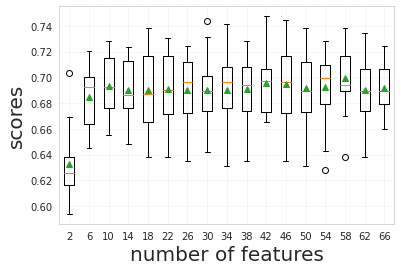

In [ ]:
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, train_X[:int(len(train_X)*0.2)], train_y[:int(len(train_X)*0.2)])
 results.append(scores)
 names.append(name)
 print('%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.xlabel('number of features', fontsize=20)
plt.ylabel('scores', fontsize=20)
plt.grid(alpha=0.2)
plt.show()

In [ ]:
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(random_state = 0), n_features_to_select=10)
# let's create a pipeline
model = DecisionTreeClassifier(random_state = 0)
# create a pipeline
pipeline = Pipeline(steps=[('s', rfe), ('m', model)])

In [ ]:
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
n_scores = cross_val_score(model, train_X, train_y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuray for cv: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuray for cv: 0.707 (0.009)


In [ ]:
pipeline.fit(train_X, train_y)
scores = pipeline.score(test_X, test_y)
# report performance
print('Accuracy for testset: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy for testset: 0.686 (0.000)


In [ ]:
# summarize all features
for i in range(train_X.shape[1]):
 print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 39.000
Column: 1, Selected False, Rank: 33.000
Column: 2, Selected False, Rank: 52.000
Column: 3, Selected False, Rank: 37.000
Column: 4, Selected False, Rank: 29.000
Column: 5, Selected False, Rank: 44.000
Column: 6, Selected False, Rank: 3.000
Column: 7, Selected False, Rank: 49.000
Column: 8, Selected False, Rank: 40.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected False, Rank: 22.000
Column: 11, Selected False, Rank: 34.000
Column: 12, Selected False, Rank: 46.000
Column: 13, Selected False, Rank: 13.000
Column: 14, Selected False, Rank: 6.000
Column: 15, Selected False, Rank: 7.000
Column: 16, Selected False, Rank: 14.000
Column: 17, Selected False, Rank: 23.000
Column: 18, Selected False, Rank: 58.000
Column: 19, Selected False, Rank: 35.000
Column: 20, Selected True, Rank: 1.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected False, Rank: 5.000
Column: 23, Selected False, Rank: 16.000
Column: 24, Selected False, Rank: 30

In [ ]:
train_X, test_X = train_X.loc[:, rfe.support_], test_X.loc[:, rfe.support_]

In [ ]:
params = {'criterion':['gini','entropy'],
          'splitter' : ['best', 'random'],
          'max_depth' : [2, 5, 10, 15, 20, 25, None],
          'min_samples_split' : [100, 150, 200],
          'min_samples_leaf': [2, 5, 10, 15, 20, 25]}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=0),params,verbose=1,cv=5,scoring='accuracy',n_jobs=-1)
grid_search_cv.fit(train_X,train_y)

Fitting 5 folds for each of 504 candidates, totalling 2520 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 15, 20, 25, None],
                         'min_samples_leaf': [2, 5, 10, 15, 20, 25],
                         'min_samples_split': [100, 150, 200],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search_cv.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 20,
 'min_samples_split': 150,
 'splitter': 'best'}

In [ ]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=15, min_samples_leaf=20, min_samples_split=150,
                       random_state=0)

In [ ]:
train_predictions = grid_search_cv.best_estimator_.predict(train_X)
print("Train Accuracy score:", sklearn.metrics.accuracy_score(train_y, train_predictions))
test_predictions = grid_search_cv.best_estimator_.predict(test_X)
print("Test Accuracy score:", sklearn.metrics.accuracy_score(test_y, test_predictions))

Train Accuracy score: 0.7762476138532861
Test Accuracy score: 0.7384823848238482


In [ ]:
def report_scores(test_y, test_pred):
    print(classification_report(test_y, test_pred, target_names=['flop', 'hit']))

In [ ]:
#compute the performance of the model
report_scores(train_y,train_predictions)

              precision    recall  f1-score   support

        flop       0.78      0.77      0.77      3667
         hit       0.77      0.79      0.78      3667

    accuracy                           0.78      7334
   macro avg       0.78      0.78      0.78      7334
weighted avg       0.78      0.78      0.78      7334



In [ ]:
#compute the performance of the model
report_scores(test_y,test_predictions)

              precision    recall  f1-score   support

        flop       0.70      0.73      0.71       989
         hit       0.77      0.75      0.76      1225

    accuracy                           0.74      2214
   macro avg       0.74      0.74      0.74      2214
weighted avg       0.74      0.74      0.74      2214



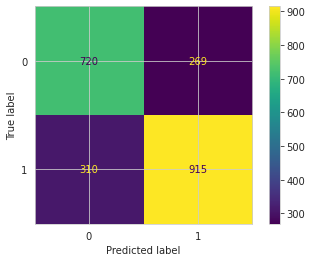

In [ ]:
#it is possible to plot the confusion matrix 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid_search_cv.best_estimator_, test_X, test_y)
plt.show()

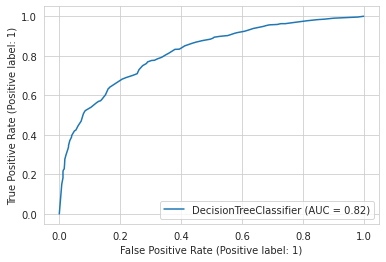

In [ ]:
plot_roc_curve(grid_search_cv.best_estimator_, test_X, test_y)

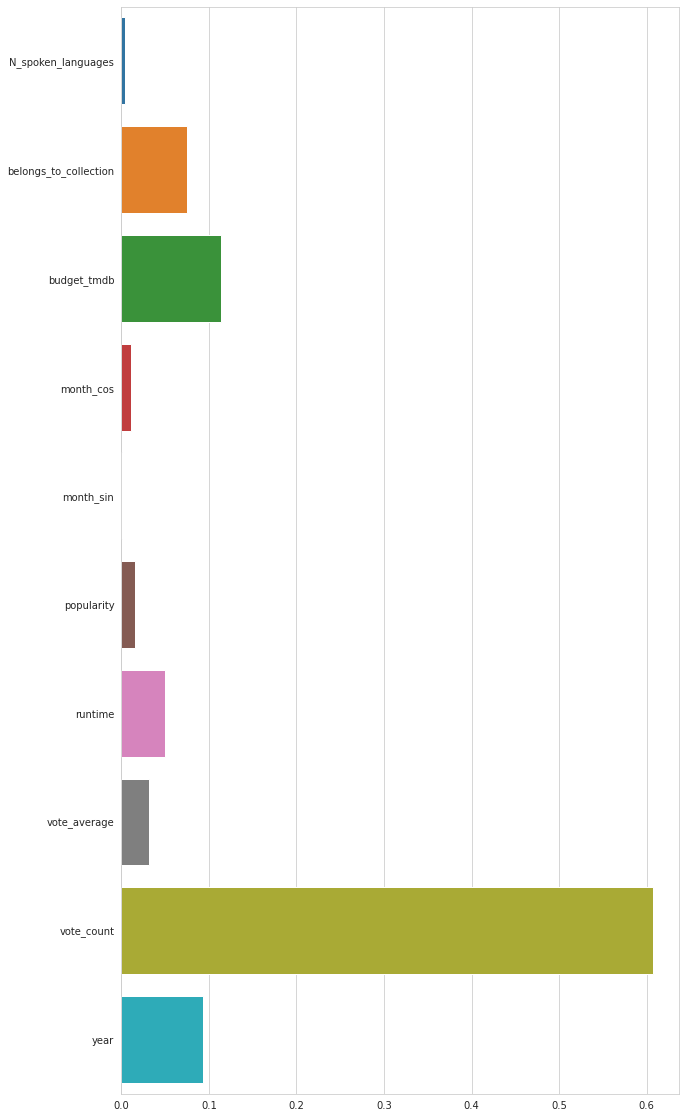

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,20))
sns.barplot(x=grid_search_cv.best_estimator_.feature_importances_, y=train_X.columns)

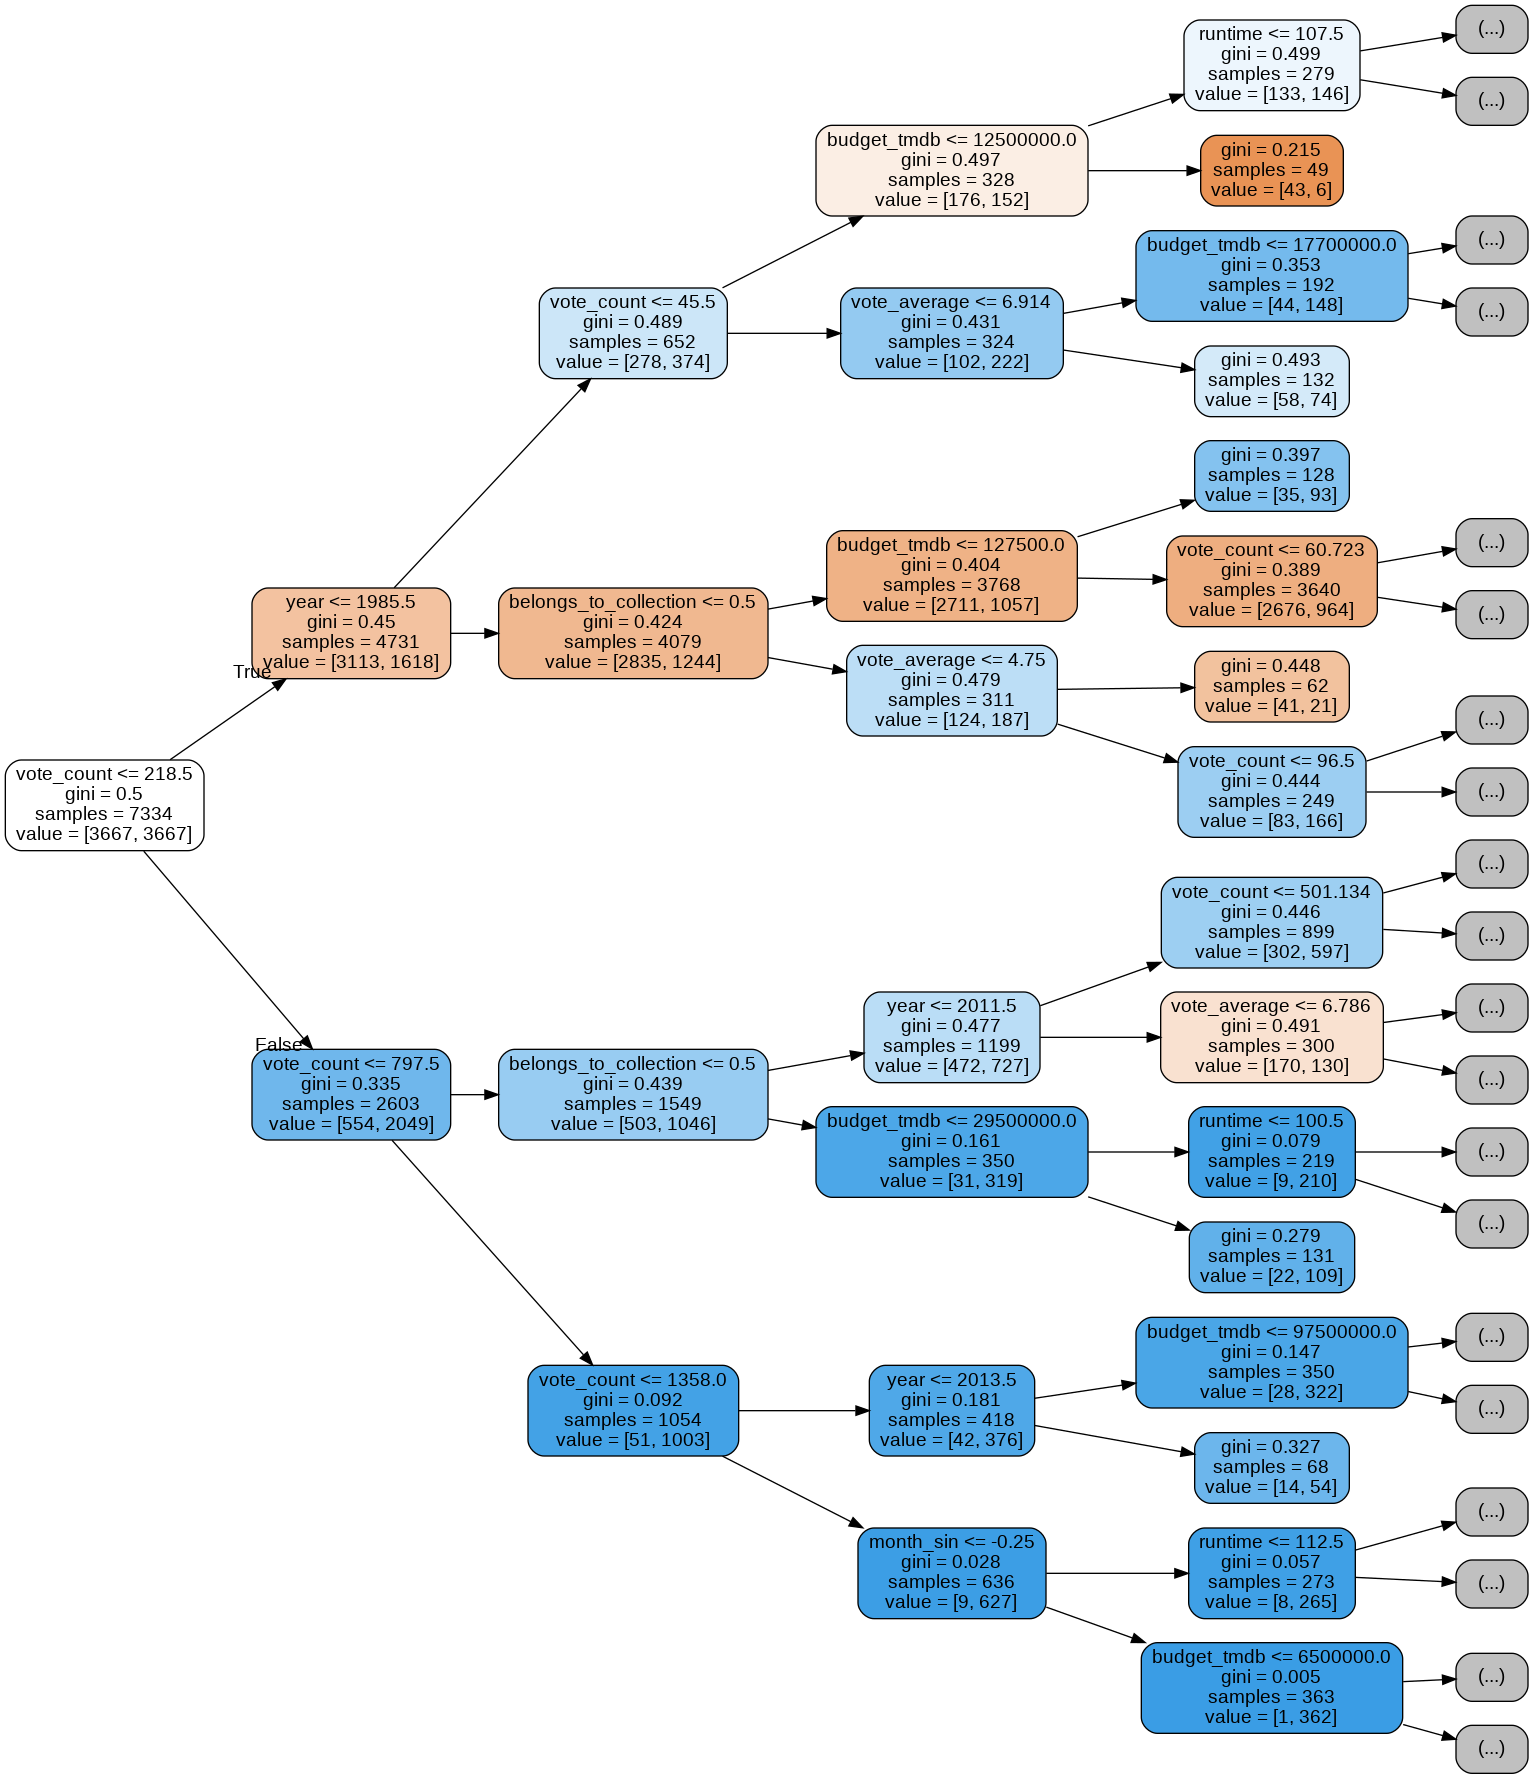

In [ ]:
# visualize the actual decision tree obtained 
dot_data = export_graphviz(grid_search_cv.best_estimator_,
               out_file=None,
               max_depth=4, 
               feature_names=list(train_X.columns),  
               filled=True,
               rotate=True,
               rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

<a id='mlpc'></a>
## E. MLPClassifier ([to top](#top))

In [ ]:
X, y = return_df.drop(['revenue', 'return', 'return_log','profitability'], axis=1), return_df['profitability']

In [ ]:
data = X
data.insert(len(data.columns), 'return_log', y)
data.columns, data.shape

(Index(['Australia', 'Canada', 'China', 'France', 'Germany', 'Hong Kong',
        'India', 'Italy', 'Japan', 'N_spoken_languages', 'Russia',
        'South Korea', 'Spain', 'United Kingdom', 'United States of America',
        'actor_label_0', 'actor_label_1', 'actor_label_2', 'actor_label_3',
        'actor_label_4', 'belongs_to_collection', 'budget_tmdb',
        'companies_label_0', 'companies_label_1', 'companies_label_2',
        'companies_label_3', 'director_label_0', 'director_label_1',
        'director_label_2', 'director_label_3', 'is_Action', 'is_Adventure',
        'is_Animation', 'is_Biography', 'is_Comedy', 'is_Crime',
        'is_Documentary', 'is_Drama', 'is_Family', 'is_Fantasy', 'is_Foreign',
        'is_Friday', 'is_History', 'is_Horror', 'is_Music', 'is_Musical',
        'is_Mystery', 'is_Romance', 'is_Science Fiction', 'is_Sport',
        'is_TV Movie', 'is_Thriller', 'is_War', 'is_Western', 'is_english',
        'month_cos', 'month_sin', 'other_country', 'popular

In [ ]:
scaler_m = MinMaxScaler()
data_m = scaler_m.fit_transform(data.values)
X_m = data_m[:, 0:len(data.columns)-1]
y_m = data_m[:,len(data.columns)-1]

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X_m, y_m, train_size=0.75, test_size=0.25, random_state=0)
model = MLPClassifier(random_state = 0, early_stopping=True, max_iter=1000)

In [ ]:
# Apply SMOTE to balance the dataset
sm = SMOTE(random_state=42)
train_X, train_y = sm.fit_resample(train_X, train_y)
train_X.shape, train_y.shape

((7334, 68), (7334,))

In [ ]:
# evaluate model
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
n_scores = cross_val_score(model, train_X, train_y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy for cv: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy for cv: 0.726 (0.023)


In [ ]:
model.fit(train_X, train_y)
scores = model.score(test_X, test_y)
# report performance
print('Accuracy for testset: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy for testset: 0.739 (0.000)


In [ ]:
params = {"hidden_layer_sizes": [(1,),(2,),(3,)],
          "activation": ["identity", "logistic", "tanh", "relu"],
          "solver": ["lbfgs", "sgd", "adam"],
          "alpha": [0.001,0.005,0.01]}

grid_search_cv = GridSearchCV(model,params,verbose=1,cv=5,scoring='r2',n_jobs=-1)
grid_search_cv.fit(train_X,train_y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=MLPClassifier(early_stopping=True, max_iter=1000,
                                     random_state=0),
             n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.001, 0.005, 0.01],
                         'hidden_layer_sizes': [(1,), (2,), (3,)],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='r2', verbose=1)

In [ ]:
grid_search_cv.best_params_

{'activation': 'tanh',
 'alpha': 0.001,
 'hidden_layer_sizes': (1,),
 'solver': 'lbfgs'}

In [ ]:
grid_search_cv.best_estimator_

MLPClassifier(activation='tanh', alpha=0.001, early_stopping=True,
              hidden_layer_sizes=(1,), max_iter=1000, random_state=0,
              solver='lbfgs')

In [ ]:
train_predictions = grid_search_cv.best_estimator_.predict(train_X)
print("Train Accuracy score:", sklearn.metrics.accuracy_score(train_y, train_predictions))
test_predictions = grid_search_cv.best_estimator_.predict(test_X)
print("Test Accuracy score:", sklearn.metrics.accuracy_score(test_y, test_predictions))

Train Accuracy score: 0.7676574856831198
Test Accuracy score: 0.7583559168925023


In [ ]:
def report_scores(test_y, test_pred):
    print(classification_report(test_y, test_pred, target_names=['flop', 'hit']))

In [ ]:
#compute the performance of the model
report_scores(train_y,train_predictions)

              precision    recall  f1-score   support

        flop       0.75      0.80      0.77      3667
         hit       0.78      0.74      0.76      3667

    accuracy                           0.77      7334
   macro avg       0.77      0.77      0.77      7334
weighted avg       0.77      0.77      0.77      7334



In [ ]:
#compute the performance of the model
report_scores(test_y,test_predictions)

              precision    recall  f1-score   support

        flop       0.70      0.80      0.75       989
         hit       0.82      0.72      0.77      1225

    accuracy                           0.76      2214
   macro avg       0.76      0.76      0.76      2214
weighted avg       0.77      0.76      0.76      2214



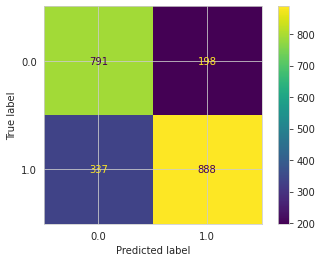

In [ ]:
#it is possible to plot the confusion matrix 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid_search_cv.best_estimator_, test_X, test_y)
plt.show()

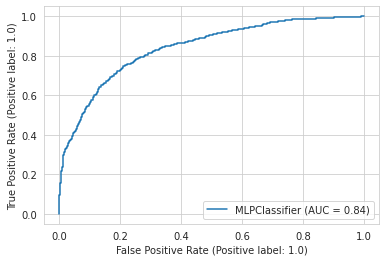

In [ ]:
plot_roc_curve(grid_search_cv.best_estimator_, test_X, test_y)

In [ ]:
bagging = BaggingClassifier(base_estimator=grid_search_cv.best_estimator_, n_estimators=50, random_state=0).fit(train_X,train_y)

In [ ]:
train_predictions = bagging.predict(train_X)
print("Train Accuracy score:", sklearn.metrics.accuracy_score(train_y, train_predictions))
test_predictions = bagging.predict(test_X)
print("Test Accuracy score:", sklearn.metrics.accuracy_score(test_y, test_predictions))

Train Accuracy score: 0.7675211344423234
Test Accuracy score: 0.7606142728093948


In [ ]:
def report_scores(test_y, test_pred):
    print(classification_report(test_y, test_pred, target_names=['flop', 'hit']))

In [ ]:
#compute the performance of the model
report_scores(train_y,train_predictions)

              precision    recall  f1-score   support

        flop       0.75      0.80      0.77      3667
         hit       0.78      0.74      0.76      3667

    accuracy                           0.77      7334
   macro avg       0.77      0.77      0.77      7334
weighted avg       0.77      0.77      0.77      7334



In [ ]:
#compute the performance of the model
report_scores(test_y,test_predictions)

              precision    recall  f1-score   support

        flop       0.70      0.80      0.75       989
         hit       0.82      0.73      0.77      1225

    accuracy                           0.76      2214
   macro avg       0.76      0.76      0.76      2214
weighted avg       0.77      0.76      0.76      2214



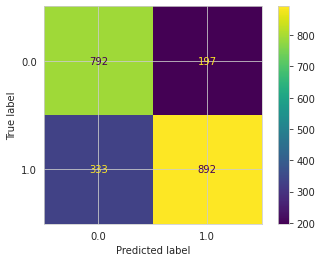

In [ ]:
#it is possible to plot the confusion matrix 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(bagging, test_X, test_y)
plt.show()

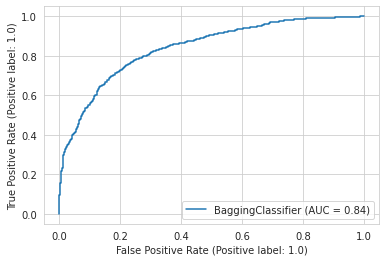

In [ ]:
plot_roc_curve(bagging, test_X, test_y)

<a id='cnn-svc'></a>
## F. CNN-SVC/XGBoost ([to top](#top))

In [ ]:
X, y = return_df.drop(['revenue', 'return', 'return_log','profitability'], axis=1), return_df['profitability']

In [ ]:
data = X
data.insert(len(data.columns), 'profitability', y)
data.columns, data.shape

(Index(['Australia', 'Canada', 'China', 'France', 'Germany', 'Hong Kong',
        'India', 'Italy', 'Japan', 'N_spoken_languages', 'Russia',
        'South Korea', 'Spain', 'United Kingdom', 'United States of America',
        'actor_label_0', 'actor_label_1', 'actor_label_2', 'actor_label_3',
        'actor_label_4', 'belongs_to_collection', 'budget_tmdb',
        'companies_label_0', 'companies_label_1', 'companies_label_2',
        'companies_label_3', 'director_label_0', 'director_label_1',
        'director_label_2', 'director_label_3', 'is_Action', 'is_Adventure',
        'is_Animation', 'is_Biography', 'is_Comedy', 'is_Crime',
        'is_Documentary', 'is_Drama', 'is_Family', 'is_Fantasy', 'is_Foreign',
        'is_Friday', 'is_History', 'is_Horror', 'is_Music', 'is_Musical',
        'is_Mystery', 'is_Romance', 'is_Science Fiction', 'is_Sport',
        'is_TV Movie', 'is_Thriller', 'is_War', 'is_Western', 'is_english',
        'month_cos', 'month_sin', 'other_country', 'popular

In [ ]:
scaler_m = MinMaxScaler()
data_m = scaler_m.fit_transform(data.values)
X_m = data_m[:, 0:len(data.columns)-1]
y_m = data_m[:,len(data.columns)-1]

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X_m, y_m, train_size=0.75, test_size=0.25, random_state=0)
train_X.shape, test_X.shape

((6642, 68), (2214, 68))

In [ ]:
x_train = np.expand_dims(train_X, axis=2)
x_test = np.expand_dims(test_X, axis=2)
x_train.shape, x_test.shape

((6642, 68, 1), (2214, 68, 1))

In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, BatchNormalization, MaxPooling1D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import model_from_json
from tensorflow.keras import backend as K
tf.random.set_seed(42)

model = Sequential()
model.add(Conv1D(128, (5), dilation_rate=3, input_shape=(train_X.shape[1],1), activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.6))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64, activation='relu', name='output_2'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid', name='output_1'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

model.summary()

history = model.fit(x_train, train_y,
          batch_size=64,
          epochs=50,
          verbose=2,
          validation_split=0.1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 56, 128)           768       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 28, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 128)           0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 128)           512       
_________________________________________________________________
flatten (Flatten)            (None, 3584)              0         
_________________________________________________________________
output_2 (Dense)             (None, 64)                229440    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [ ]:
train_predictions = np.squeeze(model.predict(x_train))
train_predictions = (train_predictions > 0.5)
print("Train Accuracy score:", sklearn.metrics.accuracy_score(train_y, train_predictions))
test_predictions = np.squeeze(model.predict(x_test))
test_predictions = (test_predictions > 0.5)
print("Test Accuracy score:", sklearn.metrics.accuracy_score(test_y, test_predictions))

Train Accuracy score: 0.7898223426678711
Test Accuracy score: 0.7542908762420958


In [ ]:
from tensorflow.keras.models import Model

m1 = Model(inputs=model.input, outputs=model.get_layer('output_1').output)
m2 = Model(inputs=model.input, outputs=model.get_layer('output_2').output)

In [ ]:
from sklearn.svm import SVC

svc = SVC(random_state=0)
svc.fit(m2.predict(x_train), train_y)
scores = svc.score(m2.predict(x_test),test_y)
print('Accuracy for CNN-SVC-2: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy for CNN-SVC-2: 0.754 (0.000)


In [ ]:
svc = SVC(random_state=0)
svc.fit(m1.predict(x_train), train_y)
scores = svc.score(m1.predict(x_test),test_y)
print('Accuracy for CNN-SVC-1: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy for CNN-SVC-1: 0.756 (0.000)


In [ ]:
import xgboost as xgb

xb = xgb.XGBClassifier(random_state=0)
xb.fit(m2.predict(x_train), train_y)
scores = xb.score(m2.predict(x_test),test_y)
print('Accuracy for CNN-XGBoost-2: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy for CNN-XGBoost-2: 0.748 (0.000)


In [ ]:
xb = xgb.XGBClassifier(random_state=0)
xb.fit(m1.predict(x_train), train_y)
scores = xb.score(m1.predict(x_test),test_y)
print('Accuracy for CNN-XGBoost-1: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy for CNN-XGBoost-1: 0.754 (0.000)


**CNN-SVC-1 :**

In [ ]:
train_predictions = svc.predict(m1.predict(x_train))
print("Train Accuracy score:", sklearn.metrics.accuracy_score(train_y, train_predictions))
test_predictions = svc.predict(m1.predict(x_test))
print("Test Accuracy score:", sklearn.metrics.accuracy_score(test_y, test_predictions))

Train Accuracy score: 0.7902740138512496
Test Accuracy score: 0.7556458897922312


In [ ]:
def report_scores(test_y, test_pred):
    print(classification_report(test_y, test_pred, target_names=['flop', 'hit']))

In [ ]:
#compute the performance of the model
report_scores(train_y,train_predictions)

              precision    recall  f1-score   support

        flop       0.76      0.77      0.77      2975
         hit       0.81      0.81      0.81      3667

    accuracy                           0.79      6642
   macro avg       0.79      0.79      0.79      6642
weighted avg       0.79      0.79      0.79      6642



In [ ]:
#compute the performance of the model
report_scores(test_y,test_predictions)

              precision    recall  f1-score   support

        flop       0.72      0.75      0.73       989
         hit       0.79      0.76      0.78      1225

    accuracy                           0.76      2214
   macro avg       0.75      0.75      0.75      2214
weighted avg       0.76      0.76      0.76      2214



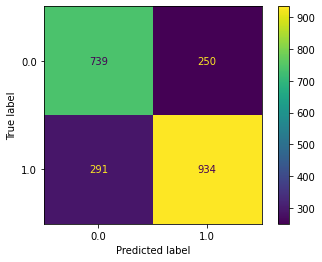

In [ ]:
#it is possible to plot the confusion matrix 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc, m1.predict(x_test), test_y)
plt.show()

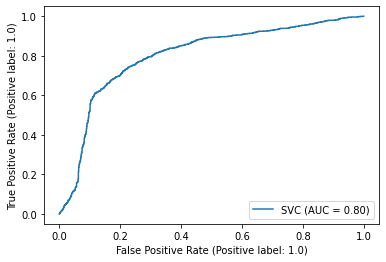

In [ ]:
plot_roc_curve(svc, m1.predict(x_test), test_y)

<a id='rfc'></a>
## G. RandomForestClassifier ([to top](#top))

In [ ]:
train_X, train_y = train_X_sm, train_y_sm
test_X, test_y = test_X_no_sm, test_y_no_sm

In [ ]:
# get a list of models to evaluate
def get_models():
 models = dict()
 for i in range(2, train_X.shape[1], 4):
  rfe = RFE(estimator=RandomForestClassifier(random_state = 0), n_features_to_select=i)
  model = RandomForestClassifier(random_state = 0)
  models[str(i)] = Pipeline(steps=[('s', rfe), ('m', model)])
 return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
 return scores

2 0.638 (0.025)
6 0.741 (0.027)
10 0.743 (0.030)
14 0.745 (0.027)
18 0.748 (0.029)
22 0.745 (0.025)
26 0.752 (0.030)
30 0.752 (0.032)
34 0.753 (0.026)
38 0.750 (0.028)
42 0.752 (0.031)
46 0.756 (0.031)
50 0.753 (0.030)
54 0.747 (0.028)
58 0.754 (0.030)
62 0.750 (0.027)
66 0.754 (0.029)


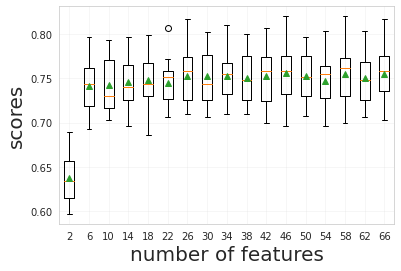

In [ ]:
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, train_X[:int(len(train_X)*0.2)], train_y[:int(len(train_X)*0.2)])
 results.append(scores)
 names.append(name)
 print('%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.xlabel('number of features', fontsize=20)
plt.ylabel('scores', fontsize=20)
plt.grid(alpha=0.2)
plt.show()

In [ ]:
# create pipeline
rfe = RFE(estimator=RandomForestClassifier(random_state = 0), n_features_to_select=46)
# let's create a pipeline
model = RandomForestClassifier(random_state = 0)
# create a pipeline
pipeline = Pipeline(steps=[('s', rfe), ('m', model)])

In [ ]:
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
n_scores = cross_val_score(model, train_X, train_y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuray for cv: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuray for cv: 0.782 (0.007)


In [ ]:
pipeline.fit(train_X, train_y)
scores = pipeline.score(test_X, test_y)
# report performance
print('Accuracy for testset: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy for testset: 0.771 (0.000)


In [ ]:
# summarize all features
for i in range(train_X.shape[1]):
 print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 9.000
Column: 1, Selected False, Rank: 3.000
Column: 2, Selected False, Rank: 10.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 16.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 14.000
Column: 8, Selected False, Rank: 8.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected False, Rank: 2.000
Column: 11, Selected False, Rank: 13.000
Column: 12, Selected False, Rank: 12.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected False, Rank: 11.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected True, Rank: 1.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected True, Rank: 1.000
Column: 23, Selected True, Rank: 1.000
Column: 24, Selected True, Rank: 1.000
Column: 25, Selecte

In [ ]:
train_X, test_X = train_X.loc[:, rfe.support_], test_X.loc[:, rfe.support_]

In [ ]:
params = {'criterion' : ['gini','entropy'],
          'n_estimators' : [int(x) for x in np.linspace(start = 400, stop = 600, num = 3)],
          'min_samples_split' : [2, 5, 10],
          'min_samples_leaf': [1, 2, 5]}

grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=0),params,verbose=1,cv=5,scoring='accuracy',n_jobs=-1)
grid_search_cv.fit(train_X,train_y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [400, 500, 600]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search_cv.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [ ]:
grid_search_cv.best_estimator_

RandomForestClassifier(n_estimators=400, random_state=0)

In [ ]:
train_predictions = grid_search_cv.best_estimator_.predict(train_X)
print("Train Accuracy score:", sklearn.metrics.accuracy_score(train_y, train_predictions))
test_predictions = grid_search_cv.best_estimator_.predict(test_X)
print("Test Accuracy score:", sklearn.metrics.accuracy_score(test_y, test_predictions))

Train Accuracy score: 1.0
Test Accuracy score: 0.7773261065943993


In [ ]:
def report_scores(test_y, test_pred):
    print(classification_report(test_y, test_pred, target_names=['flop', 'hit']))

In [ ]:
#compute the performance of the model
report_scores(train_y,train_predictions)

              precision    recall  f1-score   support

        flop       1.00      1.00      1.00      3667
         hit       1.00      1.00      1.00      3667

    accuracy                           1.00      7334
   macro avg       1.00      1.00      1.00      7334
weighted avg       1.00      1.00      1.00      7334



In [ ]:
#compute the performance of the model
report_scores(test_y,test_predictions)

              precision    recall  f1-score   support

        flop       0.73      0.79      0.76       989
         hit       0.82      0.77      0.79      1225

    accuracy                           0.78      2214
   macro avg       0.78      0.78      0.78      2214
weighted avg       0.78      0.78      0.78      2214



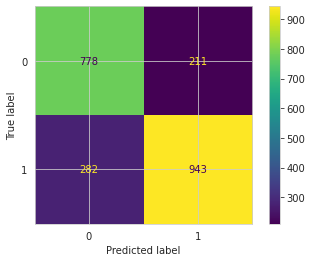

In [ ]:
#it is possible to plot the confusion matrix 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid_search_cv.best_estimator_, test_X, test_y)
plt.show()

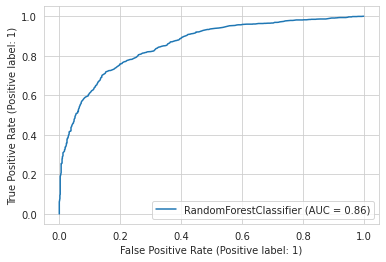

In [ ]:
plot_roc_curve(grid_search_cv.best_estimator_, test_X, test_y)

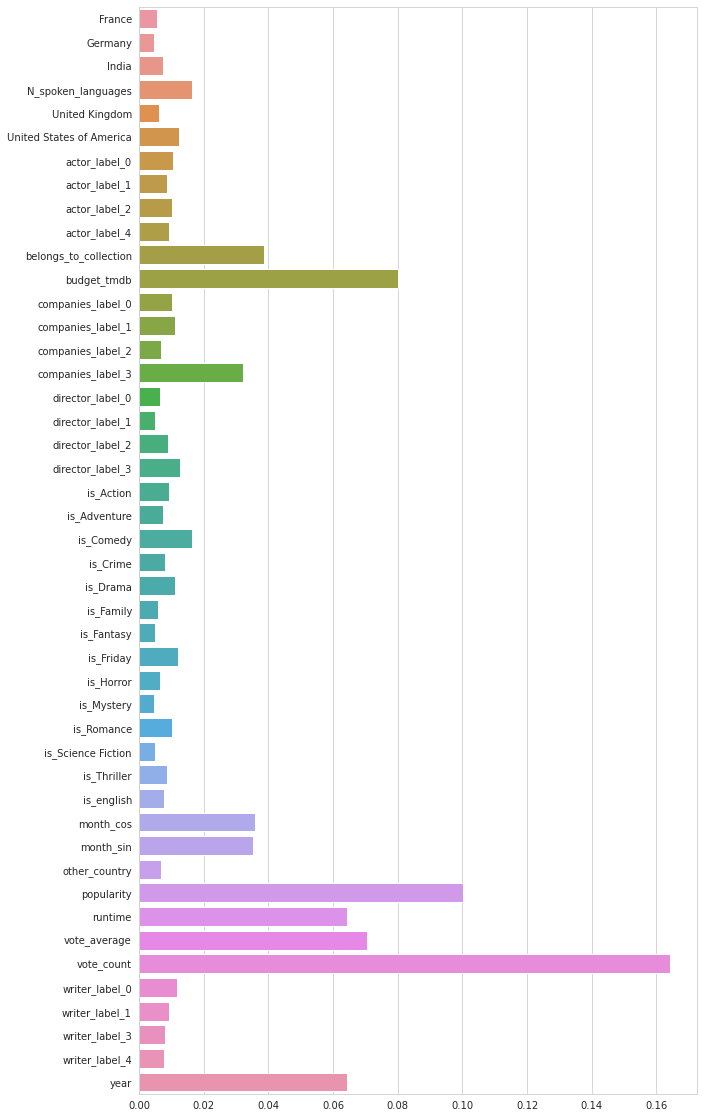

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,20))
sns.barplot(x=grid_search_cv.best_estimator_.feature_importances_, y=train_X.columns)

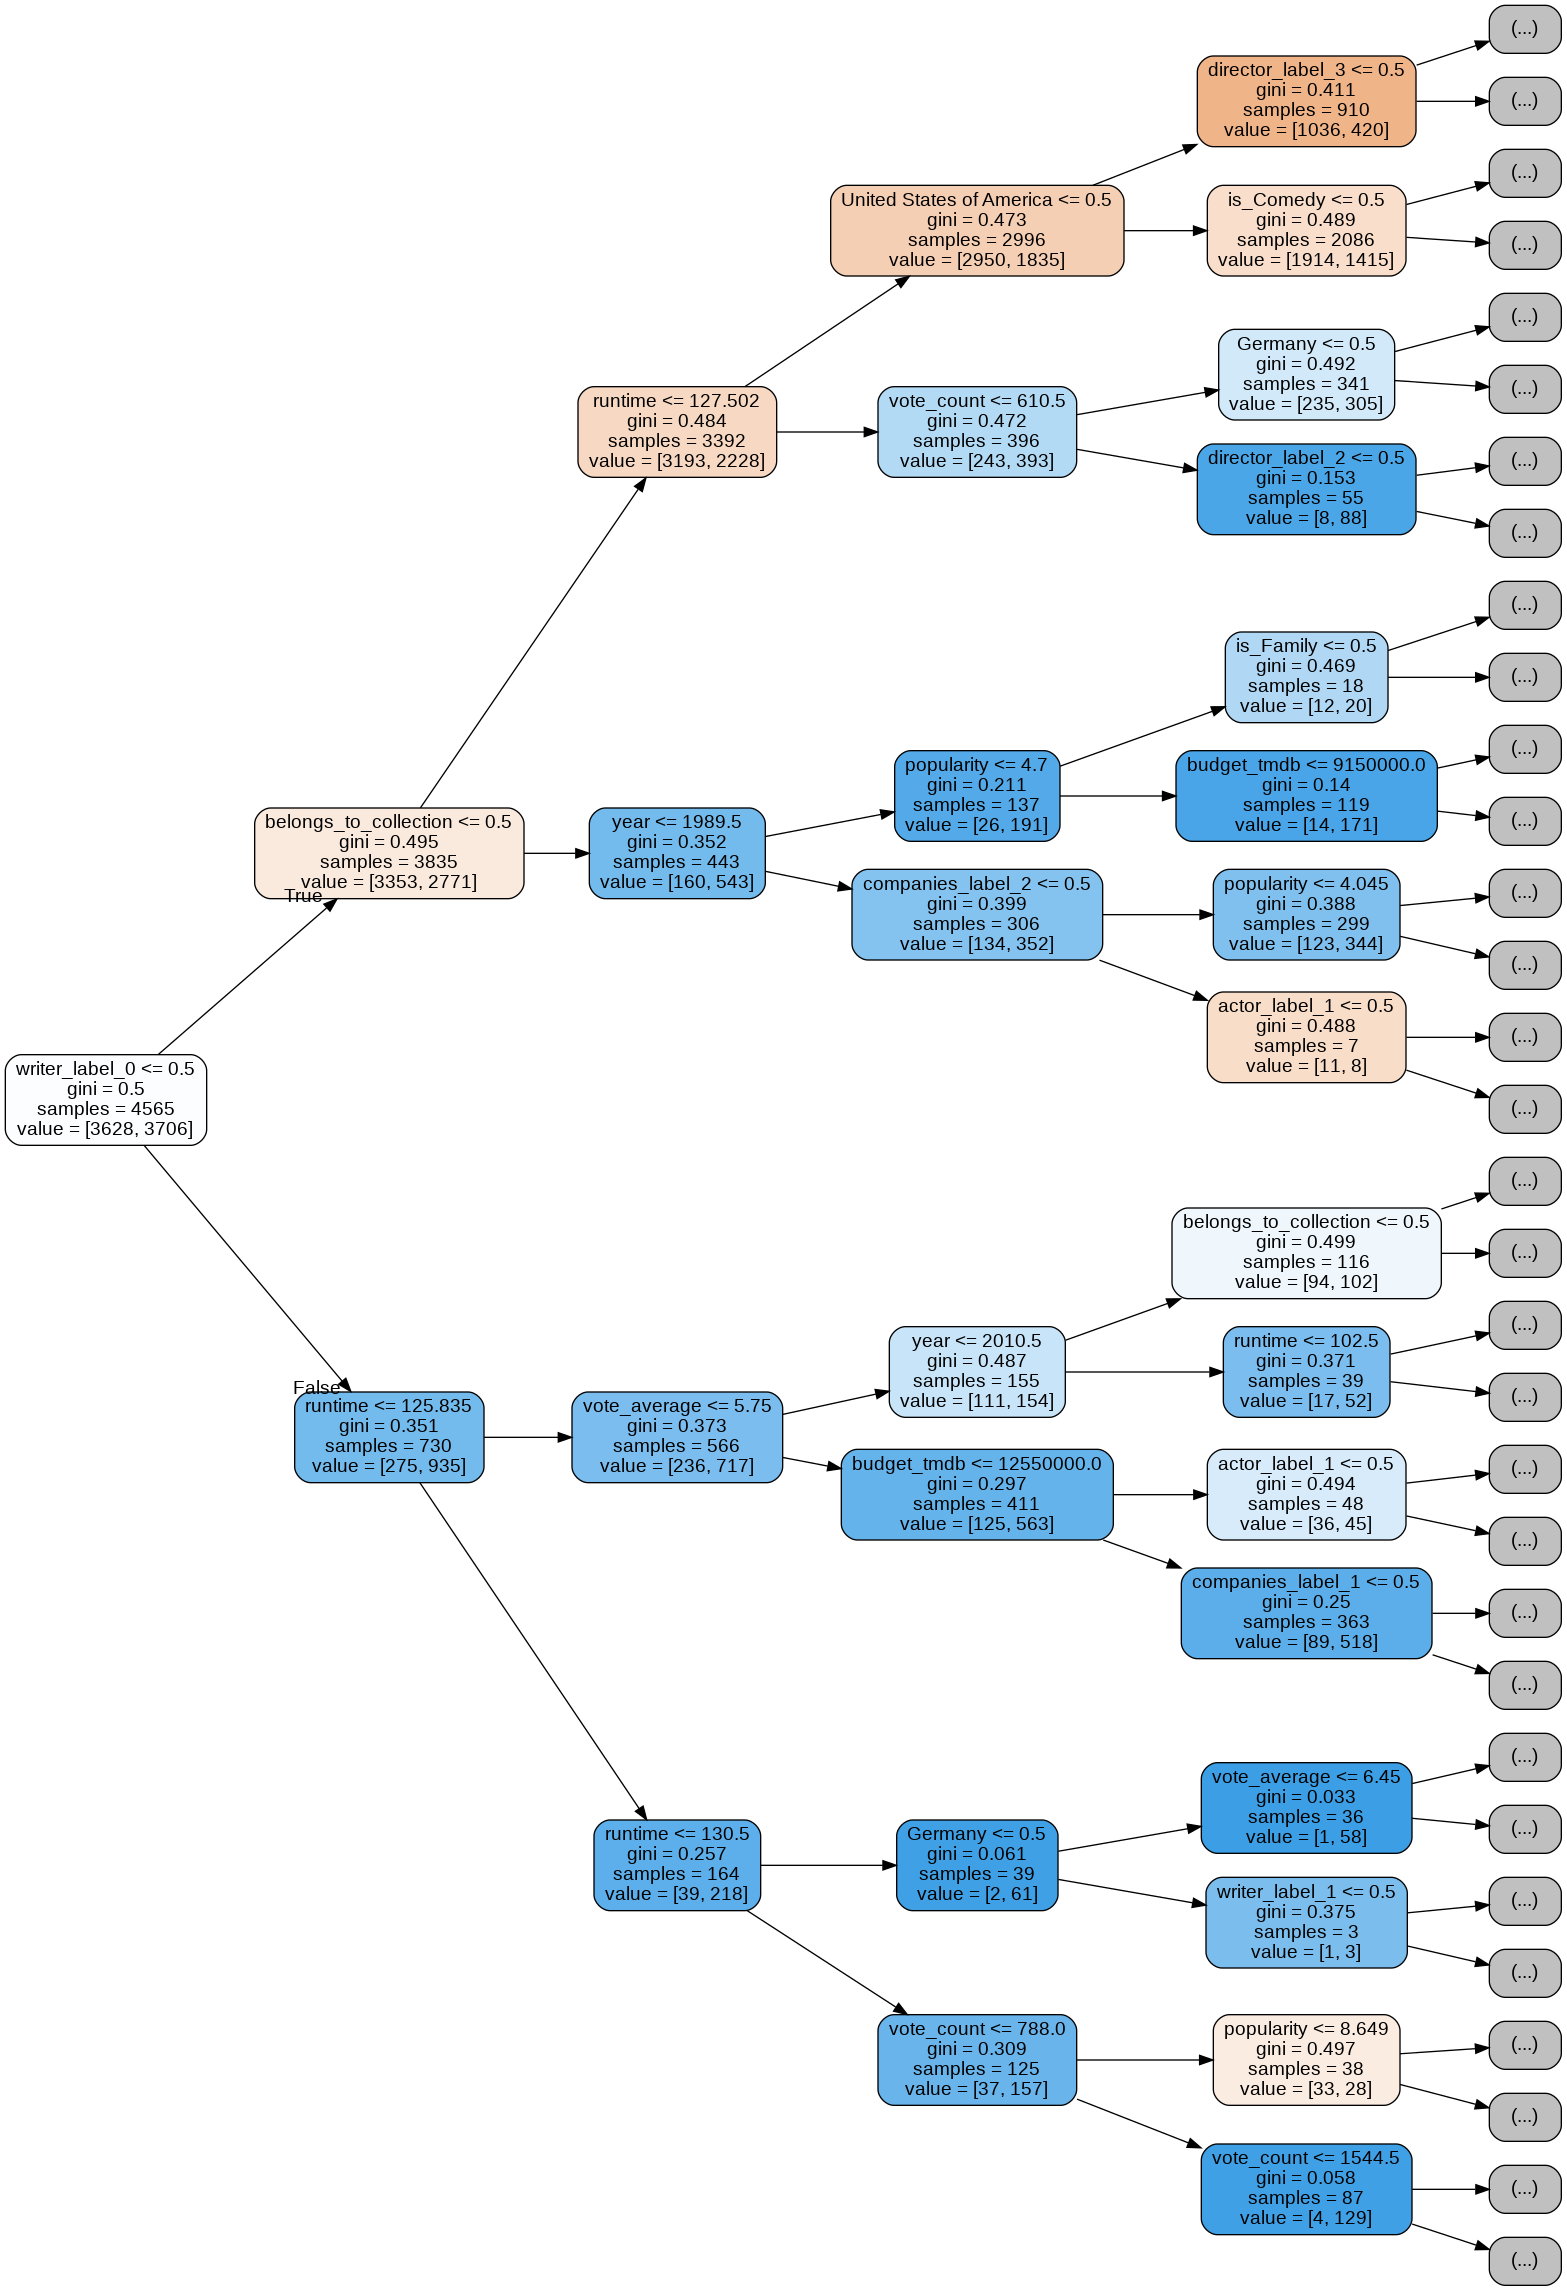

In [ ]:
# visualize the actual decision tree obtained 
dot_data = export_graphviz(grid_search_cv.best_estimator_[-1],
               out_file=None,
               max_depth=4, 
               feature_names=list(train_X.columns),  
               filled=True,
               rotate=True,
               rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

<a id='gbc'></a>
## H. GradientBoostingClassifier ([to top](#top))

In [ ]:
train_X, train_y = train_X_sm, train_y_sm
test_X, test_y = test_X_no_sm, test_y_no_sm

In [ ]:
# get a list of models to evaluate
def get_models():
 models = dict()
 for i in range(2, train_X.shape[1], 4):
  rfe = RFE(estimator=GradientBoostingClassifier(random_state = 0), n_features_to_select=i)
  model = GradientBoostingClassifier(random_state = 0)
  models[str(i)] = Pipeline(steps=[('s', rfe), ('m', model)])
 return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
 return scores

2 0.714 (0.027)
6 0.749 (0.027)
10 0.758 (0.027)
14 0.764 (0.026)
18 0.767 (0.028)
22 0.764 (0.025)
26 0.765 (0.027)
30 0.762 (0.029)
34 0.768 (0.027)
38 0.766 (0.025)
42 0.773 (0.023)
46 0.768 (0.024)
50 0.768 (0.028)
54 0.769 (0.029)
58 0.769 (0.028)
62 0.769 (0.029)
66 0.769 (0.028)


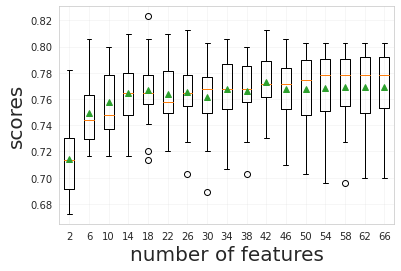

In [ ]:
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, train_X[:int(len(train_X)*0.2)], train_y[:int(len(train_X)*0.2)])
 results.append(scores)
 names.append(name)
 print('%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.xlabel('number of features', fontsize=20)
plt.ylabel('scores', fontsize=20)
plt.grid(alpha=0.2)
plt.show()

In [ ]:
# create pipeline
rfe = RFE(estimator=GradientBoostingClassifier(random_state = 0), n_features_to_select=42)
# let's create a pipeline
model = GradientBoostingClassifier(random_state = 0)
# create a pipeline
pipeline = Pipeline(steps=[('s', rfe), ('m', model)])

In [ ]:
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
n_scores = cross_val_score(model, train_X, train_y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuray for cv: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuray for cv: 0.781 (0.008)


In [ ]:
pipeline.fit(train_X, train_y)
scores = pipeline.score(test_X, test_y)
# report performance
print('Accuracy for testset: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy for testset: 0.778 (0.000)


In [ ]:
# summarize all features
for i in range(train_X.shape[1]):
 print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 27.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 10.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected False, Rank: 14.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected False, Rank: 20.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected True, Rank: 1.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected True, Rank: 1.000
Column: 23, Selected True, Rank: 1.000
Column: 24, Selected True, Rank: 1.000
Column: 25, Selected True, 

In [ ]:
train_X, test_X = train_X.loc[:, rfe.support_], test_X.loc[:, rfe.support_]

In [ ]:
params = {'learning_rate': [0.01,0.001],
          'subsample'    : [0.9, 0.5],
          'n_estimators' : [500, 1000],
          'max_depth'    : [4,6,8]}

grid_search_cv = GridSearchCV(GradientBoostingClassifier(random_state=0),params,verbose=1,cv=5,scoring='accuracy',n_jobs=-1)
grid_search_cv.fit(train_X,train_y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.001], 'max_depth': [4, 6, 8],
                         'n_estimators': [500, 1000], 'subsample': [0.9, 0.5]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1000, 'subsample': 0.9}

In [ ]:
grid_search_cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_depth=6, n_estimators=1000,
                           random_state=0, subsample=0.9)

In [ ]:
train_predictions = grid_search_cv.best_estimator_.predict(train_X)
print("Train Accuracy score:", sklearn.metrics.accuracy_score(train_y, train_predictions))
test_predictions = grid_search_cv.best_estimator_.predict(test_X)
print("Test Accuracy score:", sklearn.metrics.accuracy_score(test_y, test_predictions))

Train Accuracy score: 0.9284155985819471
Test Accuracy score: 0.7872628726287263


In [ ]:
def report_scores(test_y, test_pred):
    print(classification_report(test_y, test_pred, target_names=['flop', 'hit']))

In [ ]:
#compute the performance of the model
report_scores(train_y,train_predictions)

              precision    recall  f1-score   support

        flop       0.92      0.94      0.93      3667
         hit       0.94      0.91      0.93      3667

    accuracy                           0.93      7334
   macro avg       0.93      0.93      0.93      7334
weighted avg       0.93      0.93      0.93      7334



In [ ]:
#compute the performance of the model
report_scores(test_y,test_predictions)

              precision    recall  f1-score   support

        flop       0.75      0.79      0.77       989
         hit       0.82      0.78      0.80      1225

    accuracy                           0.79      2214
   macro avg       0.79      0.79      0.79      2214
weighted avg       0.79      0.79      0.79      2214



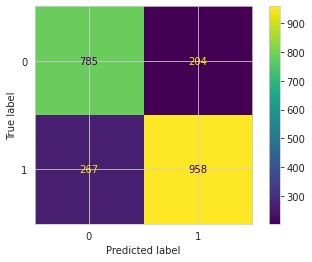

In [ ]:
#it is possible to plot the confusion matrix 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid_search_cv.best_estimator_, test_X, test_y)
plt.show()

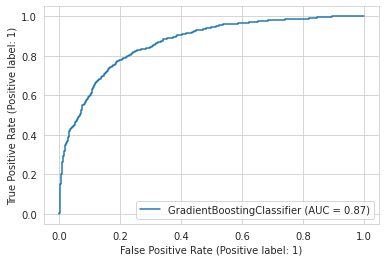

In [ ]:
plot_roc_curve(grid_search_cv.best_estimator_, test_X, test_y)

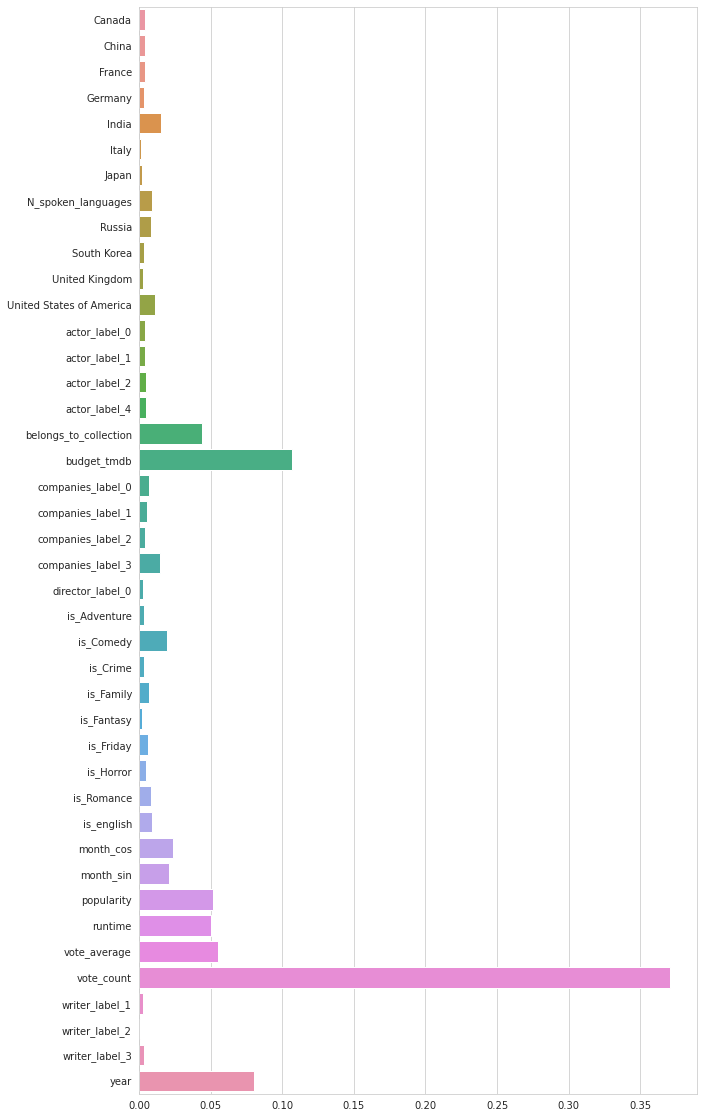

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,20))
sns.barplot(x=grid_search_cv.best_estimator_.feature_importances_, y=train_X.columns)

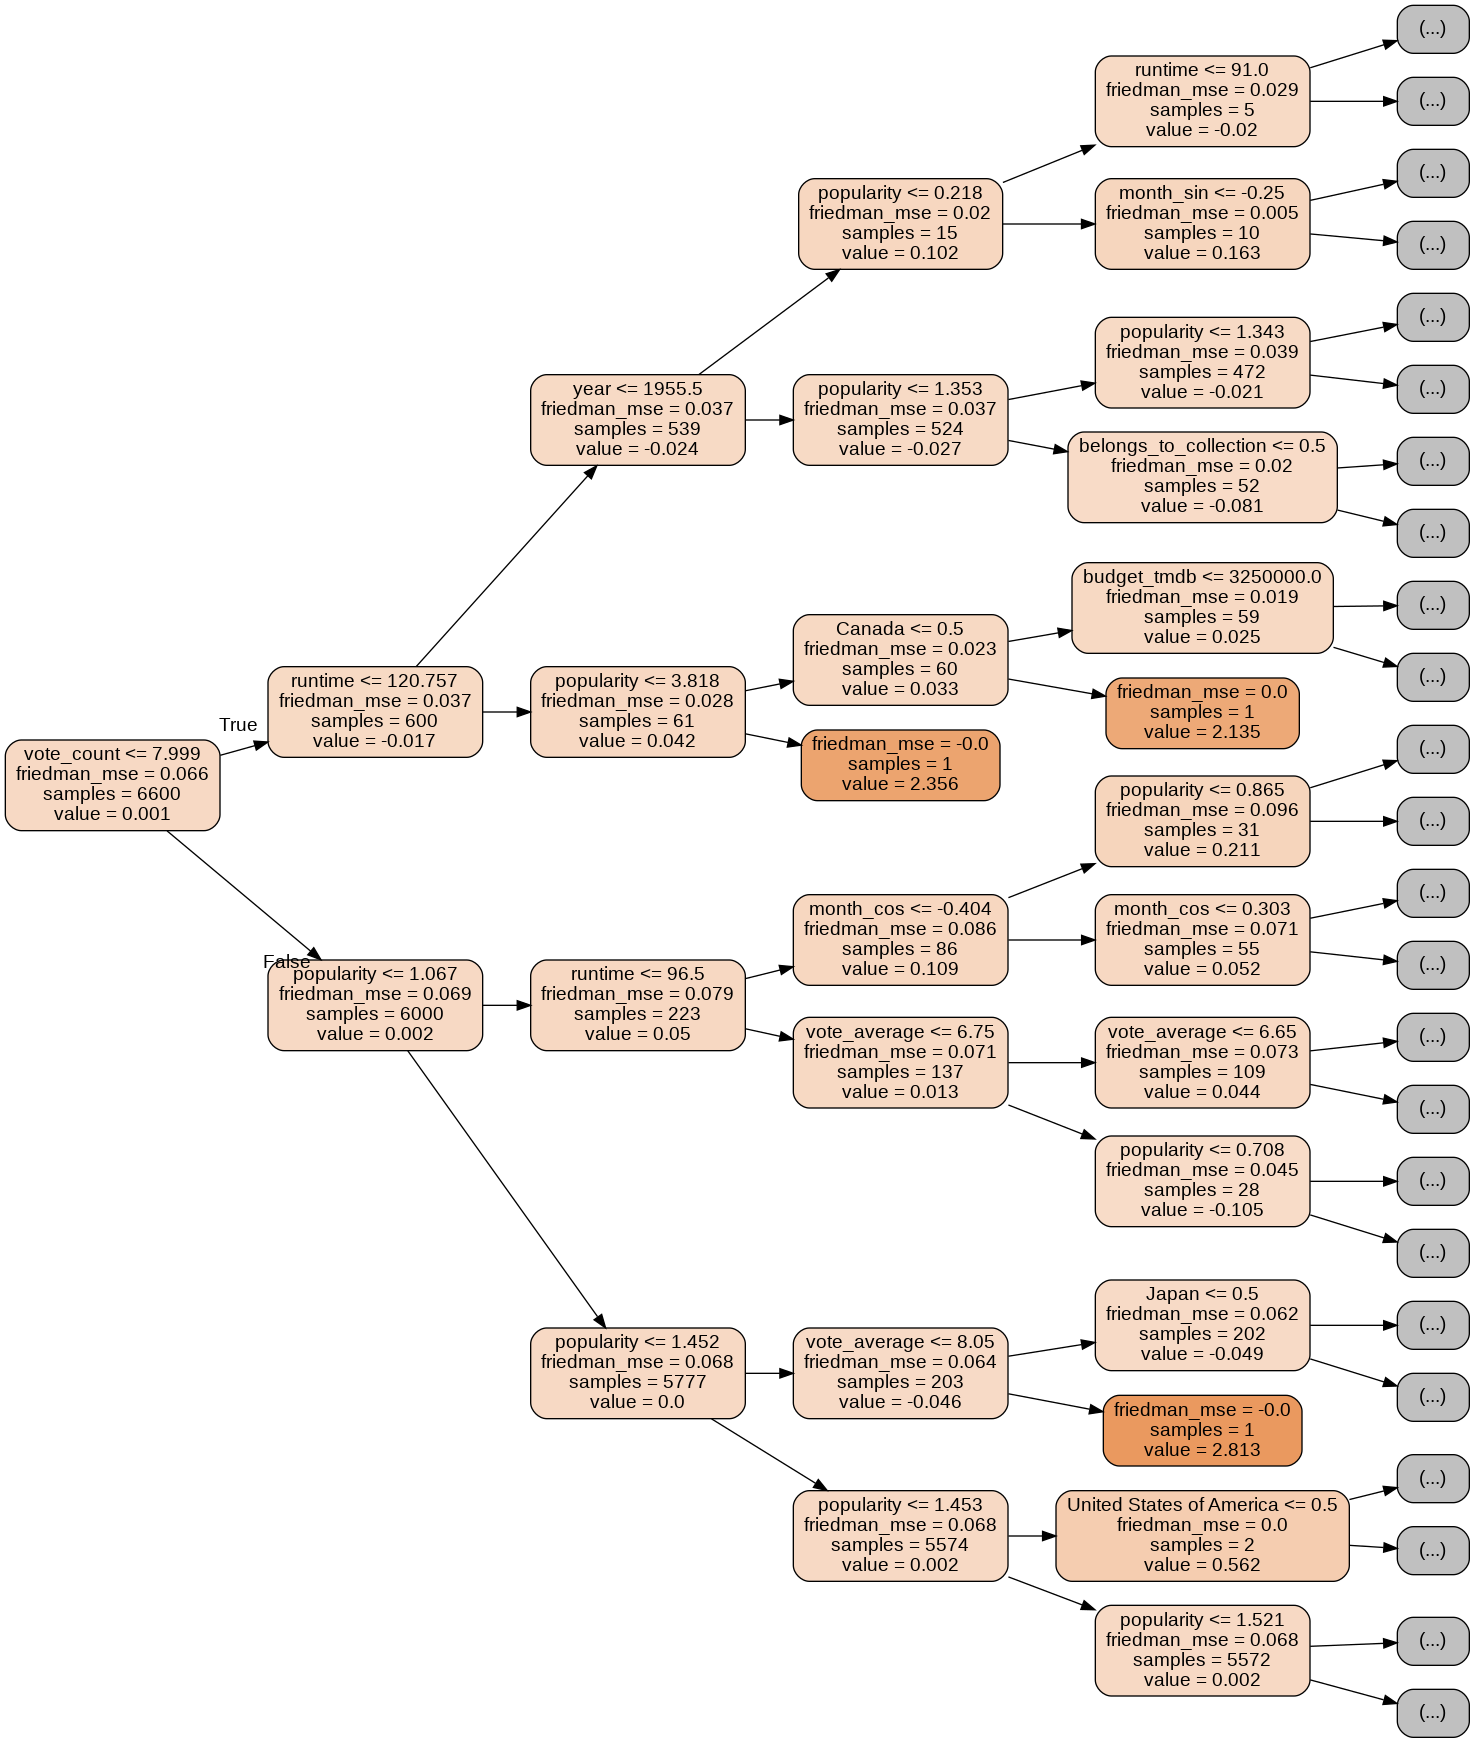

In [ ]:
# visualize the actual decision tree obtained 
dot_data = export_graphviz(grid_search_cv.best_estimator_[-1][0],
               out_file=None,
               max_depth=4, 
               feature_names=list(train_X.columns),  
               filled=True,
               rotate=True,
               rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

<a id='asc'></a>
## I. AutoSklearnClassifier ([to top](#top))

In [ ]:
train_X, train_y = train_X_sm, train_y_sm
test_X, test_y = test_X_no_sm, test_y_no_sm

In [ ]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    # time_left_for_this_task=1000,
    # per_run_time_limit=100,
    # ensemble_size = 1000,
    # ensemble_nbest = 1000,
    seed = 42,
    tmp_folder='/tmp/autosklearn_regression_example_clf'
)
automl.fit(train_X, train_y, dataset_name='Movies')

AutoSklearnClassifier(per_run_time_limit=30, seed=42,
                      time_left_for_this_task=120,
                      tmp_folder='/tmp/autosklearn_regression_example_clf')

In [ ]:
print(automl.leaderboard())

          rank  ensemble_weight               type      cost   duration
model_id                                                               
18           1             0.40  gradient_boosting  0.204874   2.937322
12           2             0.20           adaboost  0.224287   4.488527
9            3             0.12                mlp  0.228831  13.453282
15           4             0.10                lda  0.265180   1.410091
19           5             0.06                mlp  0.293680  28.699216
5            6             0.12           adaboost  0.301115   4.730608


In [ ]:
print(automl.show_models())

[(0.400000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'gradient_boosting', 'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:gradient_boosting:early_stop': 'train', 'classifier:gradient_boosting:l2_regularization': 3.609412172481434e-10, 'classifier:gradient_boosting:learning_rate': 0.05972079854295879, 'classifier:gradient_boosting:loss': 'auto', 'classifier:gradient_boosting:max_bins': 255, 'classifier:gradient_boosting:max_depth': 'None', 'classifier:gradient_boosting:max_leaf_nodes': 4, 'classifier:gradient_boosting:min_samples_leaf': 2, 'classifier:gradient_boosting:scoring': 'loss', 'classifier:gradient_boosting:tol': 1e-07, 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessor:feature_type:num

In [ ]:
train_predictions = automl.predict(train_X)
print("Train Accuracy score:", sklearn.metrics.accuracy_score(train_y, train_predictions))
test_predictions = automl.predict(test_X)
print("Test Accuracy score:", sklearn.metrics.accuracy_score(test_y, test_predictions))

Train Accuracy score: 0.8459230979001909
Test Accuracy score: 0.7719060523938572


In [ ]:
def report_scores(test_y, test_pred):
    print(classification_report(test_y, test_pred, target_names=['flop', 'hit']))

In [ ]:
#compute the performance of the model
report_scores(train_y,train_predictions)

              precision    recall  f1-score   support

        flop       0.82      0.88      0.85      3667
         hit       0.87      0.81      0.84      3667

    accuracy                           0.85      7334
   macro avg       0.85      0.85      0.85      7334
weighted avg       0.85      0.85      0.85      7334



In [ ]:
#compute the performance of the model
report_scores(test_y,test_predictions)

              precision    recall  f1-score   support

        flop       0.72      0.81      0.76       989
         hit       0.83      0.74      0.78      1225

    accuracy                           0.77      2214
   macro avg       0.77      0.78      0.77      2214
weighted avg       0.78      0.77      0.77      2214



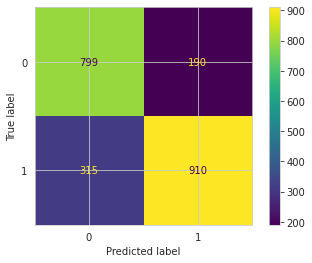

In [ ]:
#it is possible to plot the confusion matrix 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(automl, test_X, test_y)
plt.show()

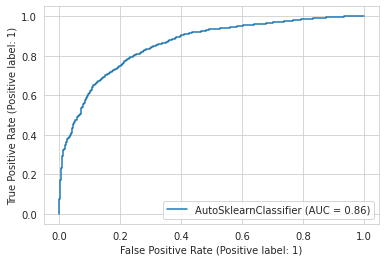

In [ ]:
plot_roc_curve(automl, test_X, test_y)

# Save the notebook ([to top](#top))

In [129]:
!pip install jovian --upgrade --quiet
import jovian
# Execute this to save new versions of the notebook
jovian.commit(project="Movies-data-exploration")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/lilanpei/movies-data-exploration


'https://jovian.ai/lilanpei/movies-data-exploration'